# Airbnb Seattle Analysis

#### The dataset used was the airbnb Seattle dataset.  

#### Data Analysis has been done from the perspective of a prospective host who wishes to rent an airbnb to earn revenue. The host wishes to understand all which is necessary or contributes in becoming a successful airbnb host which means having a high rating as well as a high revenue turnover.  

**The three fundermental questions that we hope to anwser through this dataset include:**

1. Which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Is there any correlation between one amenity and the other, if so how strong?

2. What are the general characterstics of AirBnBs and their hosts with a higher rating.

3. How do the prices and the number of bookings fluctuate with regards to time. What are the trends observed within the airBnBs of the three different categories.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('listings.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'scrape_id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'host_listings_count'}>,
        <Axes: title={'center': 'host_total_listings_count'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'guests_included'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>],
       [<Axes: title={'center': 'availability_30'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_revie

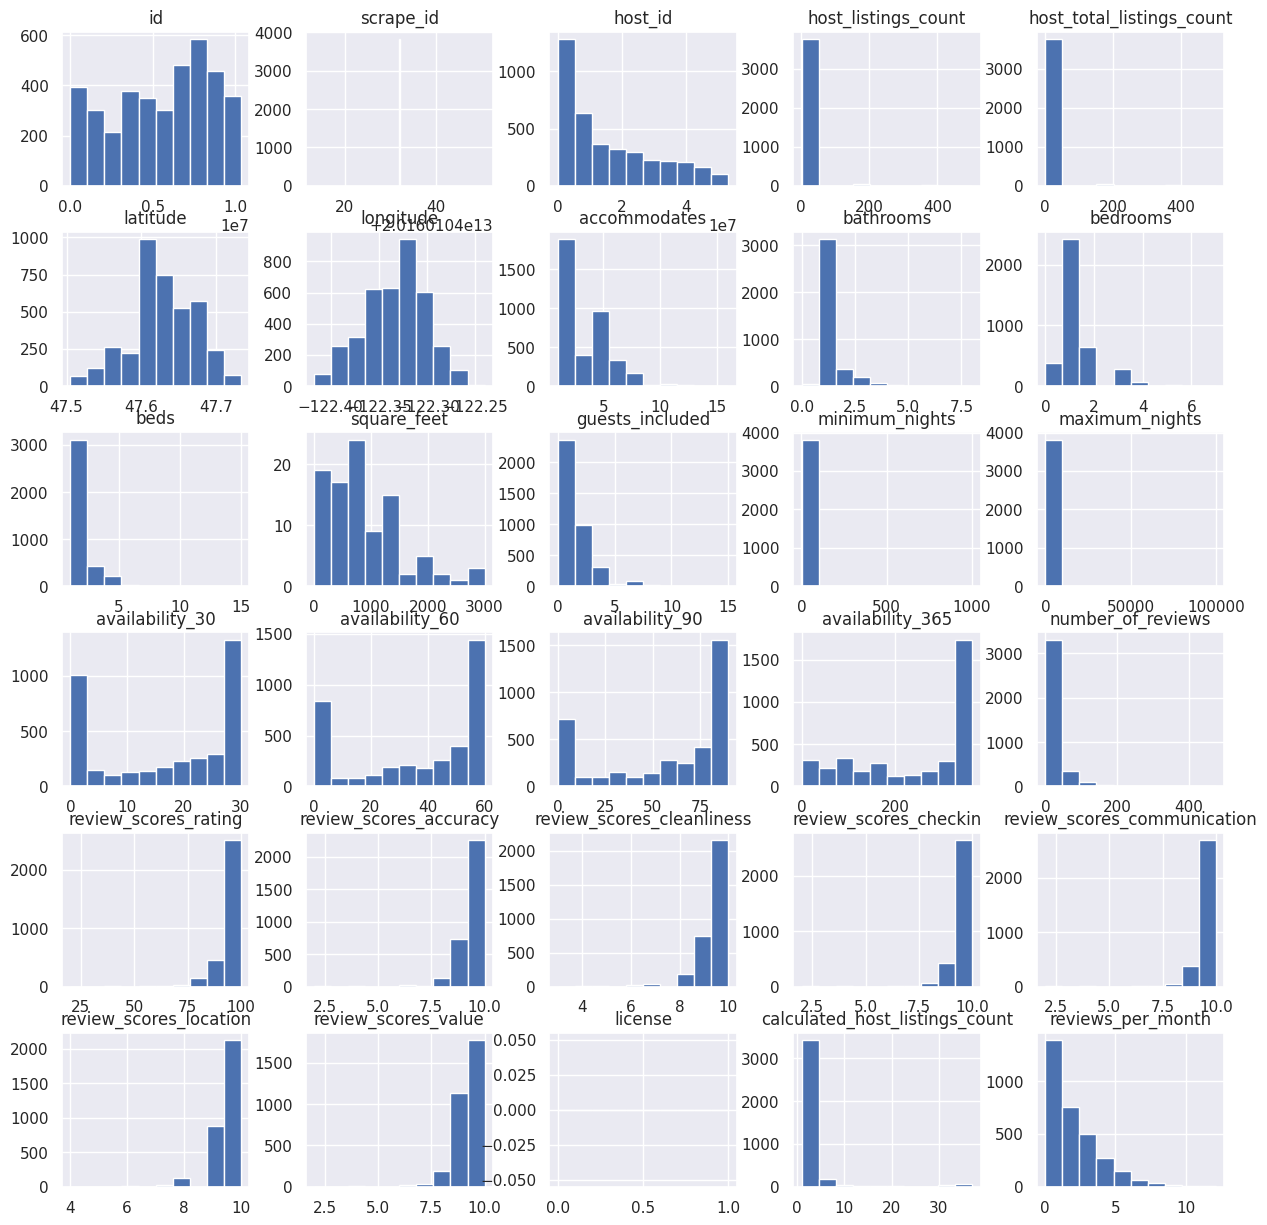

In [ ]:
df.head()
df.shape
df.info()
df.describe()
df.columns
df.dtypes
df.hist(figsize=(15,15))

## data preparation
<hr>

### columns to be removed:

**Redundant columns with no use in analysis:**  
1. **host_url, medium_url, host_thumbnail_url,  thumbnail_url   picture_url , host_picture_url ,  listing_url , xl_picture_url:**  These URLS had no use in data analyis
2. **space ,  summary ,  notes ,  neighborhood_overview ,  description ,  experiences_offered:**  These features consisted on extensive descrptive paragraphs to describe the listing and its features which had no use in the data analysis process.  
3. **street ,  transit ,  latitude ,  zipcode ,    state ,   scrape_id ,  country_code ,  longitude , country ,  host_about:** All these details were covered in the address and city coloum. A micro analysis of the streets and specific co ordinates would not be done. The state and country details aren t needed since this dataset is limited to Seattle, Washington, USA.  


In [ ]:
df = df[['id', 'last_scraped', 'name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time',
         'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
         'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
         'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'market', 'smart_location', 'is_location_exact',
         'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
         'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
         'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60',
         'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review',
         'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license',
         'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
         'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']]

In [ ]:
#examining rows and clean rows with nan vals

print("columns with missing values > 80%: ", df.columns[df.isnull().sum() > 0.80 * df.shape[0]].tolist())
print("columns with missing values > 50%: ", df.columns[df.isnull().sum() > 0.50 * df.shape[0]].tolist())

columns with missing values > 80%:  ['square_feet', 'license']
columns with missing values > 50%:  ['square_feet', 'monthly_price', 'security_deposit', 'license']


In [ ]:
#dropping all columns > 50

x=df.nunique() == 1
similar_cols_vals = (x[x == True].keys().tolist())
print("columns with similar vals: ", similar_cols_vals)

columns with similar vals:  ['last_scraped', 'market', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']


In [ ]:
#drop

df = df.drop(columns=similar_cols_vals)

# since neighbourhood_cleansed already exists containing cleaned data
df = df.drop(columns=['neighbourhood'])

Split amenities feature column into multiple columns, each with a truth value of weather that specific feature is present in the datapoint or not.
<hr>

In [ ]:
import re

#using regex to clean the amenities string column
df['amenities'] = df['amenities'].str.replace(r'[{}"]', '', regex=True)

In [ ]:
#extracting all unique amenities by splitting
amenities_values = df.amenities
newarray = list()
for row in amenities_values:
    row = row.split(',')
    for i in row:
        newarray.append(i)
amenities_values = set(newarray)

In [ ]:
#merging obtained amenities dataframe with the main dataframe(df)
df_amen = pd.DataFrame(df[['id', 'amenities']])

In [ ]:
df_amen = df_amen.reindex(columns=[*df_amen.columns.tolist(), *amenities_values], fill_value=0)

one hot encoding for amenities

In [ ]:
for index, row in df_amen.iterrows():
    amenities = []
    amenities.clear()
    amenities = row['amenities'].rsplit(',')
    for vals in amenities:
        df_amen.at[index, vals] = 1
print('Complete!')

Complete!


In [ ]:
#drop amenities feature column and empty column
df_amen.drop(columns=['amenities', ''], inplace=True)

In [ ]:
df_amen.head(2)

id  Breakfast  Lock on Bedroom Door  Hangers  Indoor Fireplace  \
0  241032          0                     0        0                 0   
1  953595          0                     0        0                 0   

   Free Parking on Premises  24-Hour Check-in  First Aid Kit  Internet  \
0                         0                 0              0         1   
1                         1                 0              1         1   

   Hot Tub  ...  Fire Extinguisher  Essentials  Iron  Washer  Dryer  Pool  \
0        0  ...                  0           0     0       1      1     0   
1        0  ...                  1           1     0       1      1     0   

   Smoking Allowed  Air Conditioning  Hair Dryer  Buzzer/Wireless Intercom  
0                0                 1           0                         0  
1                0                 0           0                         1  

[2 rows x 42 columns]

In [ ]:
df = pd.concat([df, df_amen], axis = 1, sort=True)

In [ ]:
df.drop(columns='amenities', inplace = True)

In [ ]:
#renaming columns: adding subscript_ on amenties for easy identification

for cols in df:
    if cols in amenities_values:
        new_val = 'amenities_' + cols
        df.rename(columns={cols:new_val}, inplace = True)

In [ ]:
#removing duplicate columns
df = df.loc[:,~df.columns.duplicated()]

In [ ]:
df.shape

(3818, 101)

split 'host verification' heature column into multiple columns, each with a truth value of whether that specific feature is present in that datapoint
<hr>

In [ ]:
#exploring dataset
df['host_verifications'][:4]

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
Name: host_verifications, dtype: object

In [ ]:
#using regex to clean this string column
df['host_verifications'] = df['host_verifications'].str.replace(r"[\[\]' ]", '', regex = True)

In [ ]:
df['host_verifications'][:4]

0                        email,phone,reviews,kba
1    email,phone,facebook,linkedin,reviews,jumio
2               email,phone,google,reviews,jumio
3             email,phone,facebook,reviews,jumio
Name: host_verifications, dtype: object

In [ ]:
#split feature column
host_verifications_values = df.host_verifications
newarray = list()
for row in host_verifications_values:
    if isinstance(row, str):
        row = row.split(',')
        for i in row:
            newarray.append(i.strip())

host_verifications_values = set(newarray)

In [ ]:
df_host_verifications = pd.DataFrame(df[['host_id', 'host_verifications']])
df_host_verifications = df_host_verifications.reindex(columns=[*df_host_verifications.columns.tolist(), *host_verifications_values], fill_value=0)

#one hot encoding
host_verifications = []
for index, row in df_host_verifications.iterrows():
    host_verifications.clear()
    if isinstance(row, str):
        host_verifications = row['host_verifiacations'].rsplit(',')
        for vals in host_verifications:
            df_host_verifications.at[index, vals] = 1

print("Finished!")

Finished!


Merging the obtained host verification data frame with main df

In [ ]:
df = pd.concat([df, df_host_verifications], axis=1)

In [ ]:
df.drop(columns='host_verifications', inplace=True)

In [ ]:
#rename columns and add suscript

for cols in df:
    if cols in host_verifications_values:
        new_val = 'host_verifications_' + cols
        df.rename(columns={cols:new_val}, inplace=True)

In [ ]:
df.shape

(3818, 116)

In [ ]:
df = df.loc[:,~df.columns.duplicated()]

# Analysize Data
<hr>

#### To reiterate, the three fundermental questions that we hope to answer through this dataset include:

1. Which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Is there any correlation between one amenity and the other, if so how strong?

2. What are the general characterstics of AirBnBs and their hosts with a higher rating.

3. How do the prices and the number of bookings fluctuate with regards to time. What are the trends observed within the airBnBs of the three different categories.



In [ ]:
df_analysis = df.copy(deep=True)

In [ ]:
df_analysis2 = df_analysis.copy(deep=True)
# df_analysis2 = (df_analysis2[pd.notnull(df_analysis2['host_is_superhost'])]).copy(deep=True)
# df_analysis2.dropna(inplace=True)
df_analysis2['host_is_superhost'] = df_analysis2['host_is_superhost'].map({'t': 1.0, 'f': 0.0})

1. Which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Is there any correlation between one amenity and the other, if so how strong?

In [ ]:
is_superhost_one = df_analysis2.select_dtypes([np.number]) #selecting only numeric vars
is_superhost_one = is_superhost_one.drop(columns=['id', 'host_id'])

#m = ~(is_superhost_one.mask(np.eye(len(is_superhost_one), dtype=bool)).abs() > 0.4).any()

<Axes: >

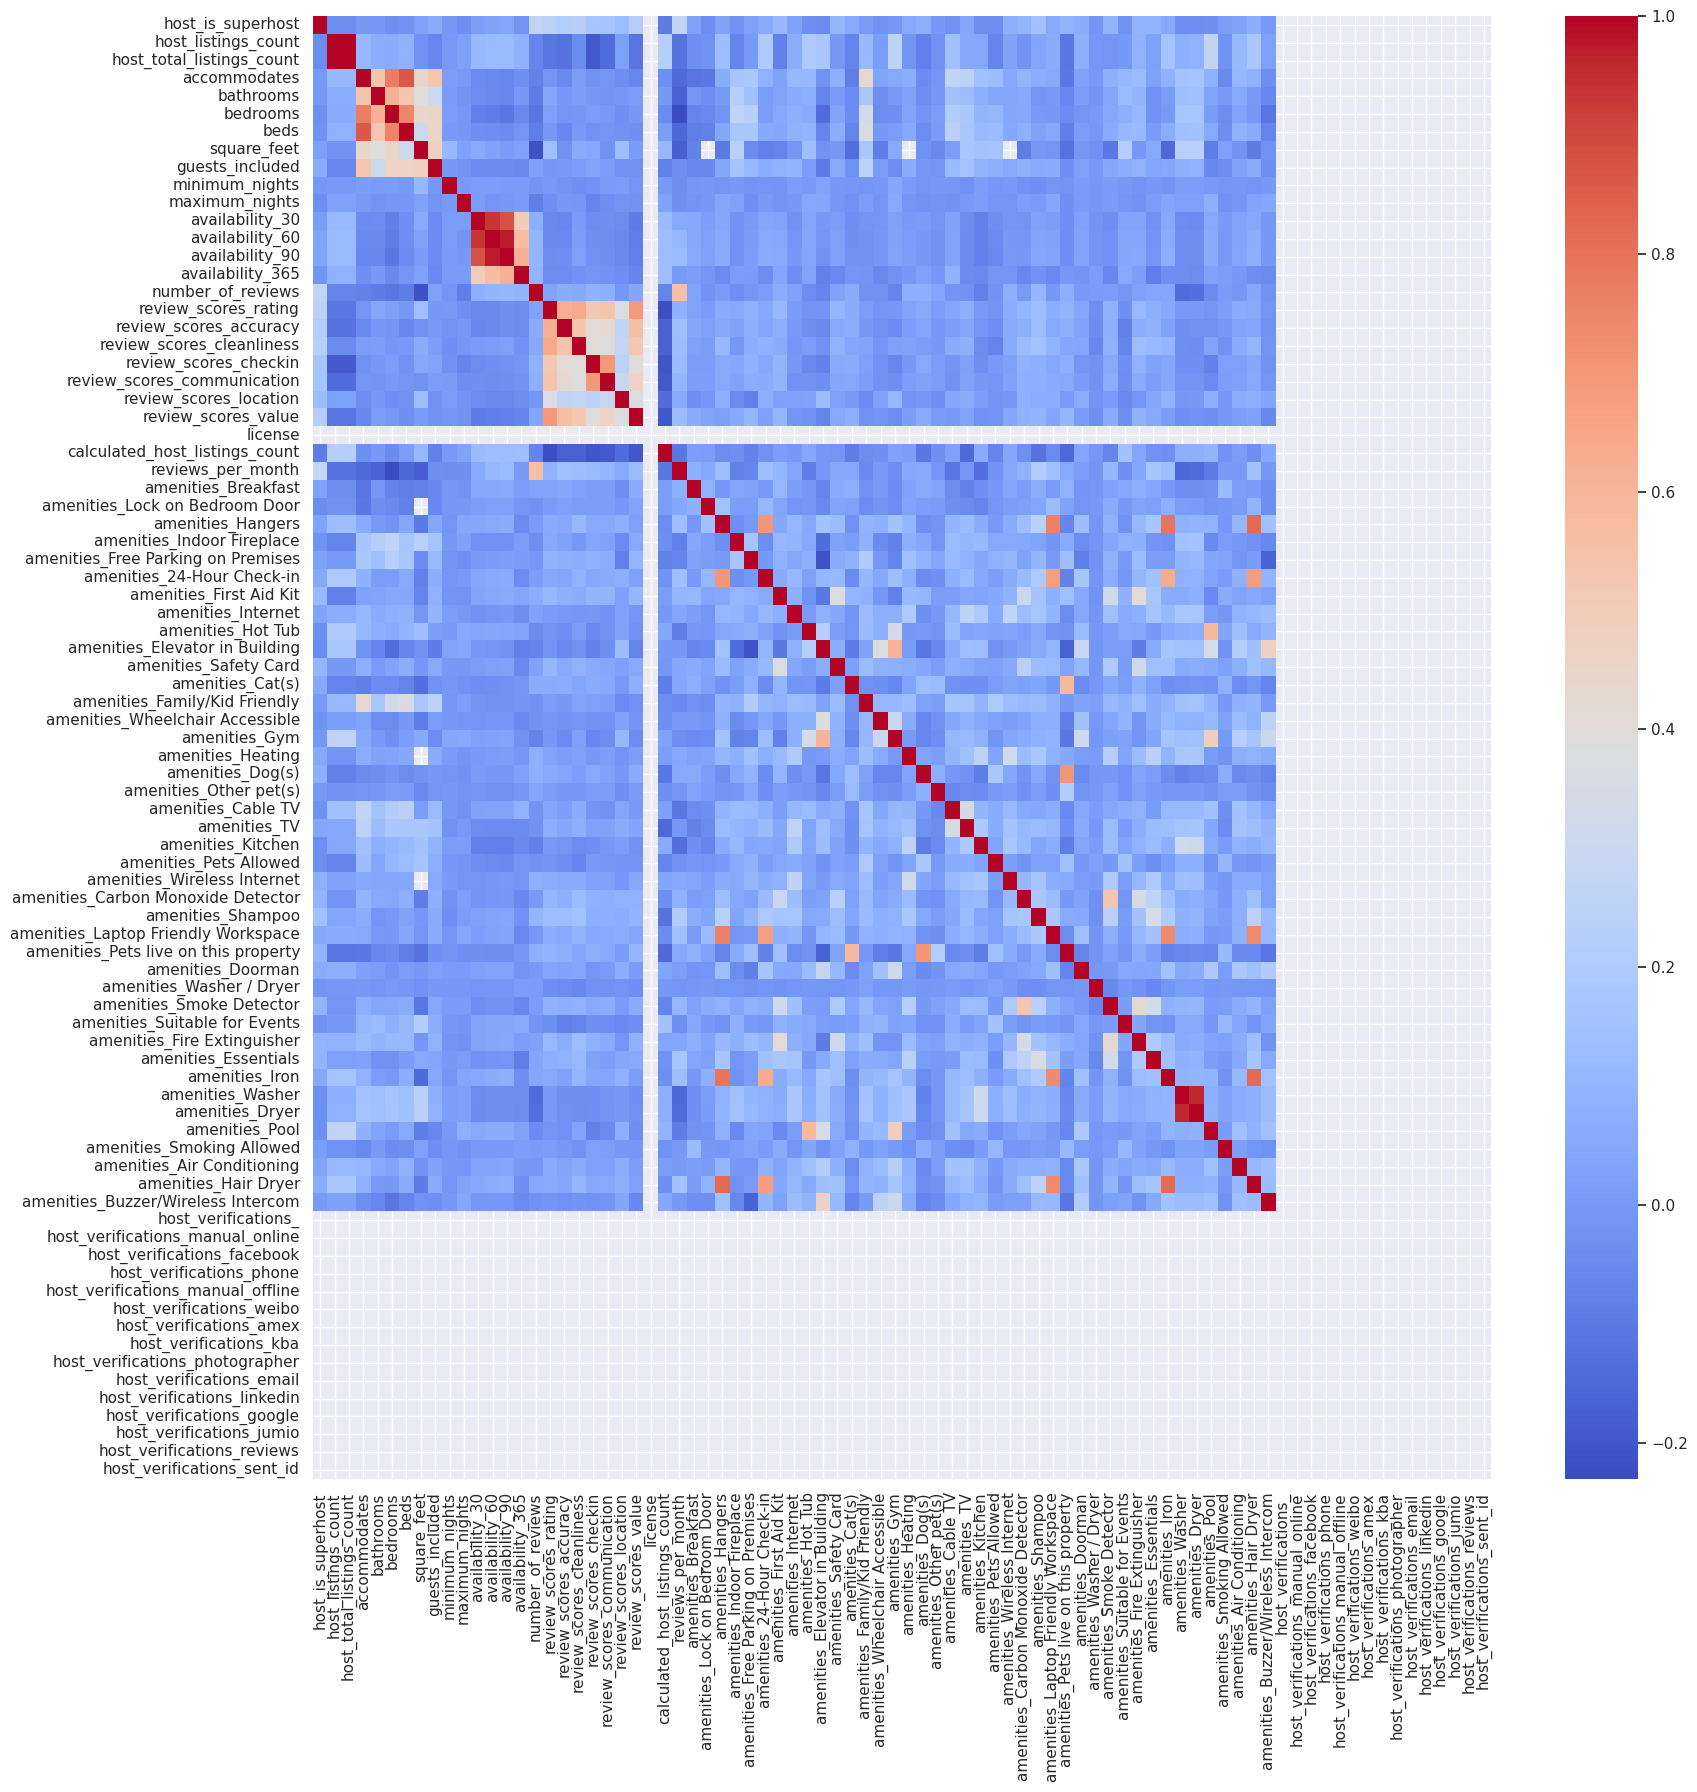

In [ ]:

is_superhost_one = is_superhost_one.corr()
sns.set(rc={'figure.figsize': (19, 19)})
sns.heatmap(is_superhost_one,
            xticklabels=is_superhost_one.columns.values,
            yticklabels=is_superhost_one.columns.values, cmap='coolwarm')

In [ ]:
def get_redundant_pairs(df):
    '''get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("top absolute correlations")
a = get_top_abs_correlations(is_superhost_one, 20)
print(a)

top absolute correlations
host_listings_count                  host_total_listings_count              1.000000
amenities_Washer                     amenities_Dryer                        0.998781
availability_60                      availability_90                        0.998334
availability_30                      availability_60                        0.996001
                                     availability_90                        0.990096
accommodates                         beds                                   0.986765
amenities_Hangers                    amenities_Hair Dryer                   0.986213
amenities_Iron                       amenities_Hair Dryer                   0.985907
amenities_Hangers                    amenities_Iron                         0.981137
                                     amenities_Laptop Friendly Workspace    0.971552
amenities_Laptop Friendly Workspace  amenities_Hair Dryer                   0.962690
bedrooms                             be

#### Analysis of Correlated Variables

The correlations show and hint at the following characterstics:


A high correlation of the following amenities:
- Washer and Dryer
- Hair Dryer, Iron, Hangers

means that they are to be kept together if one of them is present. This is quite self explainatory in the sense that if an Iron is present, then hangers are to be present and if there are facilities avaliable for washing garments such as a washer, then a dryer is to be present as well. These all amenities also correlate with the '24 hour check in amenities', which means an Airbnb which offers a 24 hour check is to ideally have these amenities to get a better rating and review.

A high correlation of a laptop friendly workspace with Iron, Hanger and Hairdryer along with a 24 hour check means that a laptop friendly workspace includes other amentities like Iron, Hair dryer and Hangers.

It also shows that a rating score for communication is highly correlated with checkin score which means that the checkin process, handling and the interaction that occurs during that time is a crucial determinant in determining communication rating score.

<hr>




2. What are the general characterstics of AirBnBs and their hosts with a higher rating.


We shall iteratively go through the features present in the dataset and do a comparision to find the most popular characterstic within that feature.  

We'll determine this by either checking which characterstic had a higher count with a wide margin from other characterstics present or we'll group/split the datapoints according to their review score(high score, average score, low score) and do a comparision to find which characterstics stood out in datapoints with a higher rating against the other data points.

investigating the characteristics of airbnbs w the highest review score rating being 100

In [ ]:
df_analysis3 = df_analysis.copy(deep = True)

In [ ]:
#df_analysis3['review_scores_rating'].value_counts()
top_review_scores = df_analysis3[df_analysis3['review_scores_rating'] == 100]
print('the number of airbnbs w the highest score were:', top_review_scores.shape[0])

the number of airbnbs w the highest score were: 781


top locations with the highest score were: 

neighbourhood_group_cleansed
Other neighborhoods    20.102433
Capitol Hill           15.492958
Central Area           13.700384
Downtown               11.395647
Queen Anne              9.218950
West Seattle            5.761844
Ballard                 4.609475
Rainier Valley          3.457106
Cascade                 2.432778
University District     2.304738
Northgate               2.176697
Beacon Hill             2.176697
Delridge                2.048656
Magnolia                1.920615
Lake City               1.920615
Seward Park             1.024328
Interbay                0.256082
Name: count, dtype: float64


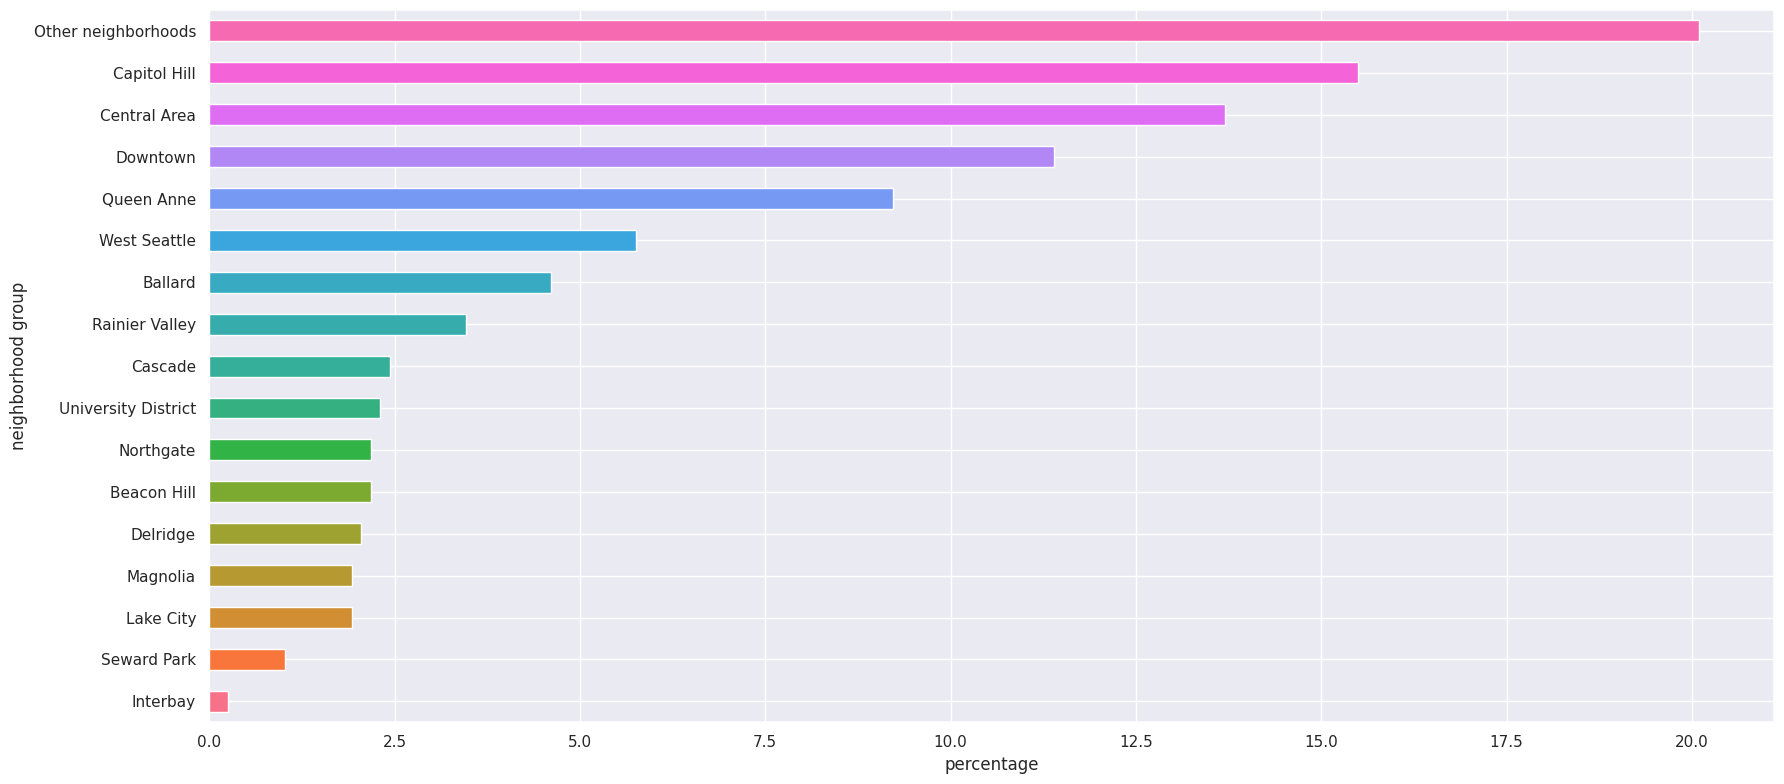

In [ ]:
print('top locations with the highest score were: ')
print()
print(((top_review_scores['neighbourhood_group_cleansed'].value_counts() * 100 / top_review_scores['review_scores_rating'].shape[0]).sort_values(ascending=False)));
top_loc_percentages = (top_review_scores['neighbourhood_group_cleansed'].value_counts() * 100 /top_review_scores['review_scores_rating'].shape[0]).sort_values(ascending=True)

colors = sns.color_palette('husl', len(top_loc_percentages))
top_loc_percentages.plot(kind='barh', figsize=(18, 8), color=colors)

plt.xlabel('percentage')
plt.ylabel('neighborhood group')
plt.tight_layout()
plt.show()

### most prefered room type:

room_type
Entire home/apt    542
Private room       214
Shared room         25
Name: review_scores_rating, dtype: int64


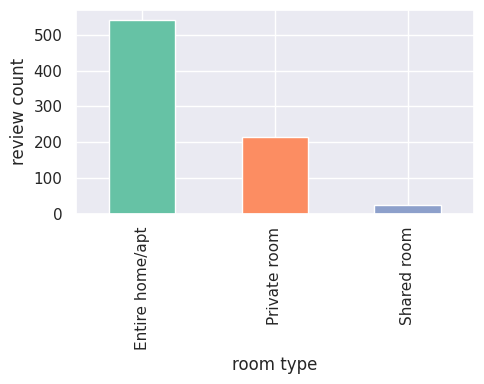

In [ ]:
print((top_review_scores.groupby('room_type')['review_scores_rating'].count().sort_values(ascending=False)));
room_type_counts = (top_review_scores.groupby('room_type')['review_scores_rating'].count().sort_values(ascending=False))
colors = sns.color_palette('Set2', n_colors=len(room_type_counts))
room_type_counts.plot.bar(figsize=(5, 4), color=colors)

plt.ylabel('review count')
plt.xlabel('room type')
plt.tight_layout()
plt.show()

In [ ]:
print('the most popular room type was: ', (top_review_scores.groupby('room_type')['review_scores_rating'].count().sort_values(ascending=False)).keys().tolist()[0])

the most popular room type was:  Entire home/apt


### investigating the primary feature columns

In [ ]:
allcols = df_analysis.columns
allcols = allcols.drop(['id',
                         'host_location',
    'host_neighbourhood',  'host_response_rate',
    'price',
    'weekly_price',
    'cleaning_fee',
    'extra_people',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
 'name',
 'host_id',
 'host_name',
 'host_since', 'amenities_Heating',
 'amenities_Essentials',
 'amenities_Wheelchair Accessible',
 'amenities_Elevator in Building',
 'amenities_Internet',
 'amenities_24-Hour Check-in',
 'amenities_Shampoo',
 'amenities_Carbon Monoxide Detector',
 'amenities_Family/Kid Friendly',
 'amenities_Breakfast',
 'amenities_Lock on Bedroom Door',
 'amenities_Safety Card',
 'amenities_Pets Allowed',
 'amenities_Other pet(s)',
 'amenities_Kitchen',
 'amenities_Air Conditioning',
 'amenities_Smoking Allowed',
 'amenities_Dryer',
 'amenities_Buzzer/Wireless Intercom',
 'amenities_Cable TV',
 'amenities_Hangers',
 'amenities_Indoor Fireplace',
 'amenities_Hair Dryer',
 'amenities_Pets live on this property',
 'amenities_Wireless Internet',
 'amenities_Washer',
 'amenities_Free Parking on Premises',
 'amenities_Gym',
 'amenities_Pool',
 'amenities_TV',
 'amenities_Doorman',
 'amenities_Smoke Detector',
 'amenities_Laptop Friendly Workspace',
 'amenities_Suitable for Events',
 'amenities_Iron',
 'amenities_First Aid Kit',
 'amenities_Dog(s)',
 'amenities_Fire Extinguisher',
 'amenities_Cat(s)',
 'amenities_Hot Tub',
 'amenities_Washer / Dryer'])
allcols = allcols.tolist()

In [ ]:
df_analysis.shape

(3818, 115)

### The dataset has been split into three categories:

1. high_review_scores: Consisted of data points which had a rating of 90 and above.  
2. mid_review_scores: Consisted of data points which had a rating between 70 and 90.  
3. low_review_scores: Consisted of data points which had a rating below 70.  

#### The below cells gives a comparitive analysis of each feature and how its charactersitcs vary between the three categories. Analysis of these features would follow right after the graphs.

### general characteristics

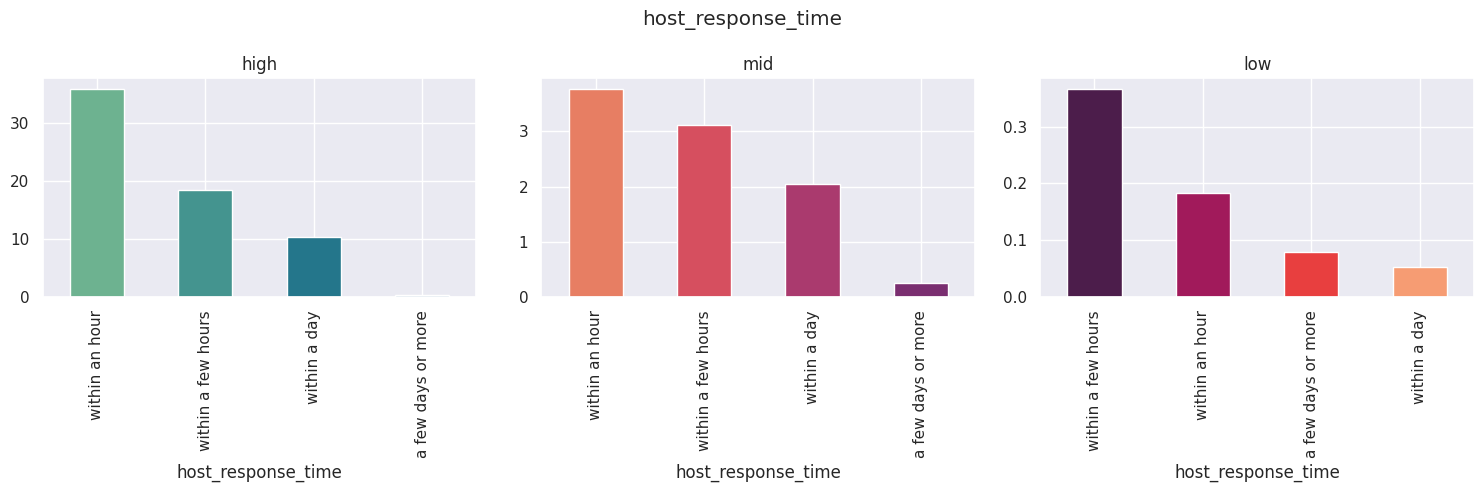

---------------------------------------------------------------------------------------------------------------------


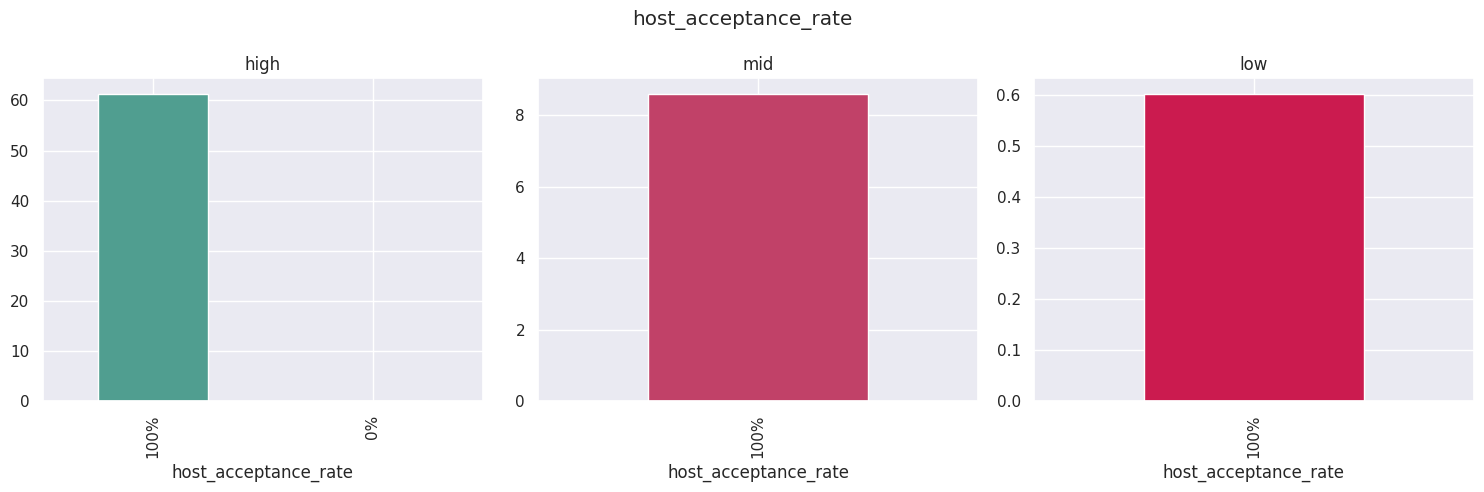

---------------------------------------------------------------------------------------------------------------------


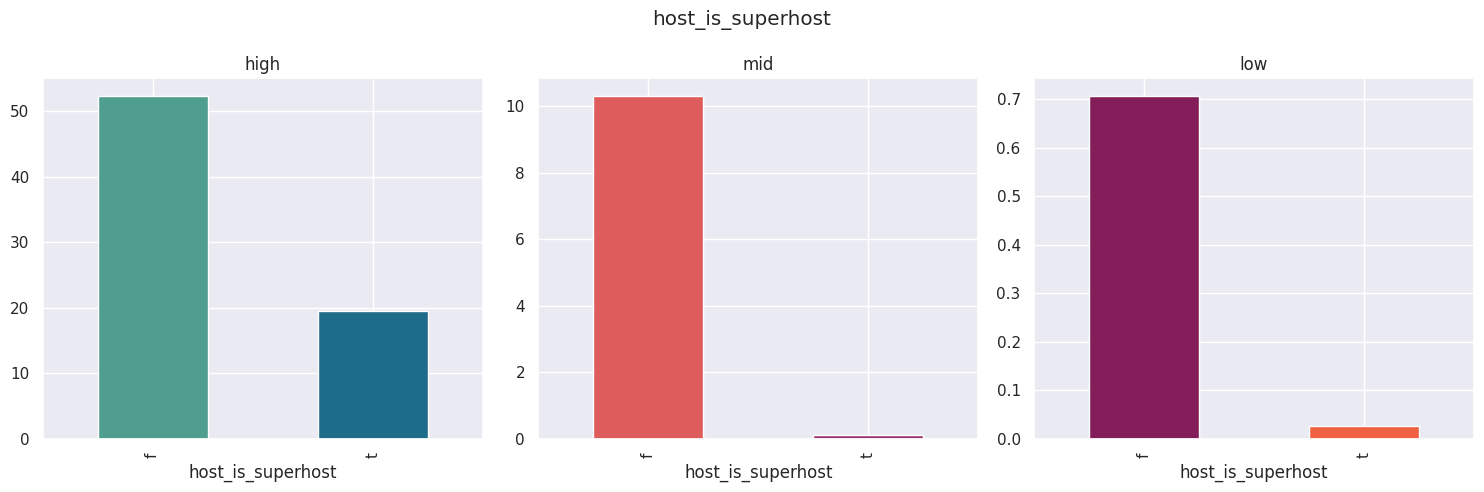

---------------------------------------------------------------------------------------------------------------------


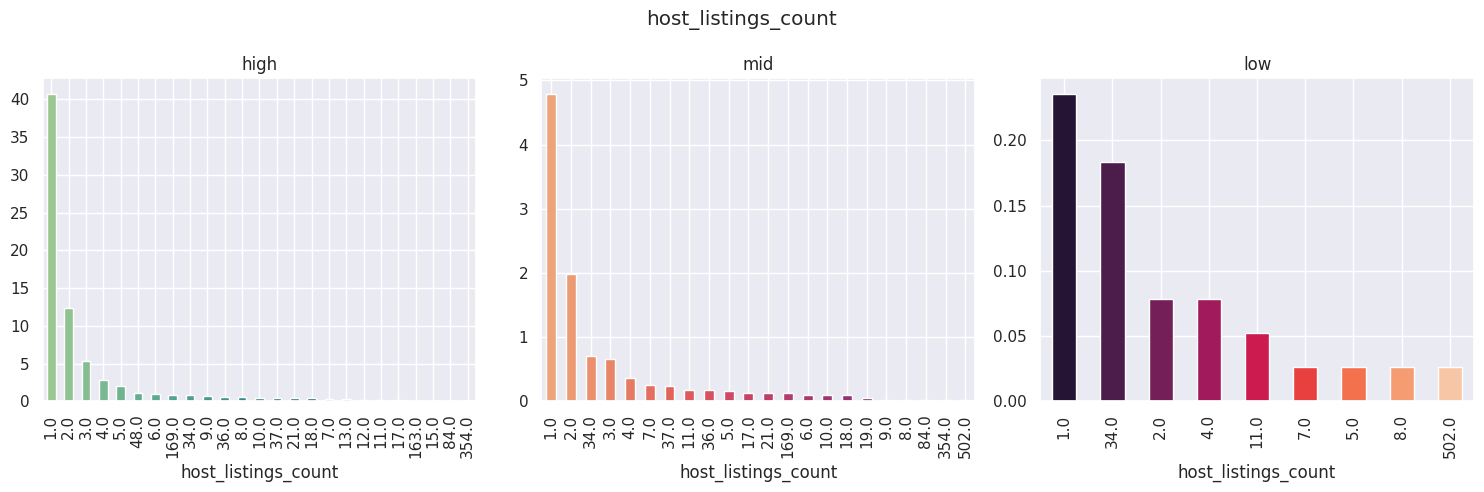

---------------------------------------------------------------------------------------------------------------------


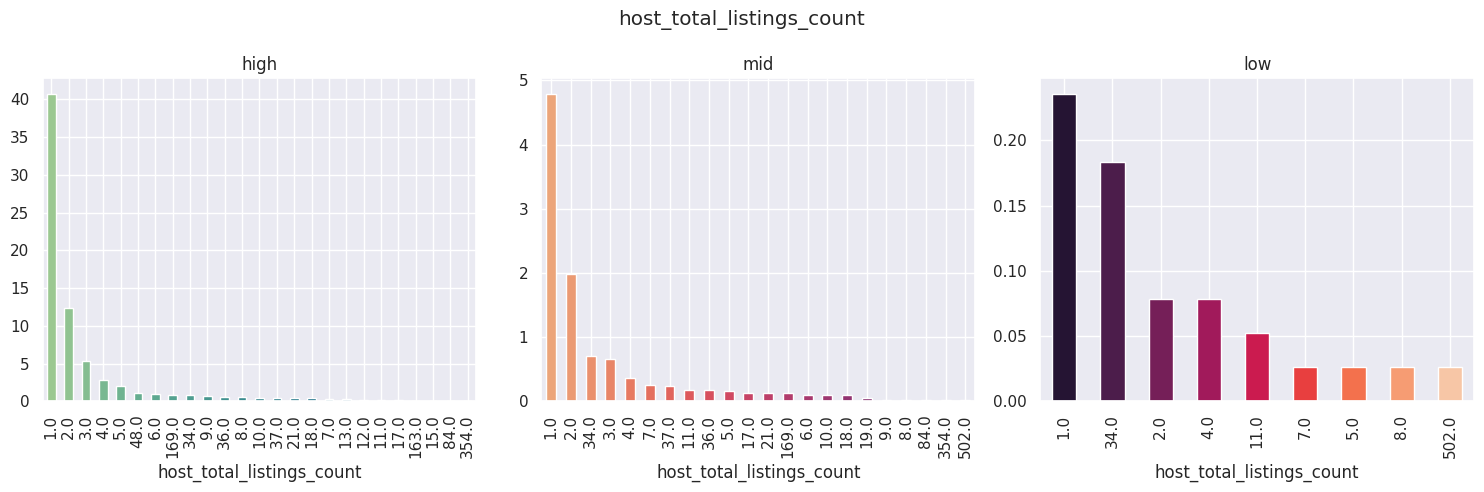

---------------------------------------------------------------------------------------------------------------------


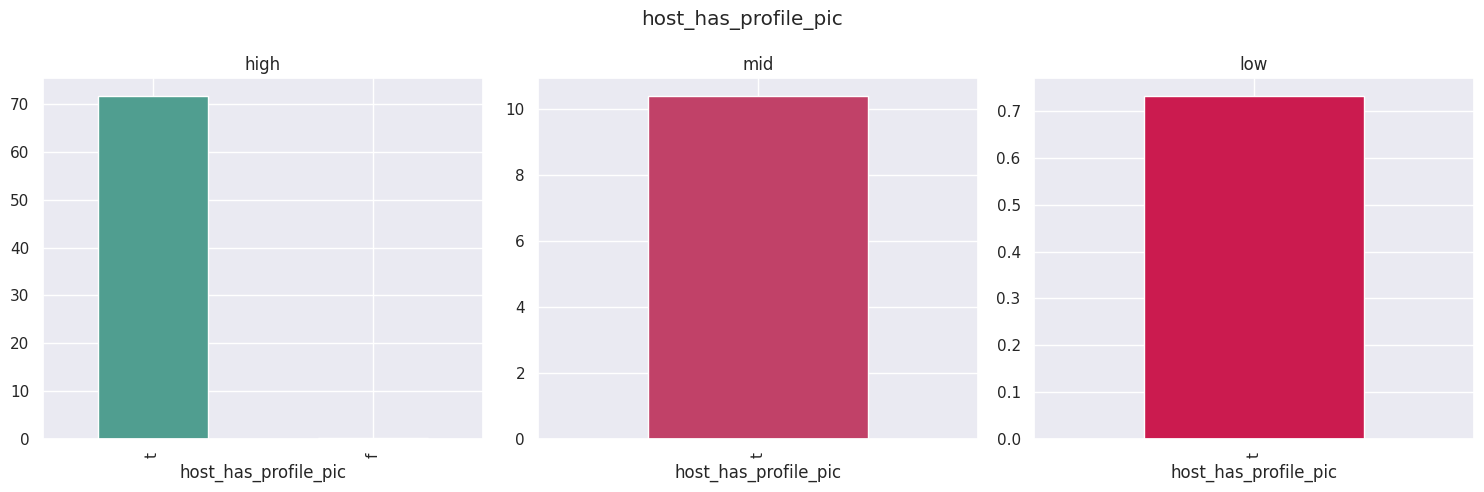

---------------------------------------------------------------------------------------------------------------------


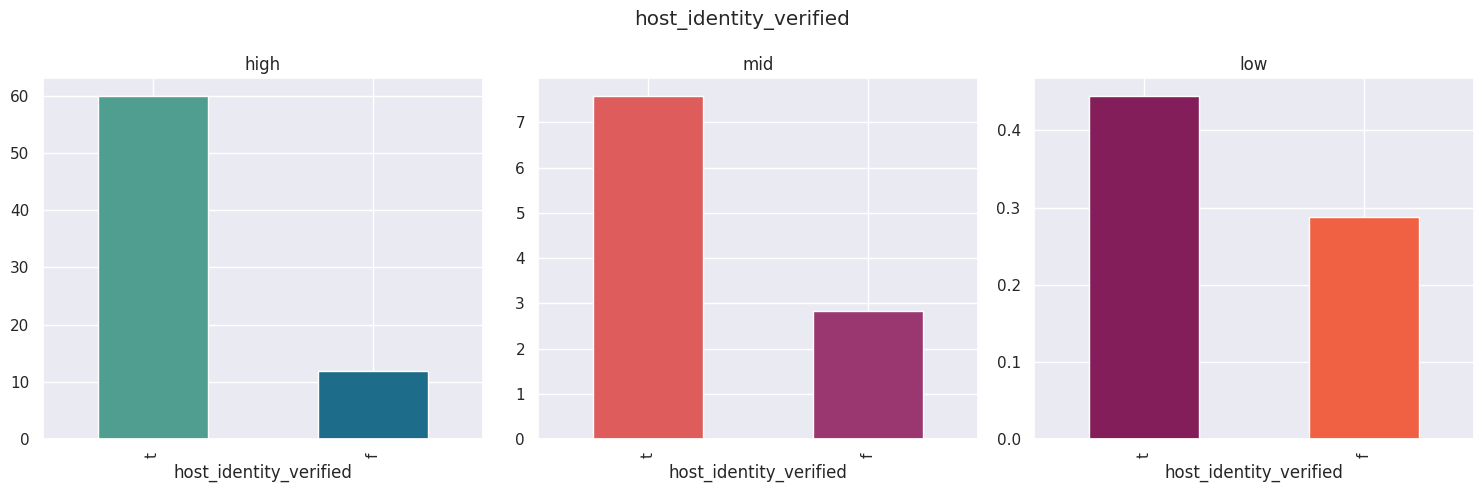

---------------------------------------------------------------------------------------------------------------------


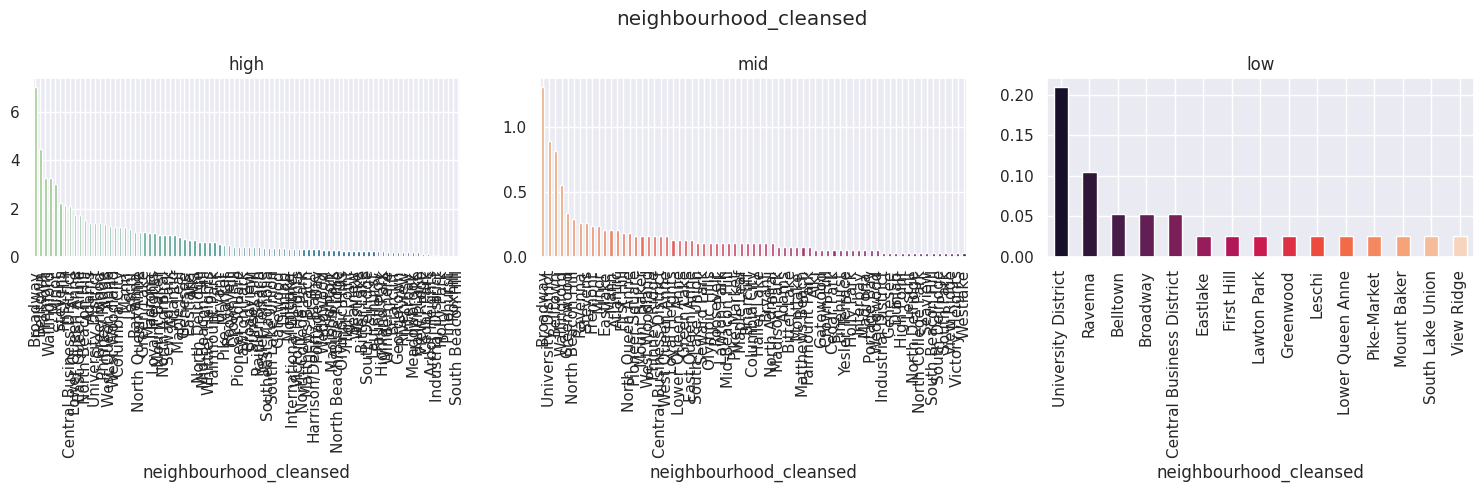

---------------------------------------------------------------------------------------------------------------------


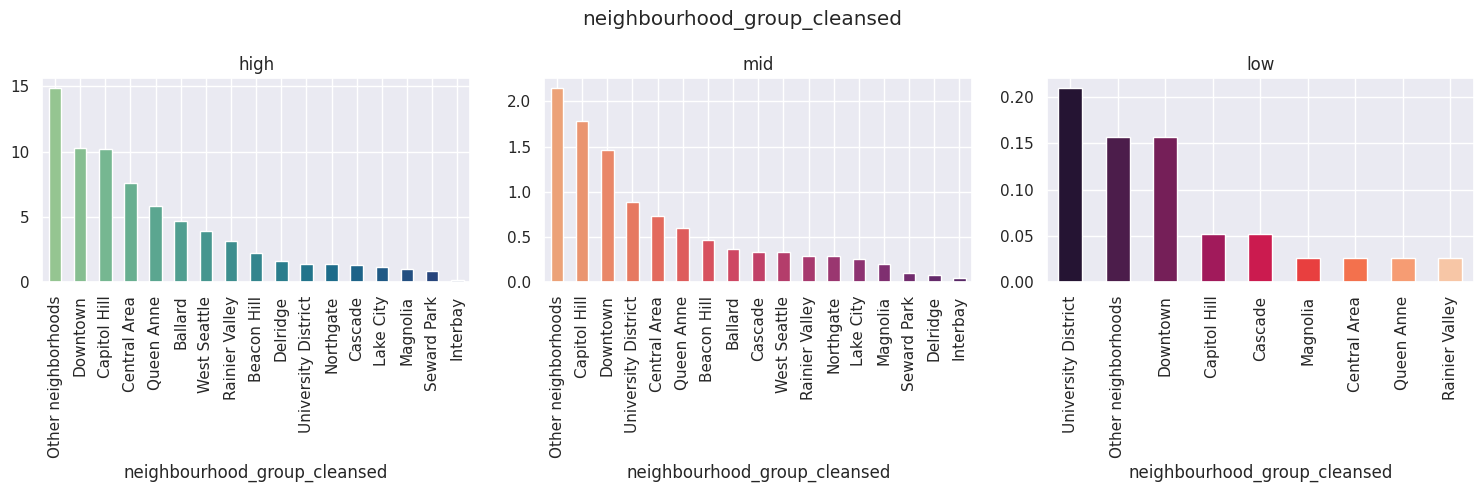

---------------------------------------------------------------------------------------------------------------------


/tmp/ipython-input-126-135017051.py:27: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-126-135017051.py:27: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-126-135017051.py:27: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE})

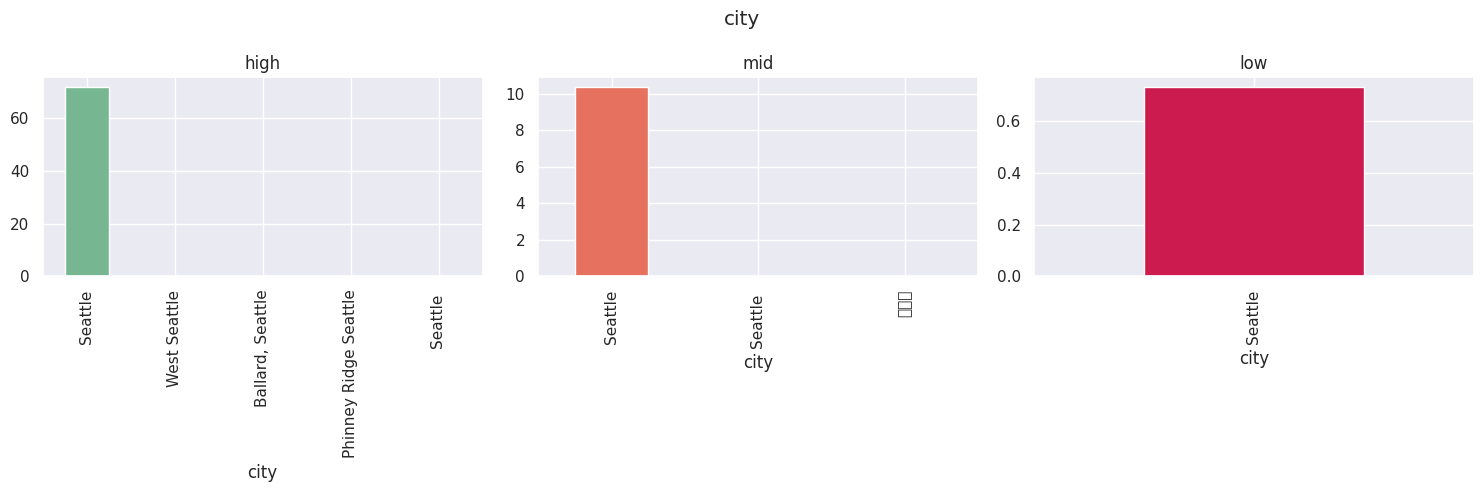

---------------------------------------------------------------------------------------------------------------------


/tmp/ipython-input-126-135017051.py:27: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-126-135017051.py:27: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-126-135017051.py:27: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE})

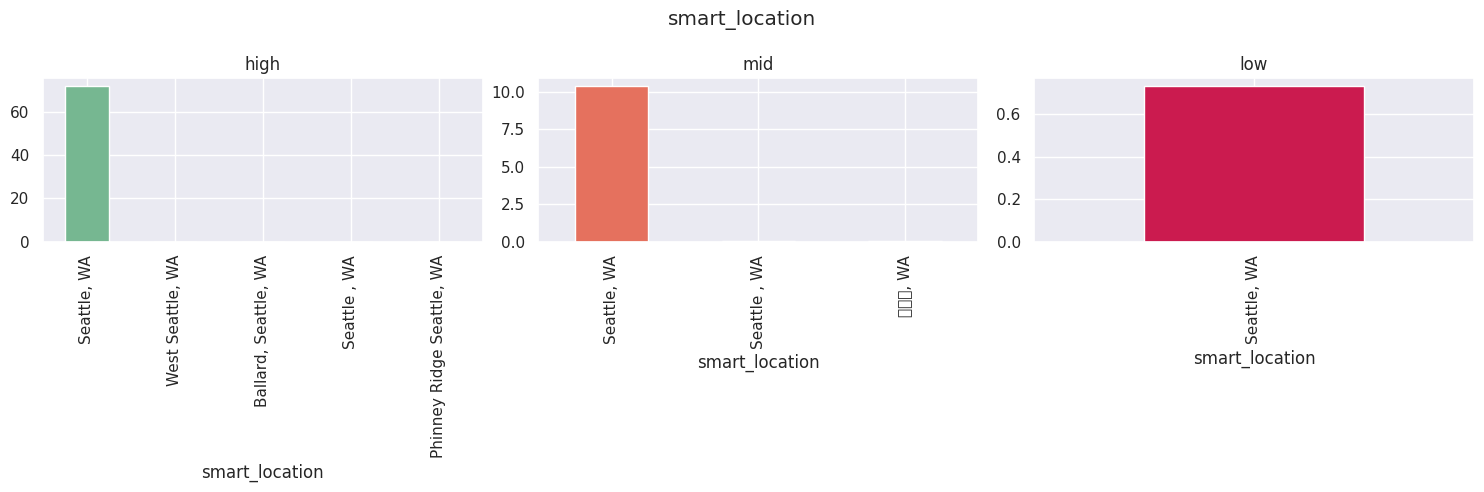

---------------------------------------------------------------------------------------------------------------------


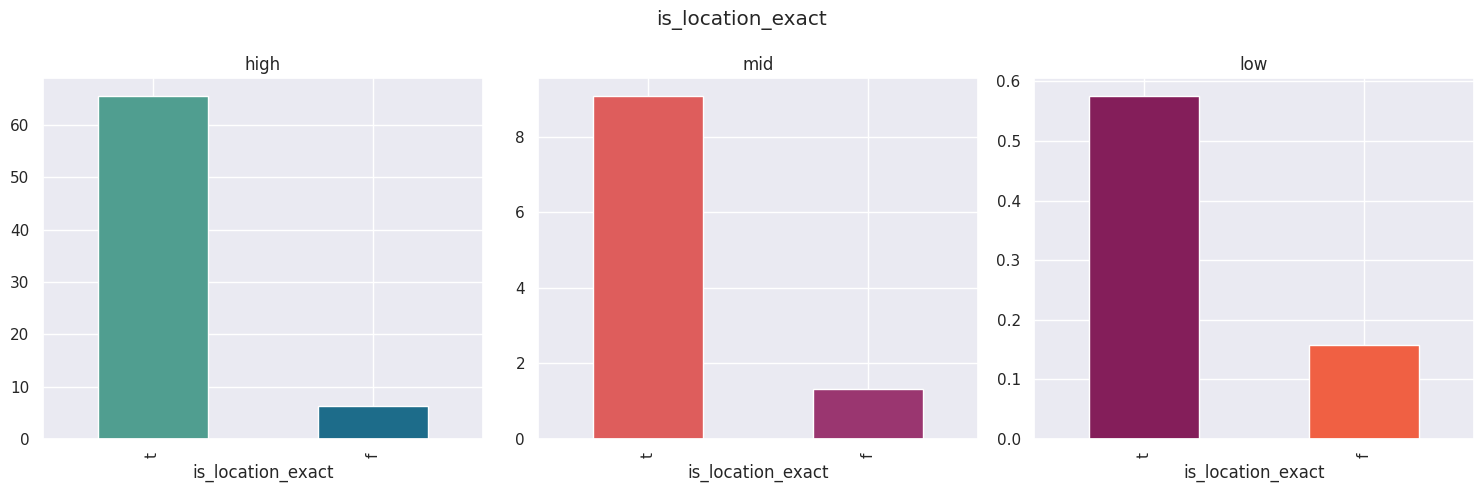

---------------------------------------------------------------------------------------------------------------------


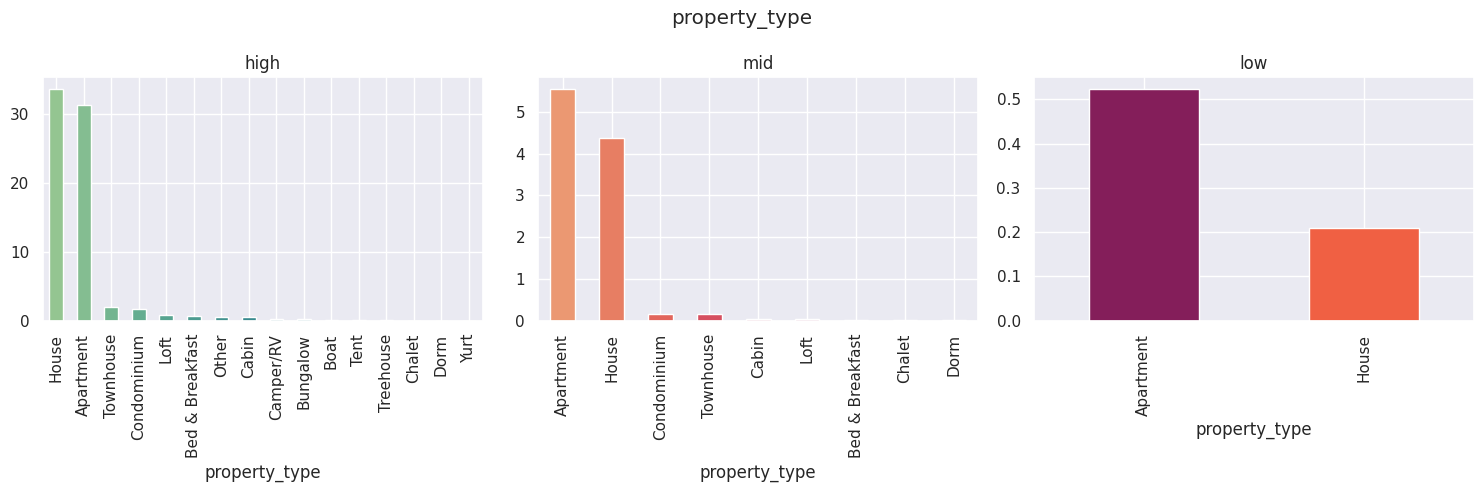

---------------------------------------------------------------------------------------------------------------------


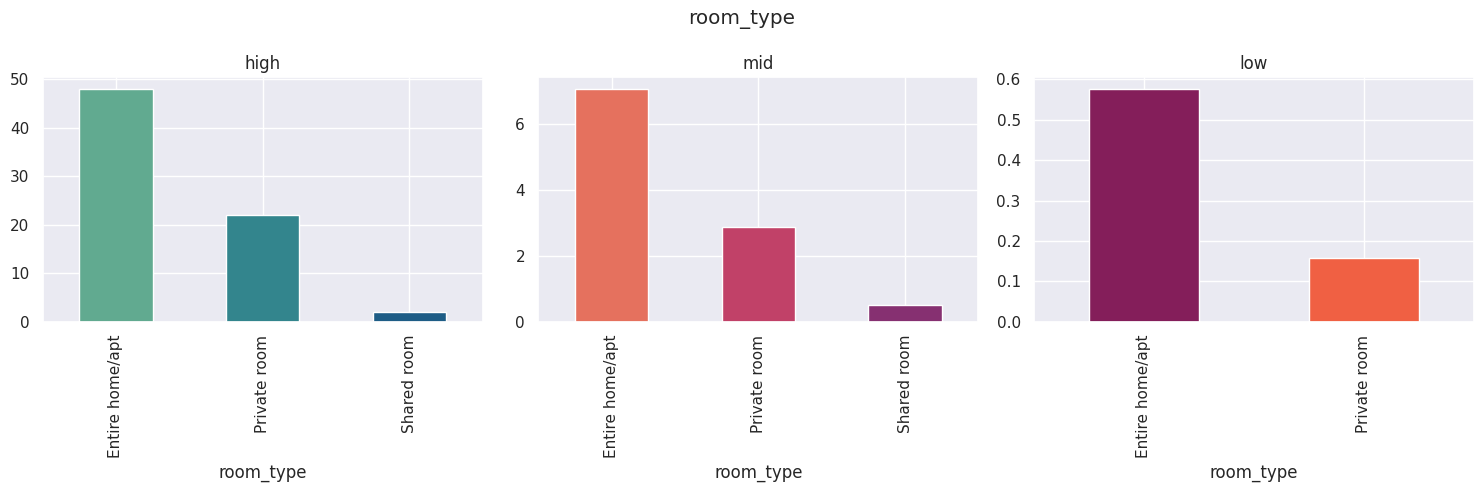

---------------------------------------------------------------------------------------------------------------------


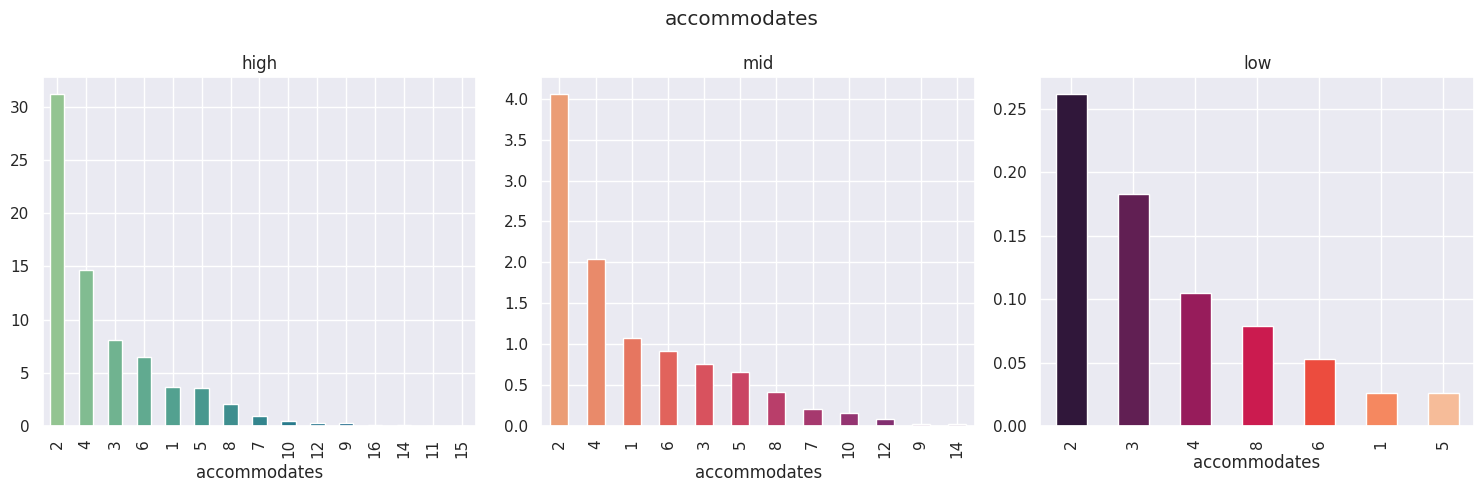

---------------------------------------------------------------------------------------------------------------------


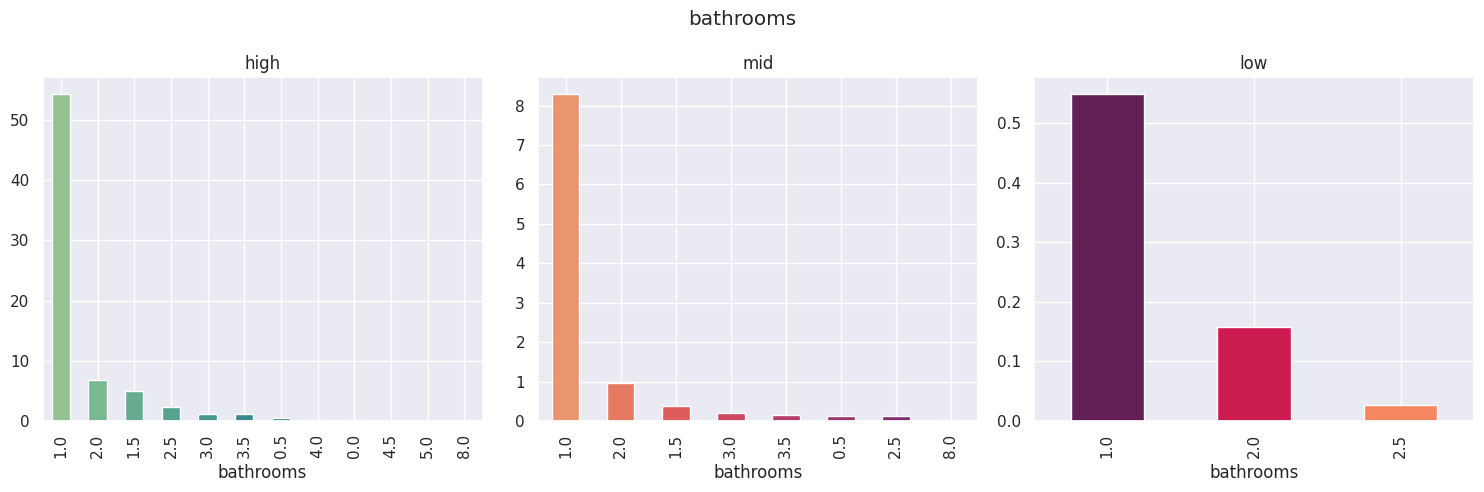

---------------------------------------------------------------------------------------------------------------------


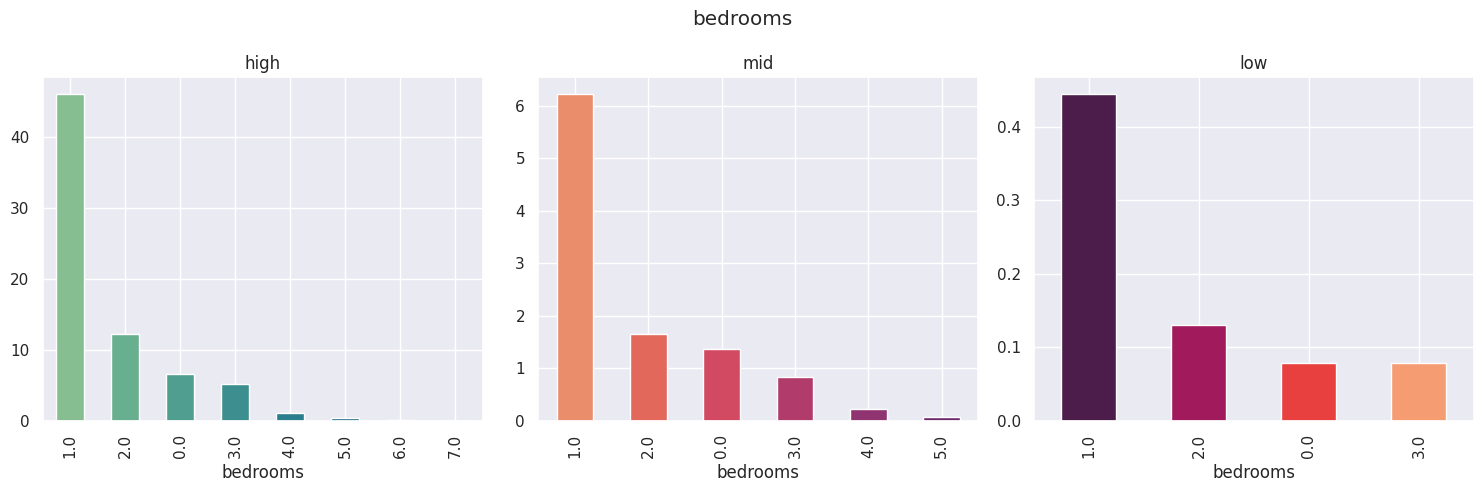

---------------------------------------------------------------------------------------------------------------------


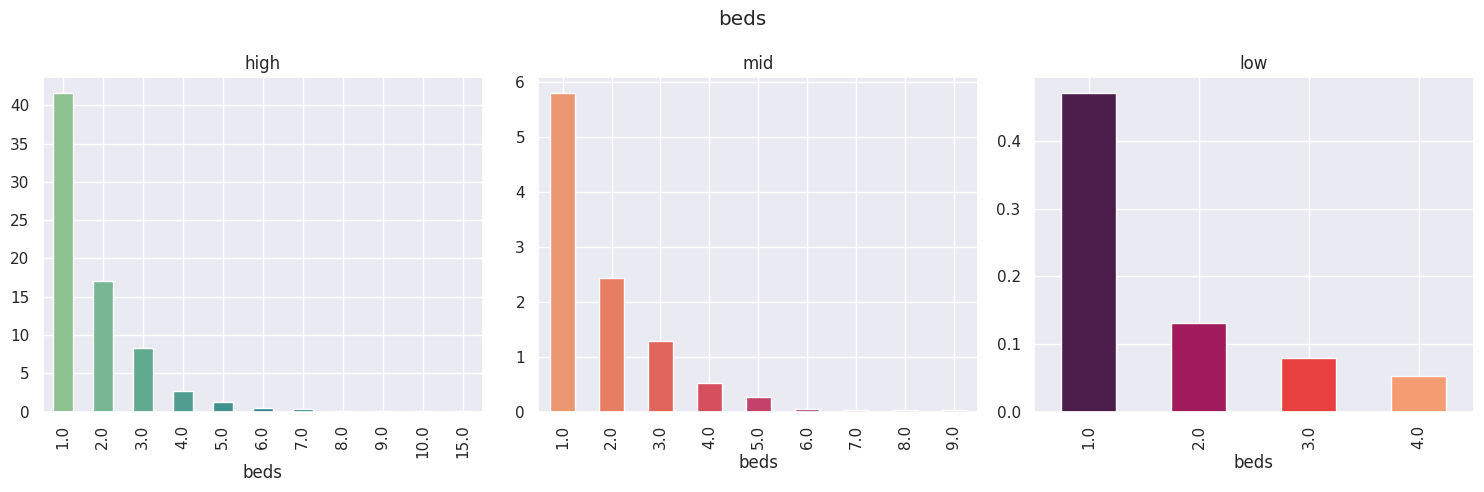

---------------------------------------------------------------------------------------------------------------------


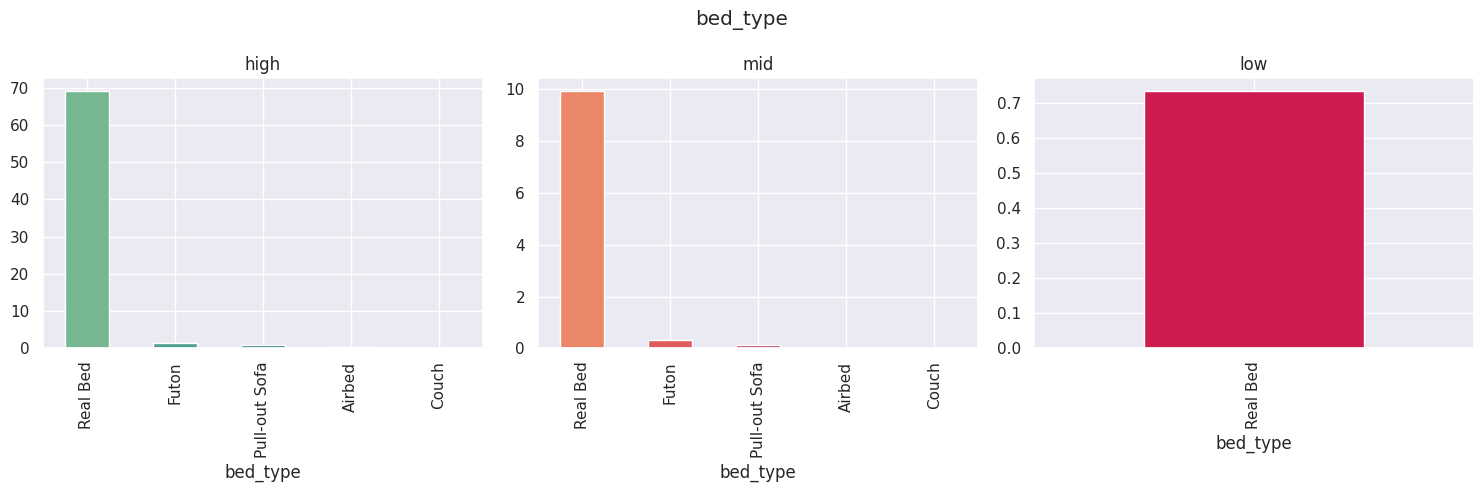

---------------------------------------------------------------------------------------------------------------------


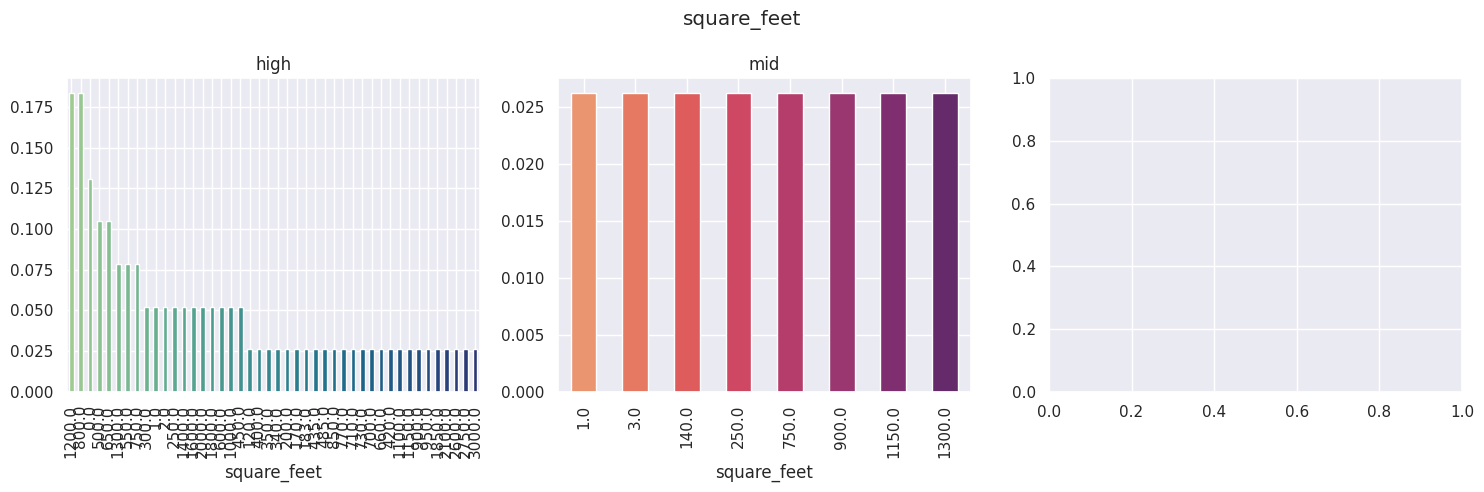

---------------------------------------------------------------------------------------------------------------------


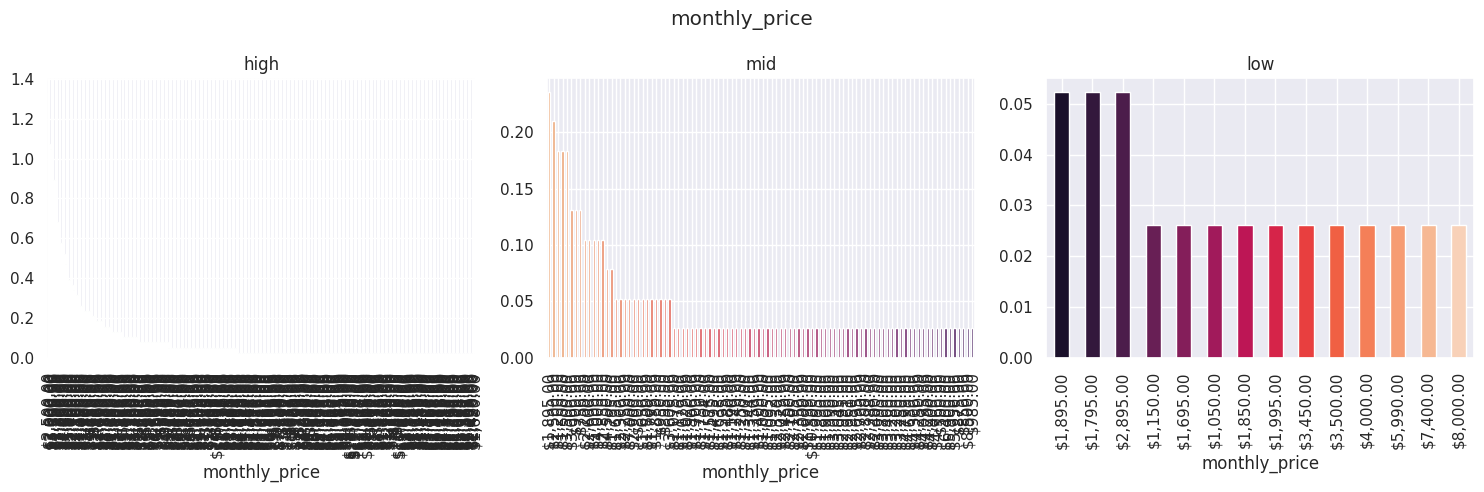

---------------------------------------------------------------------------------------------------------------------


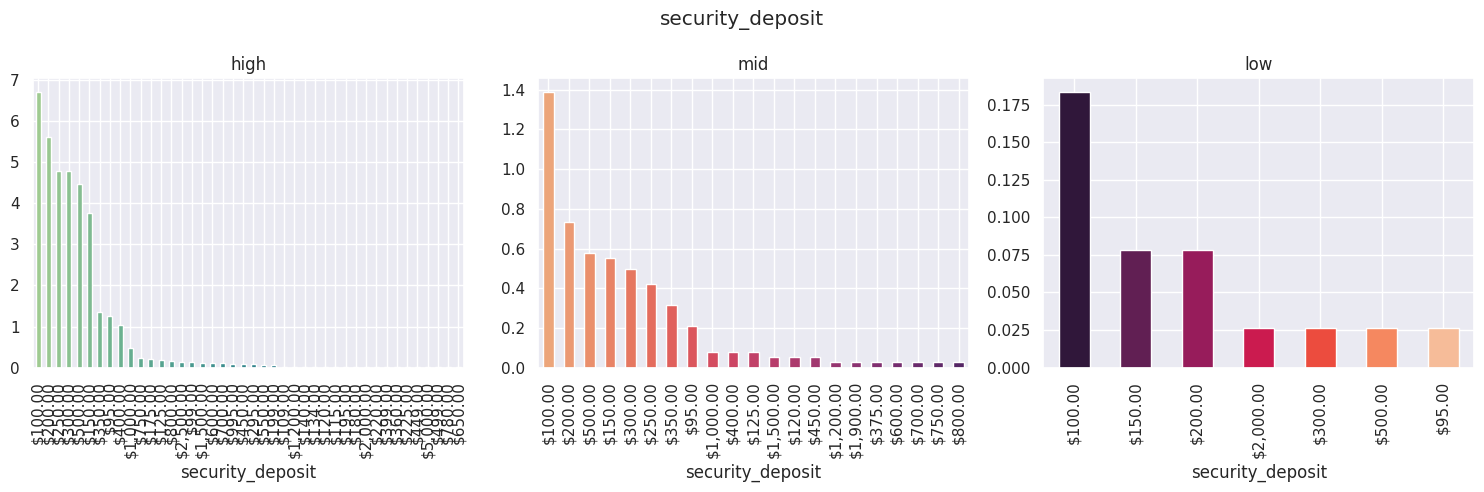

---------------------------------------------------------------------------------------------------------------------


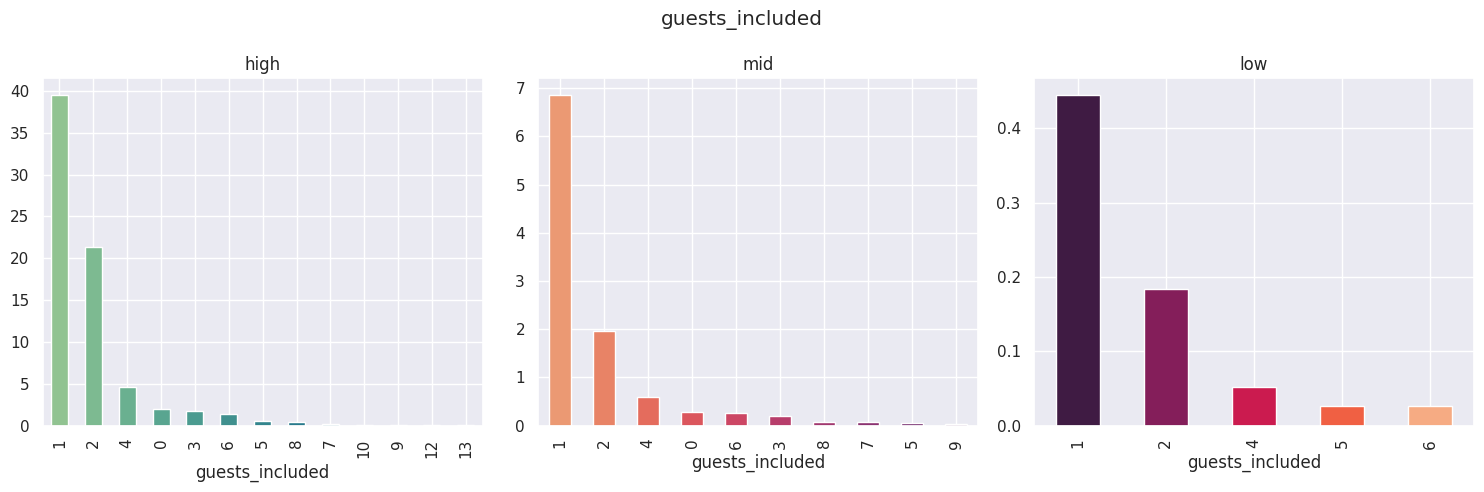

---------------------------------------------------------------------------------------------------------------------


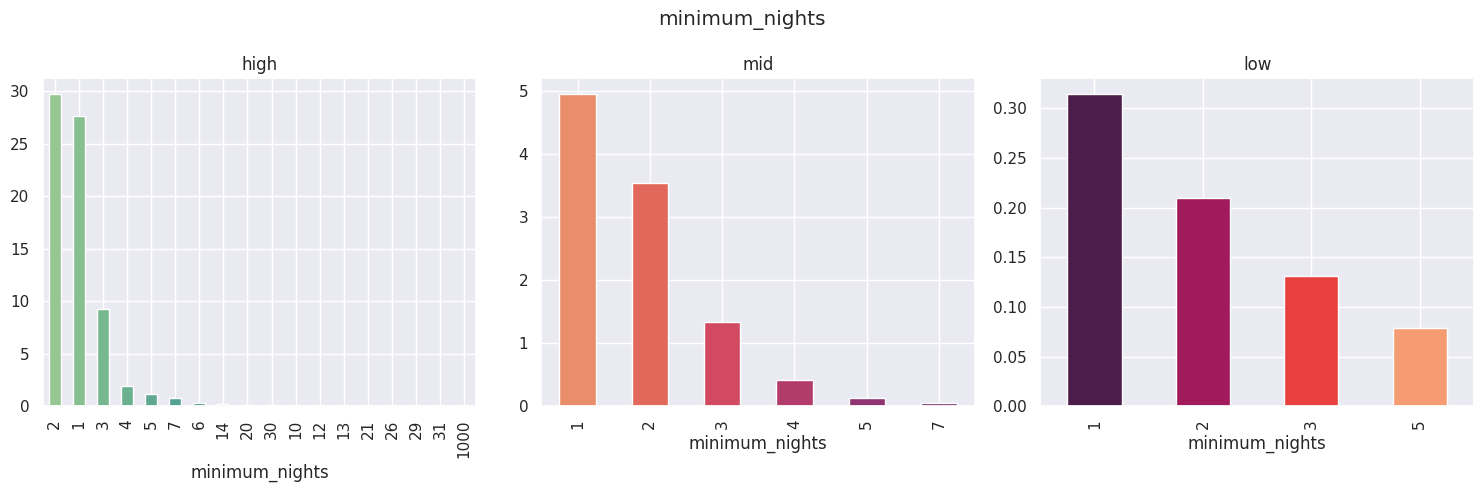

---------------------------------------------------------------------------------------------------------------------


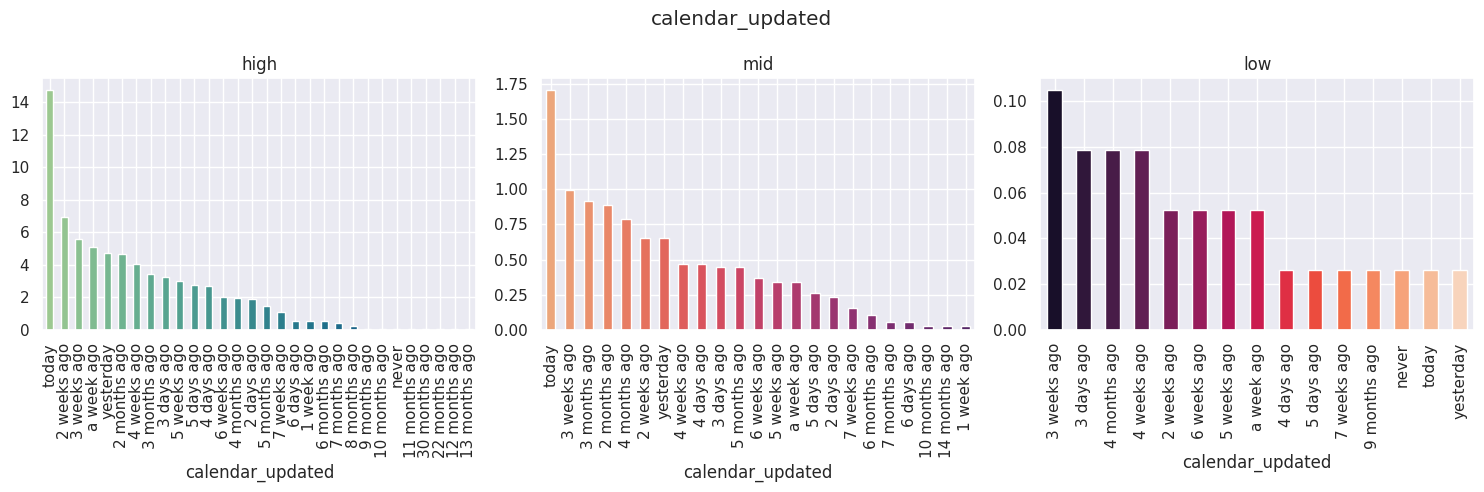

---------------------------------------------------------------------------------------------------------------------


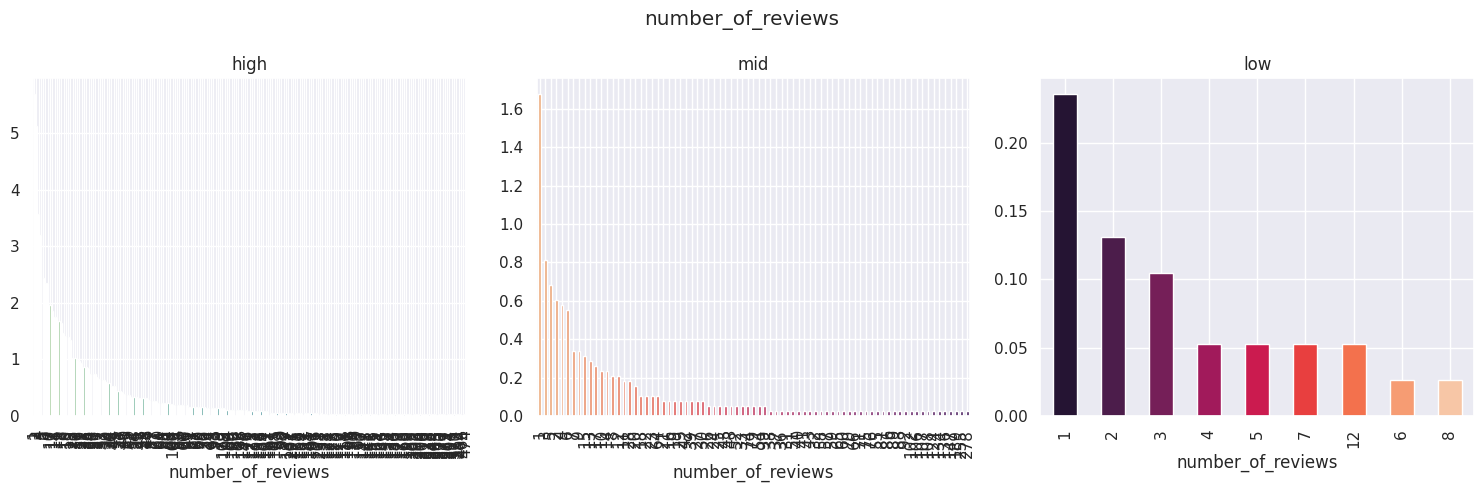

---------------------------------------------------------------------------------------------------------------------


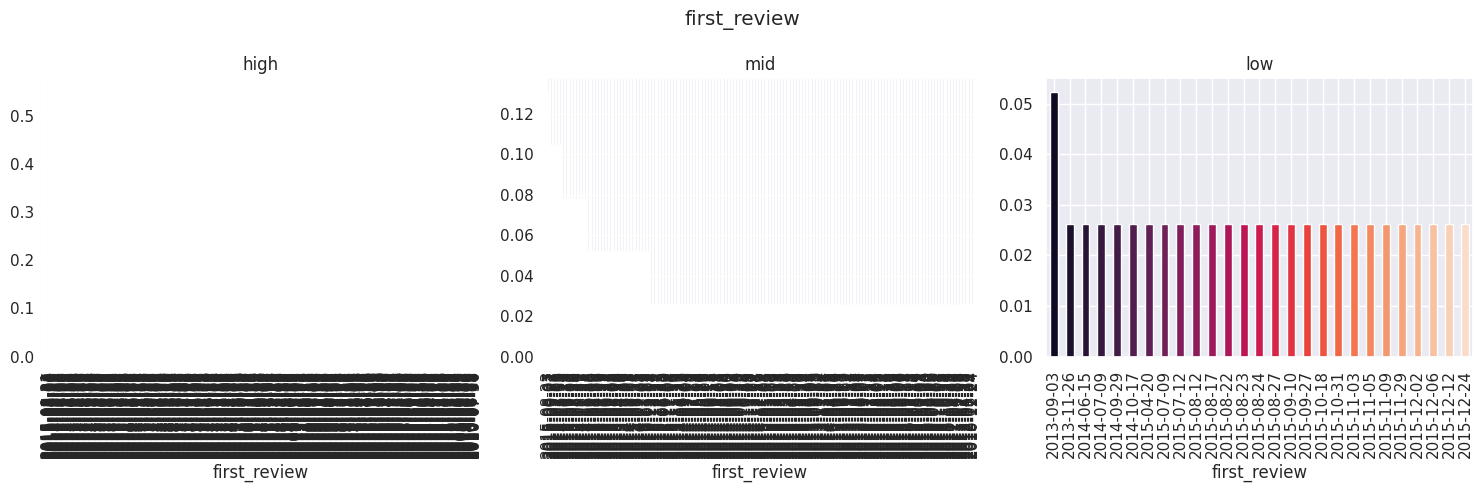

---------------------------------------------------------------------------------------------------------------------


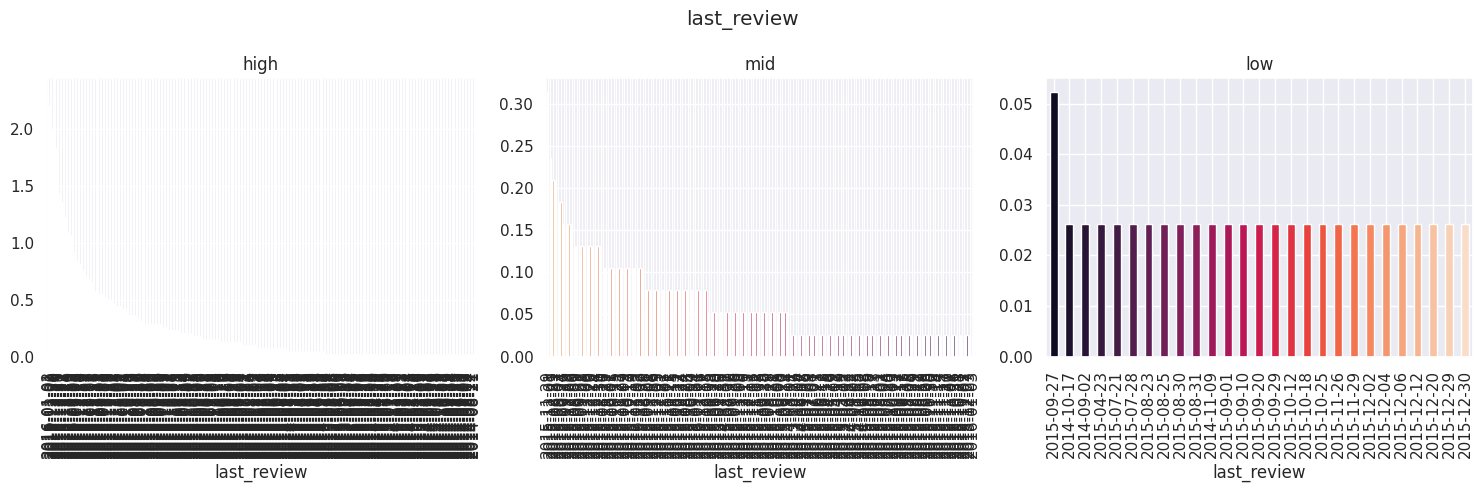

---------------------------------------------------------------------------------------------------------------------


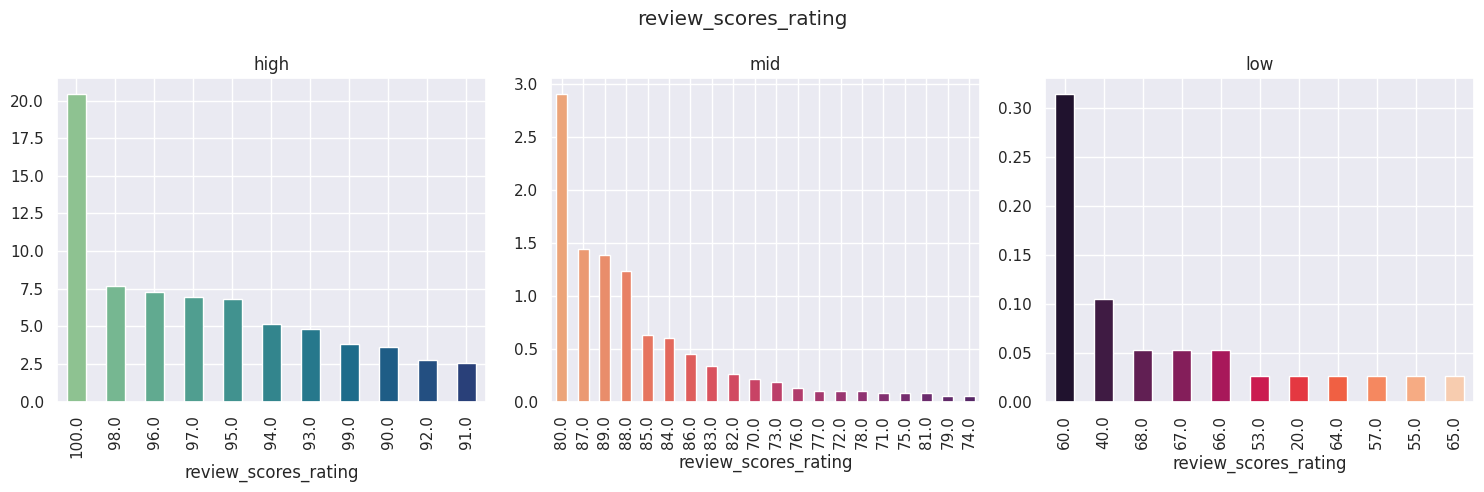

---------------------------------------------------------------------------------------------------------------------


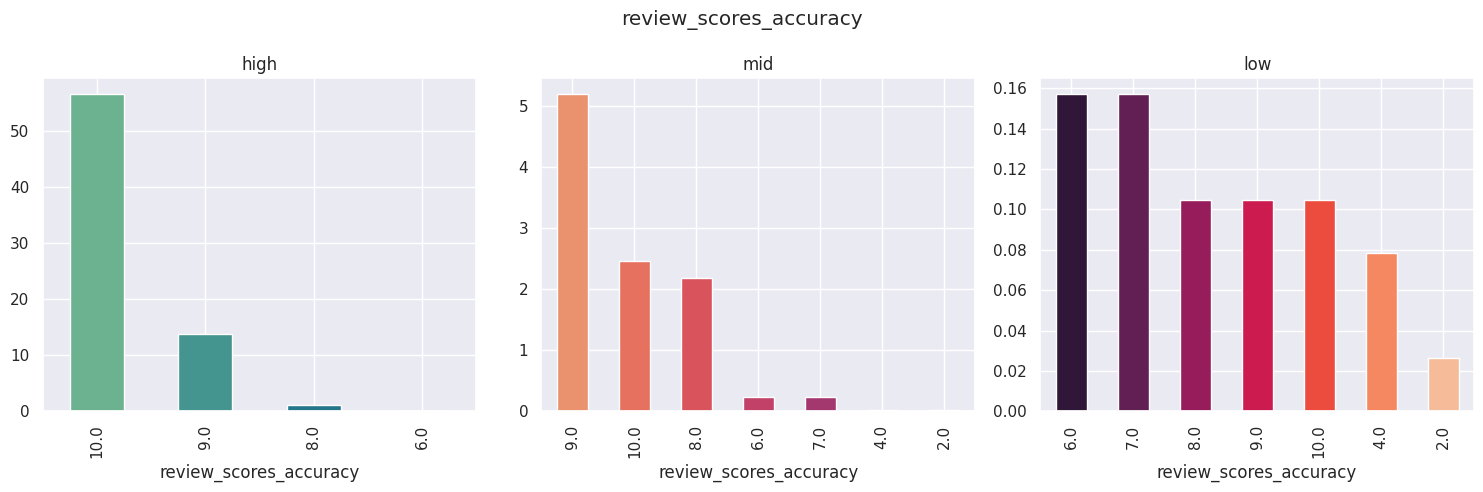

---------------------------------------------------------------------------------------------------------------------


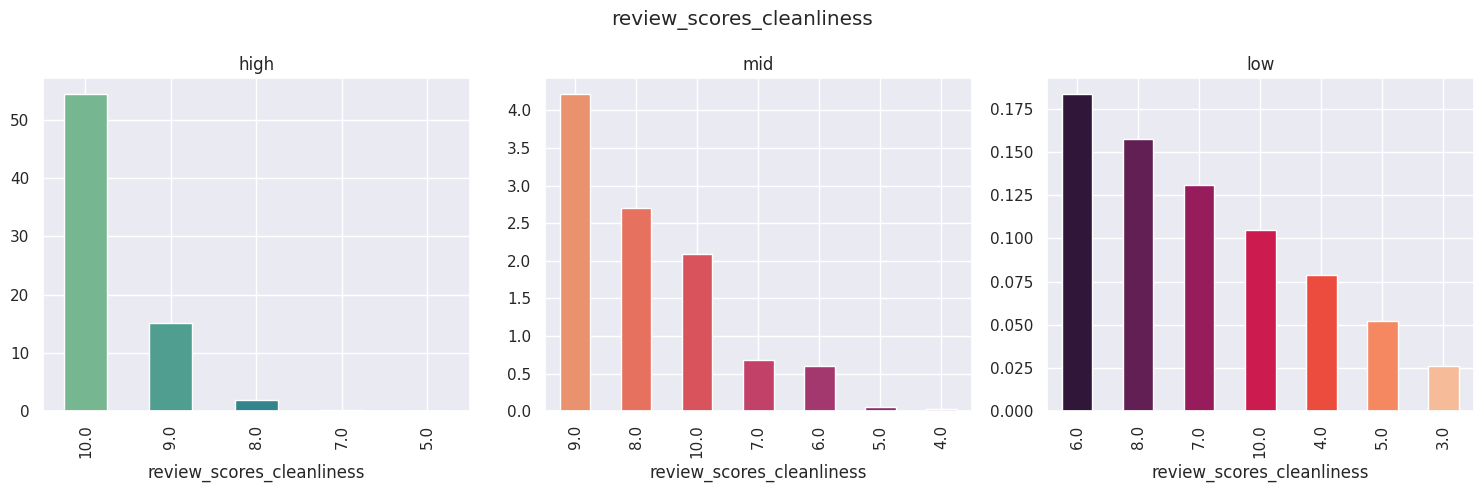

---------------------------------------------------------------------------------------------------------------------


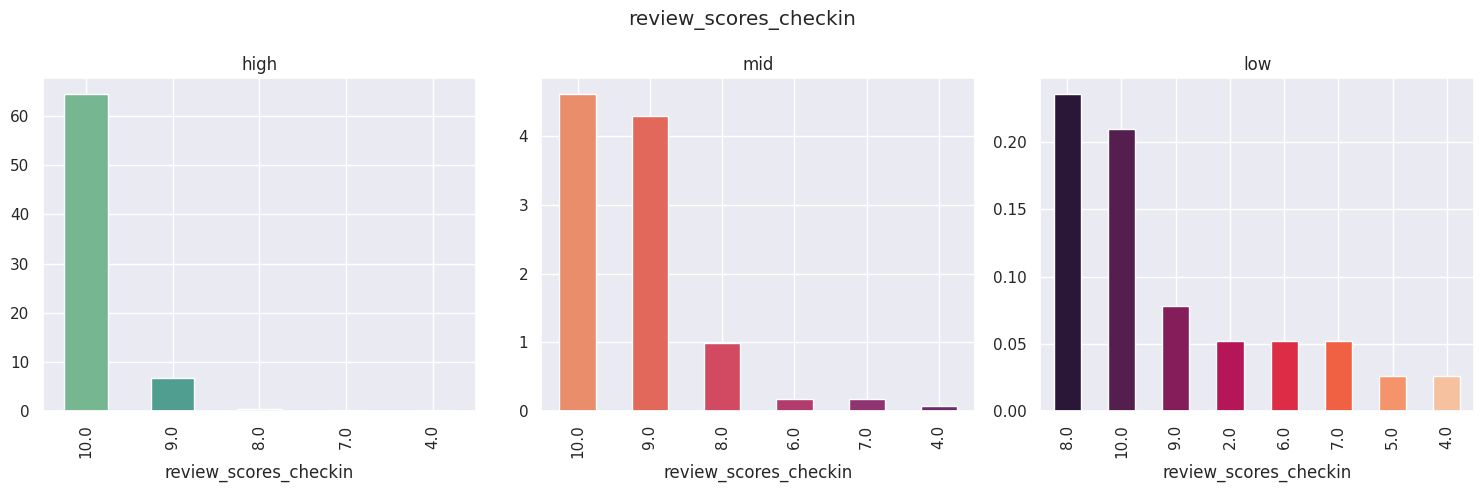

---------------------------------------------------------------------------------------------------------------------


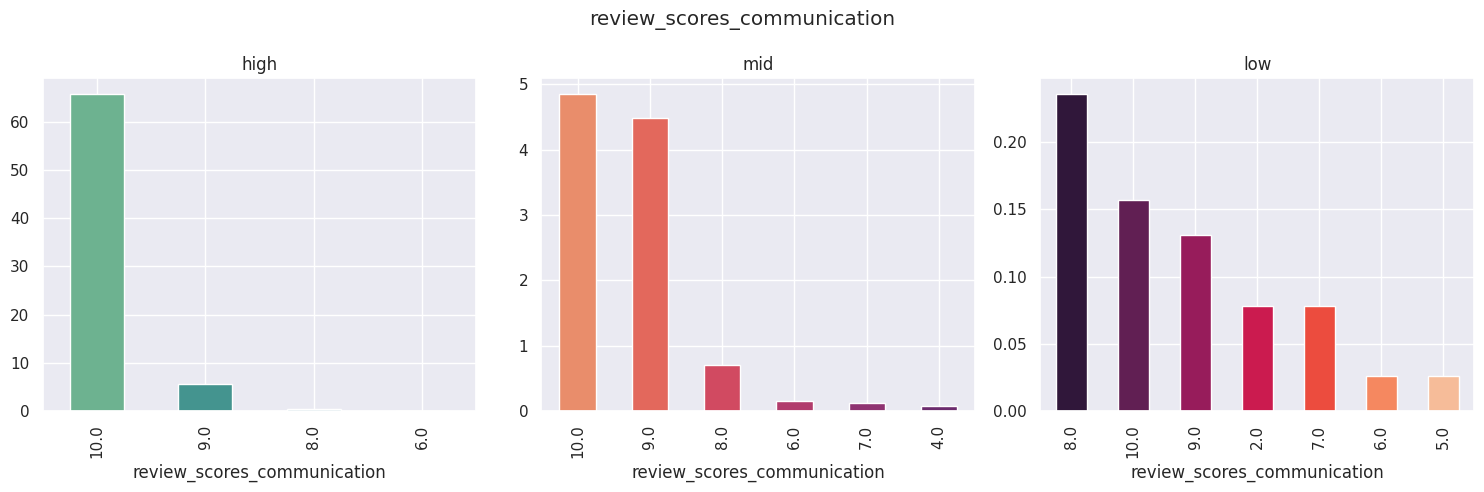

---------------------------------------------------------------------------------------------------------------------


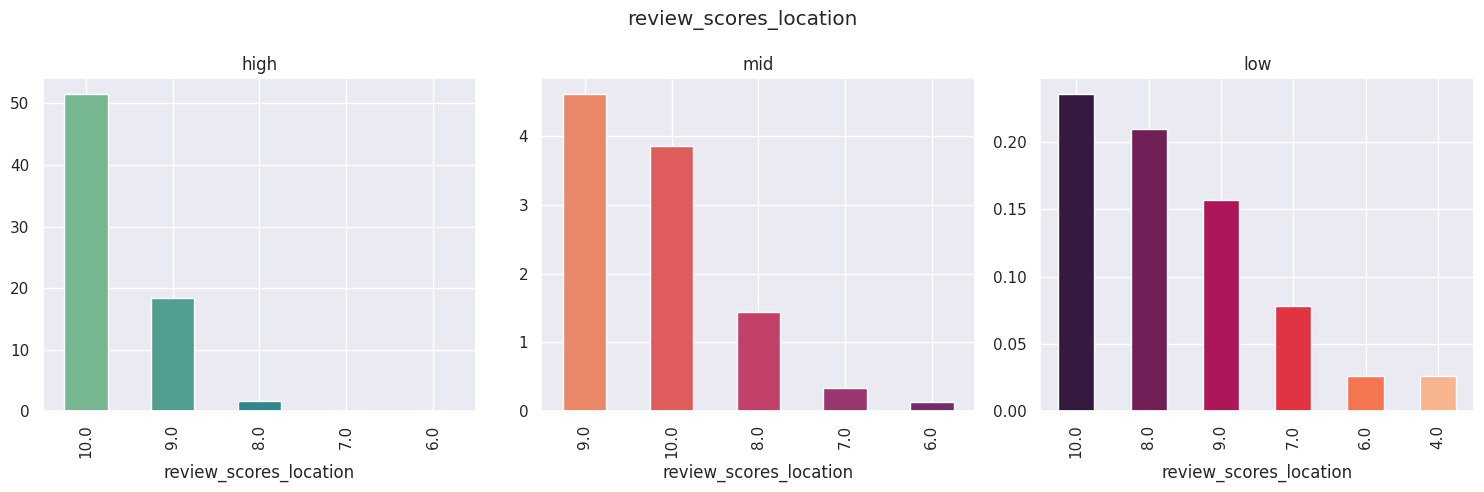

---------------------------------------------------------------------------------------------------------------------


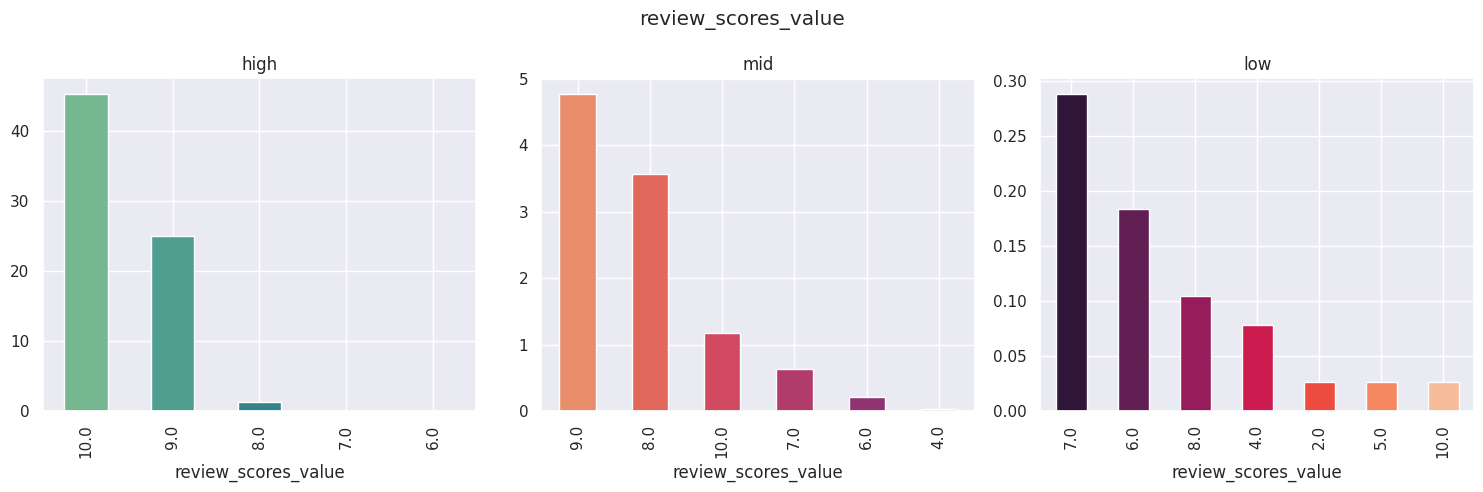

---------------------------------------------------------------------------------------------------------------------


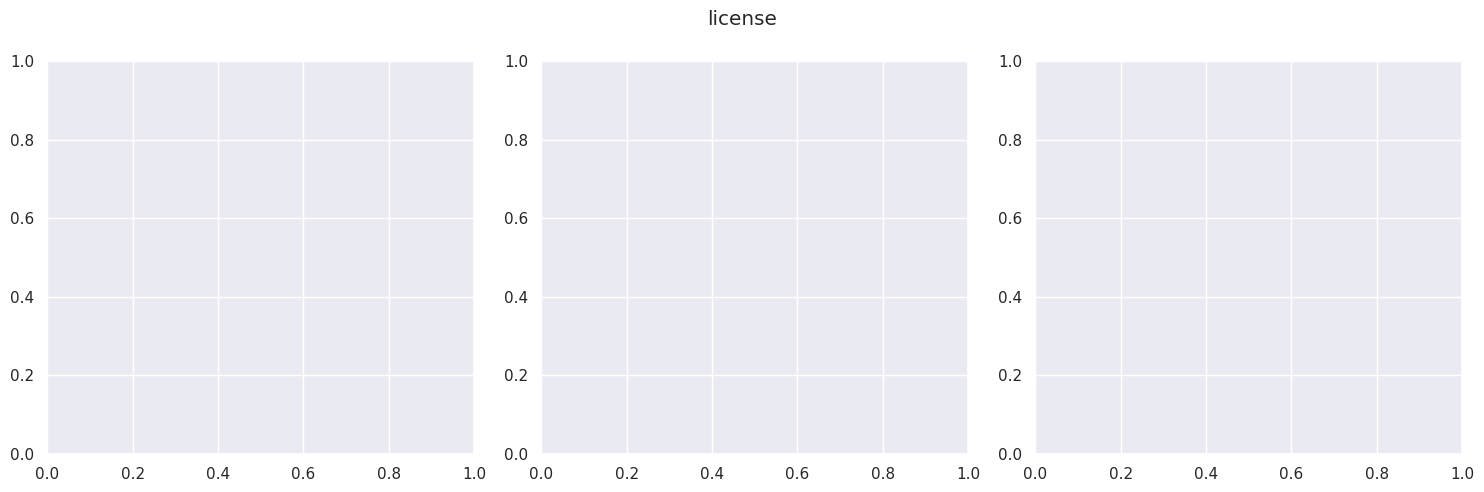

---------------------------------------------------------------------------------------------------------------------


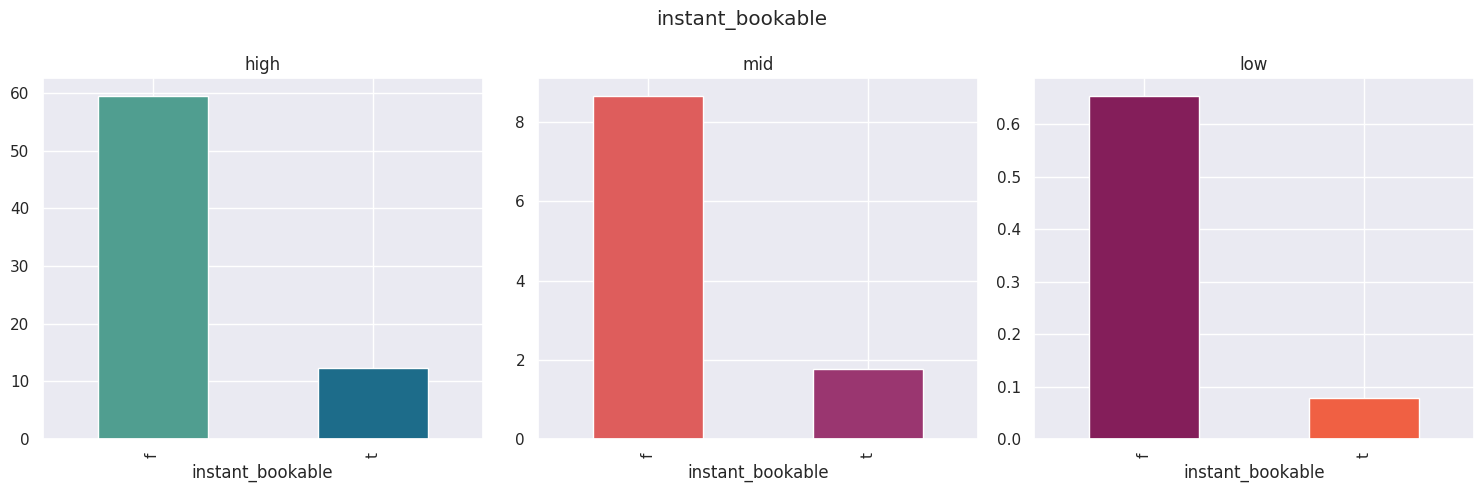

---------------------------------------------------------------------------------------------------------------------


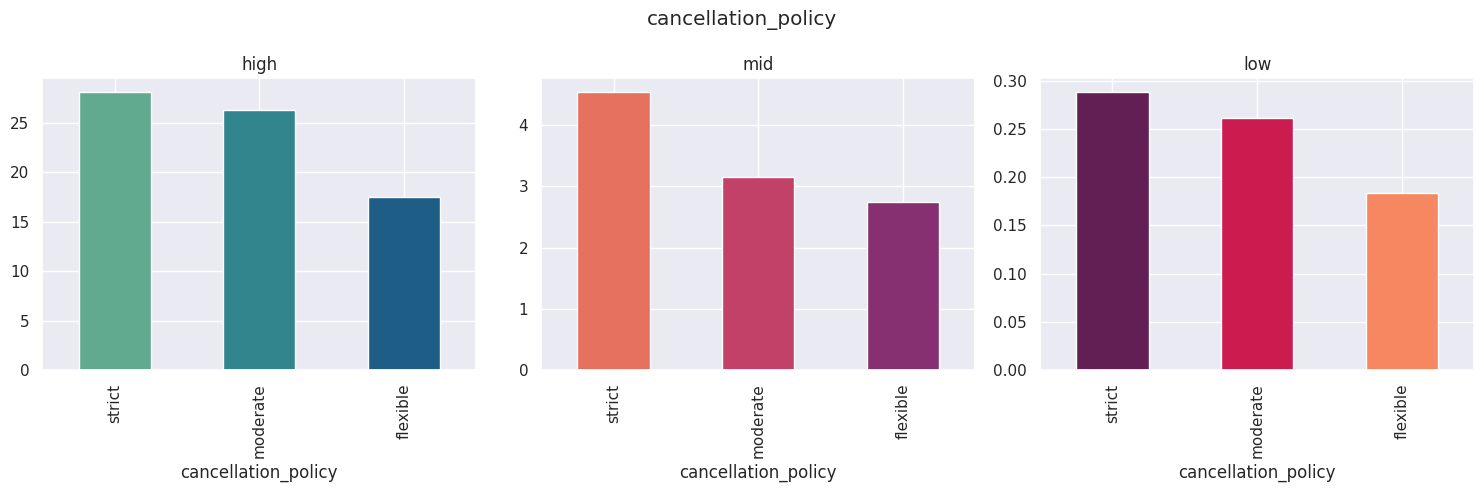

---------------------------------------------------------------------------------------------------------------------


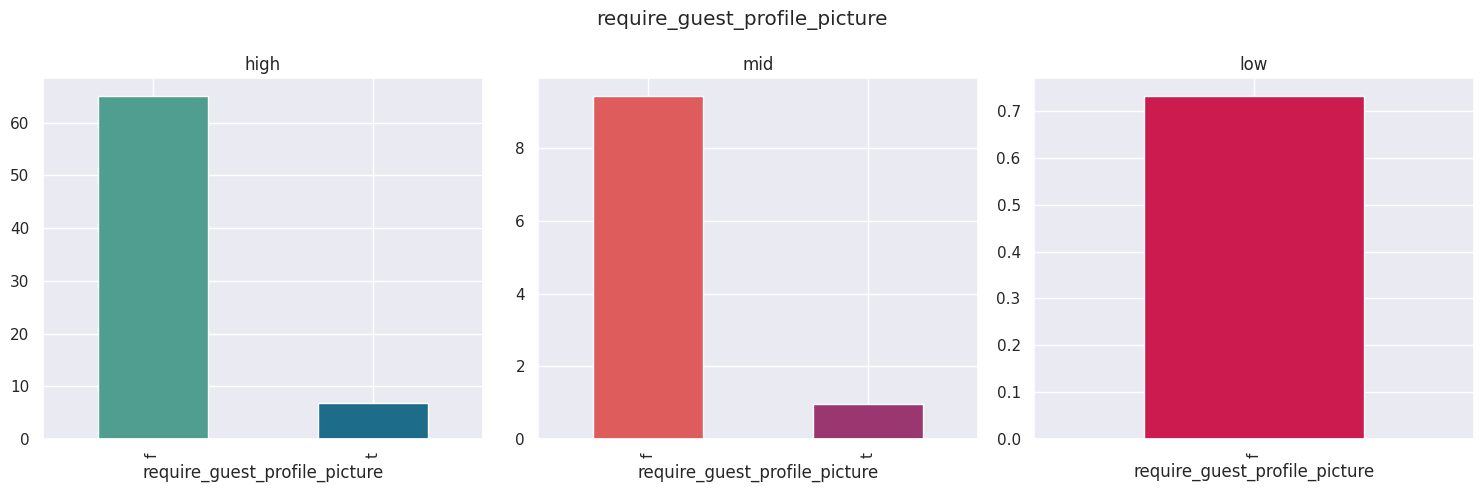

---------------------------------------------------------------------------------------------------------------------


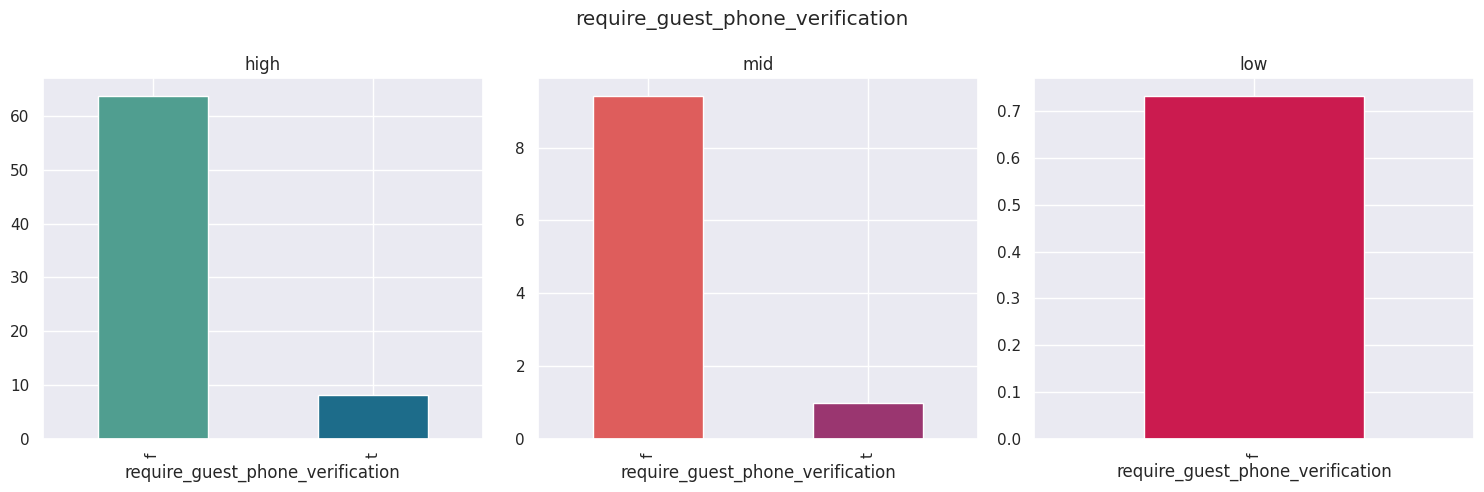

---------------------------------------------------------------------------------------------------------------------


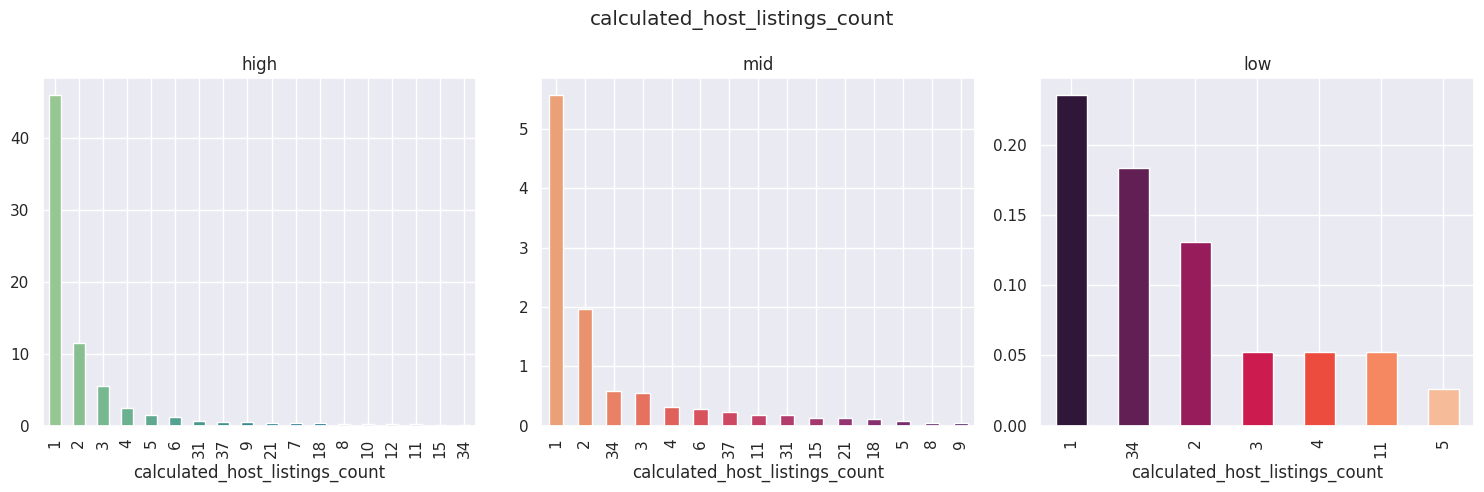

---------------------------------------------------------------------------------------------------------------------


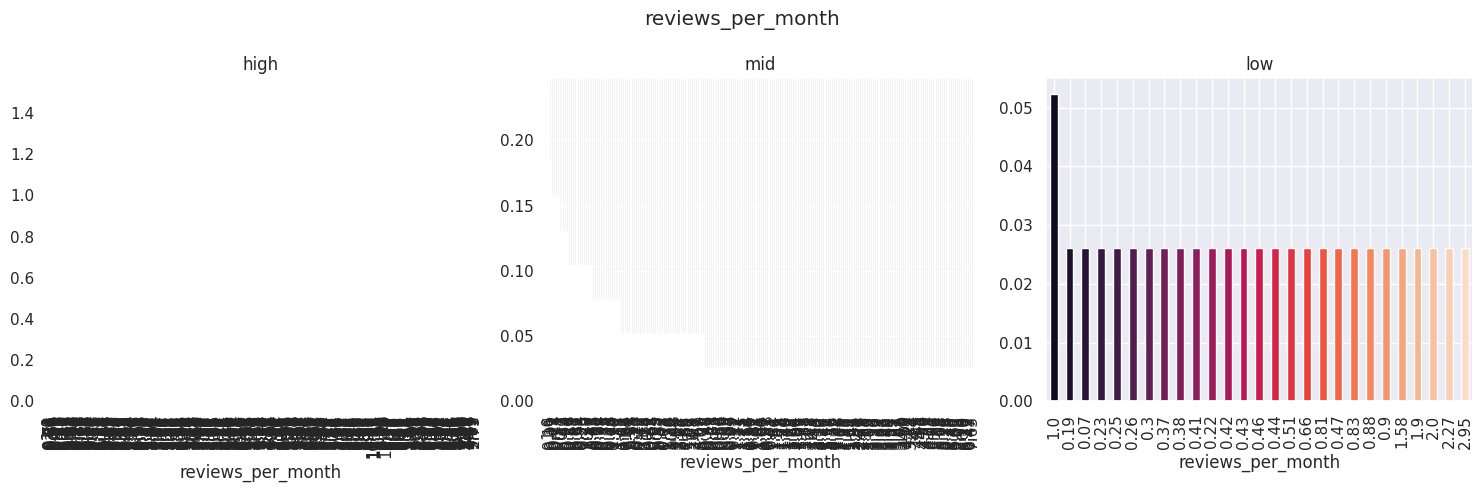

---------------------------------------------------------------------------------------------------------------------


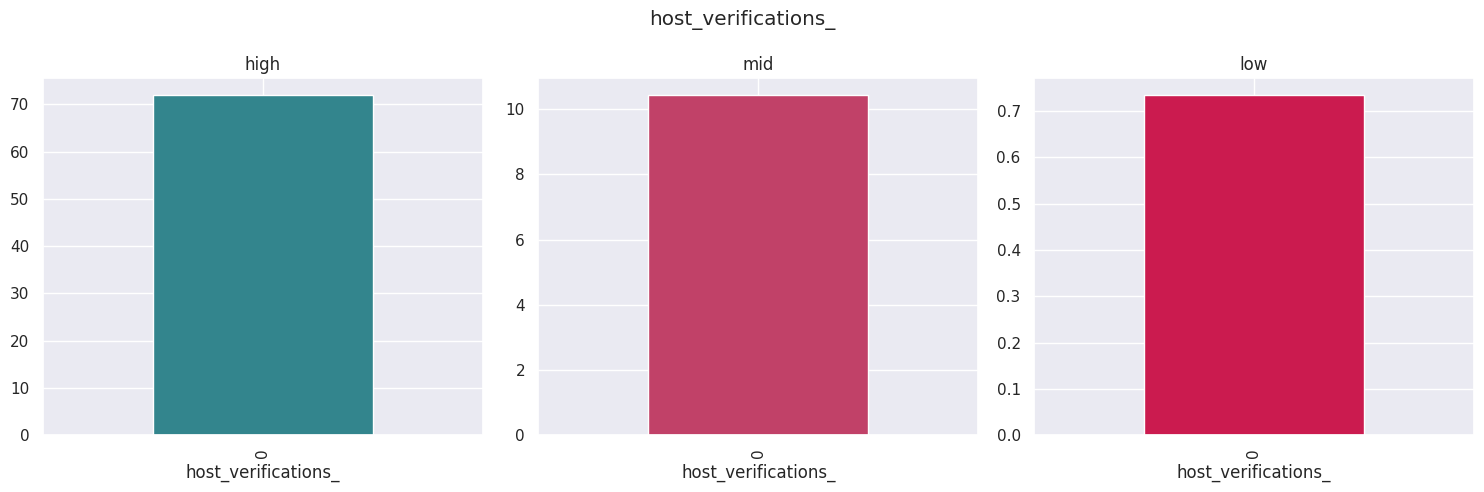

---------------------------------------------------------------------------------------------------------------------


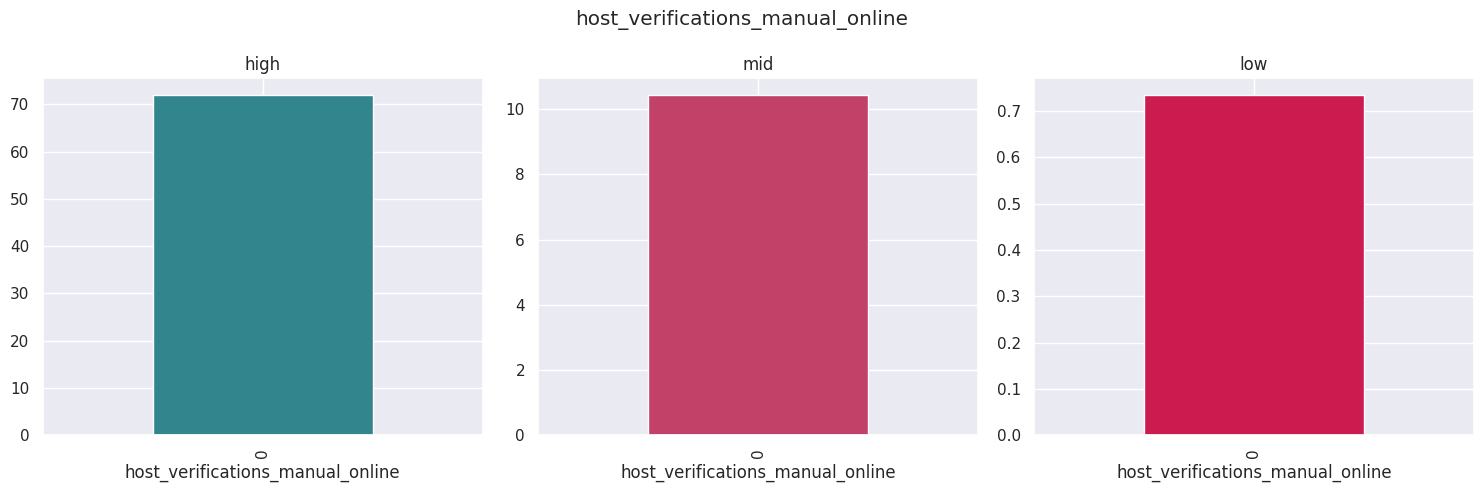

---------------------------------------------------------------------------------------------------------------------


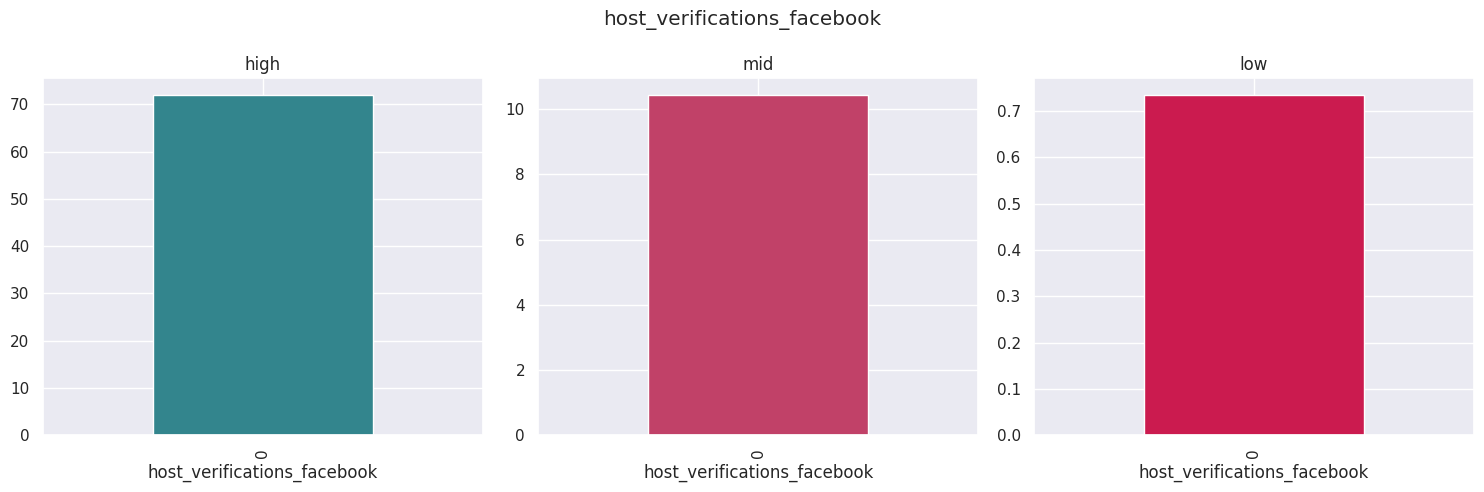

---------------------------------------------------------------------------------------------------------------------


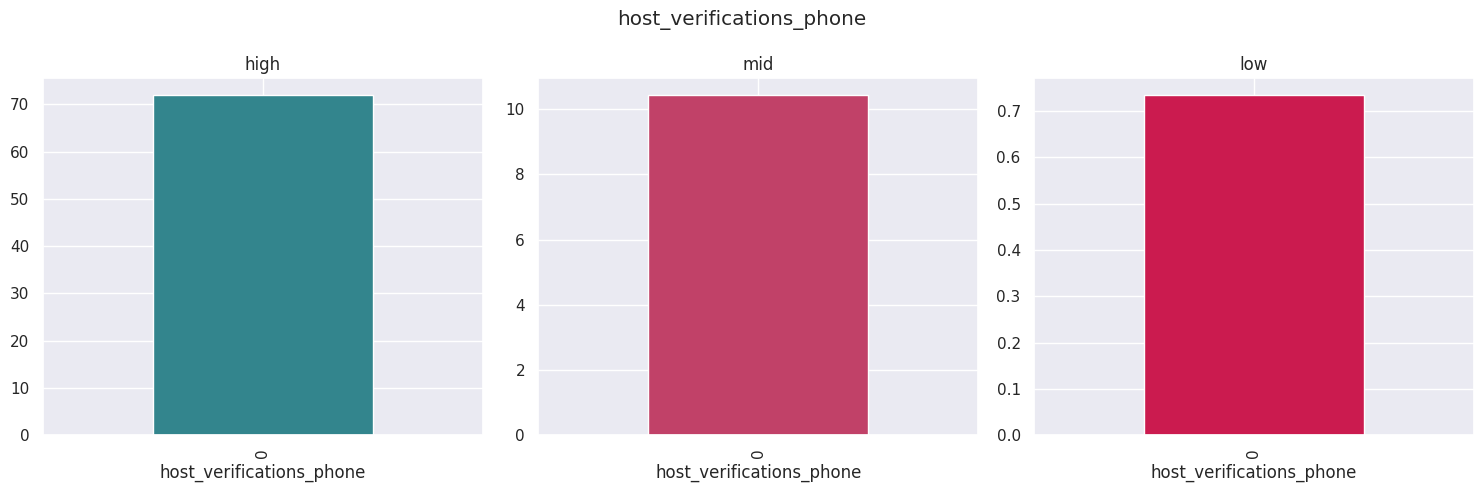

---------------------------------------------------------------------------------------------------------------------


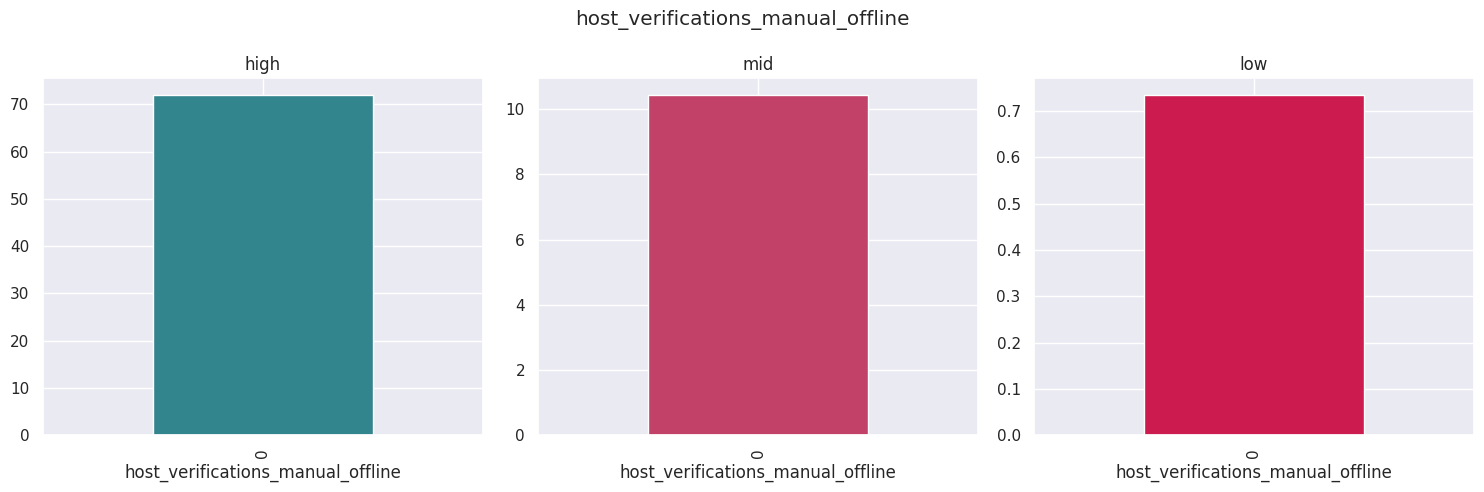

---------------------------------------------------------------------------------------------------------------------


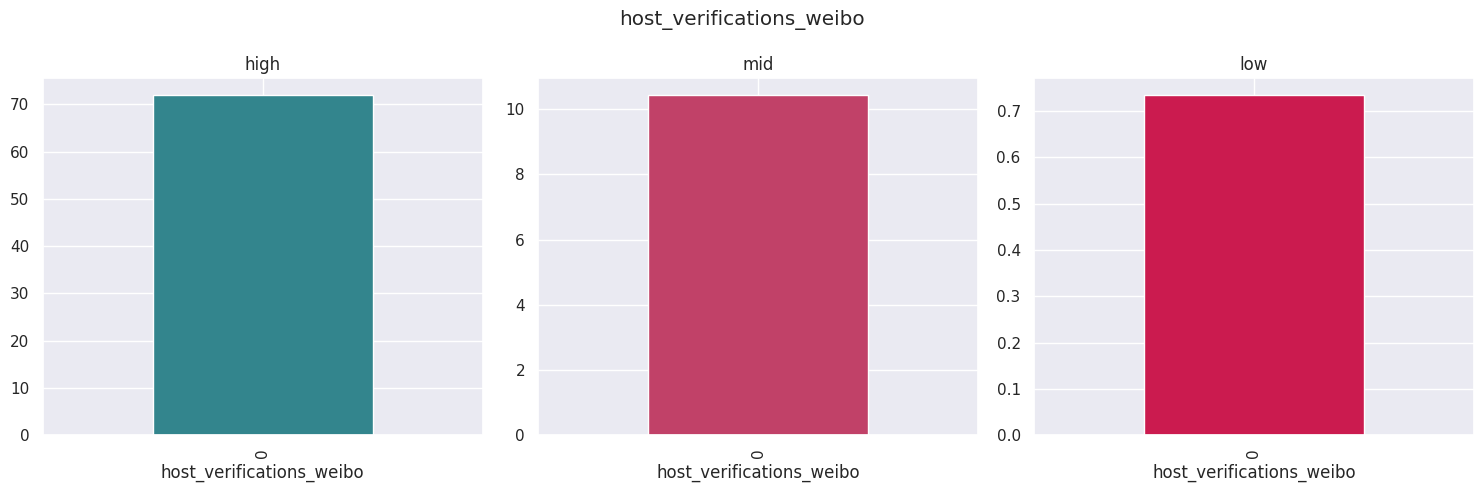

---------------------------------------------------------------------------------------------------------------------


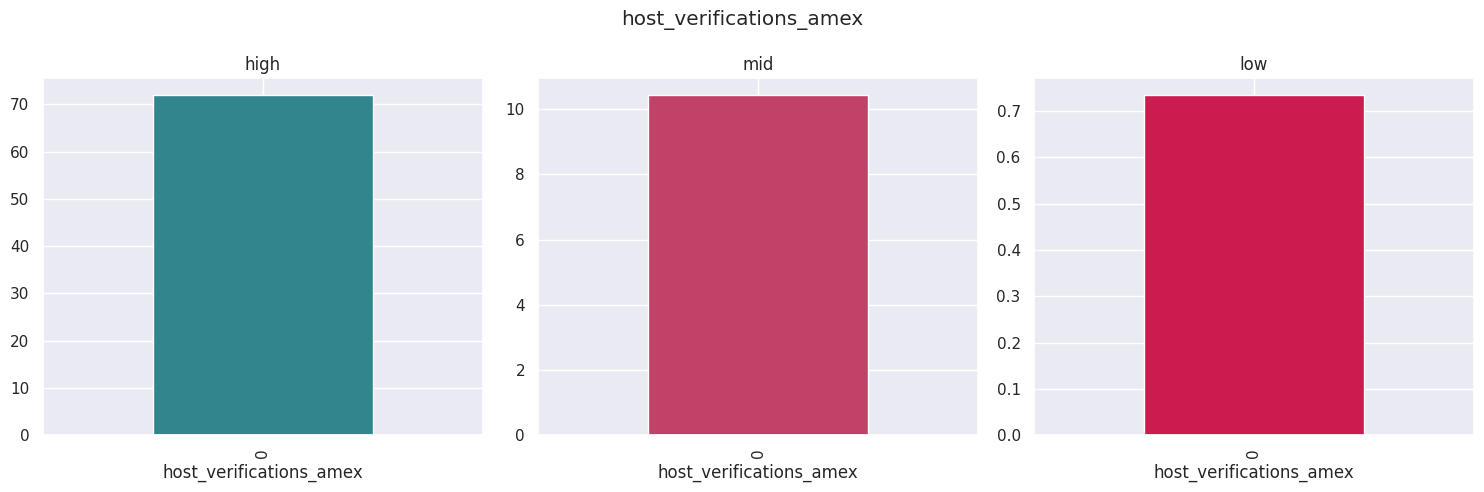

---------------------------------------------------------------------------------------------------------------------


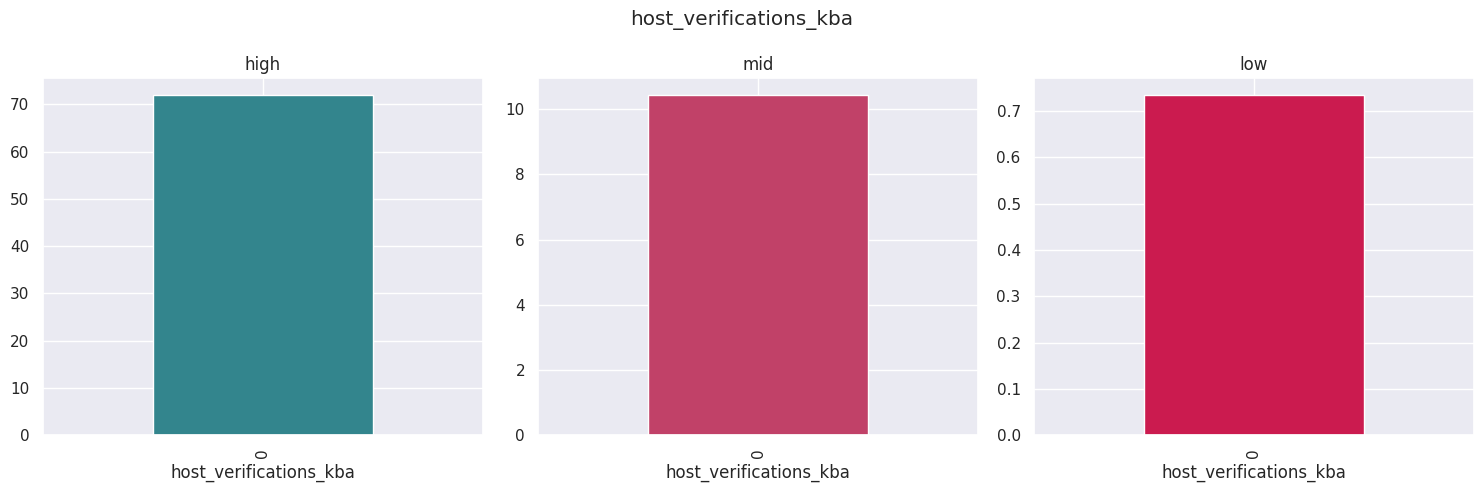

---------------------------------------------------------------------------------------------------------------------


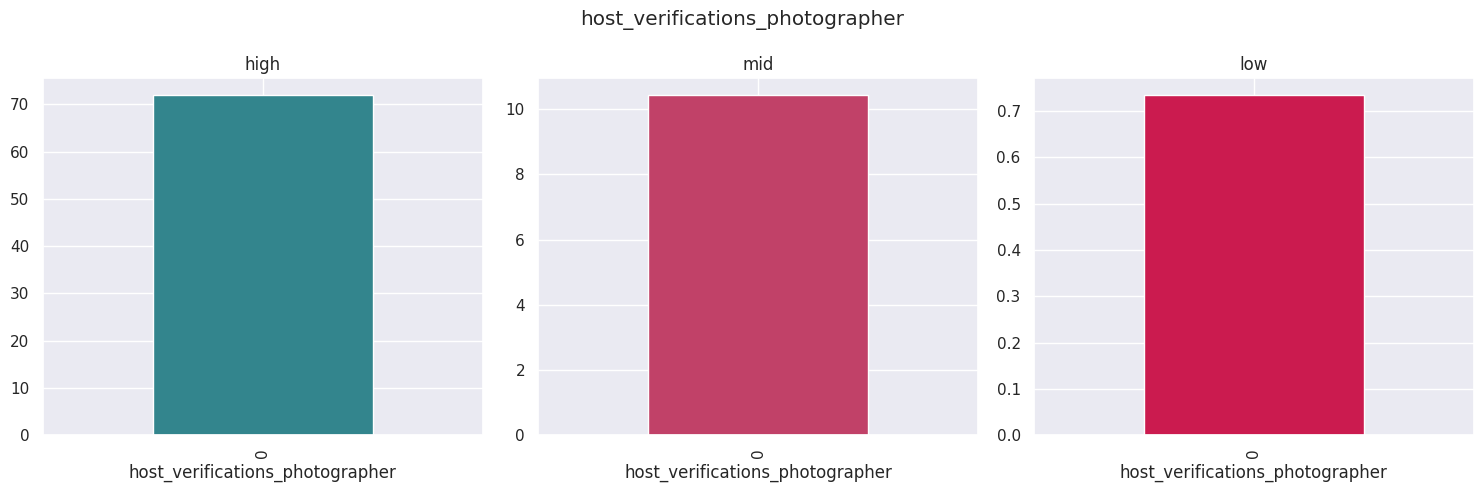

---------------------------------------------------------------------------------------------------------------------


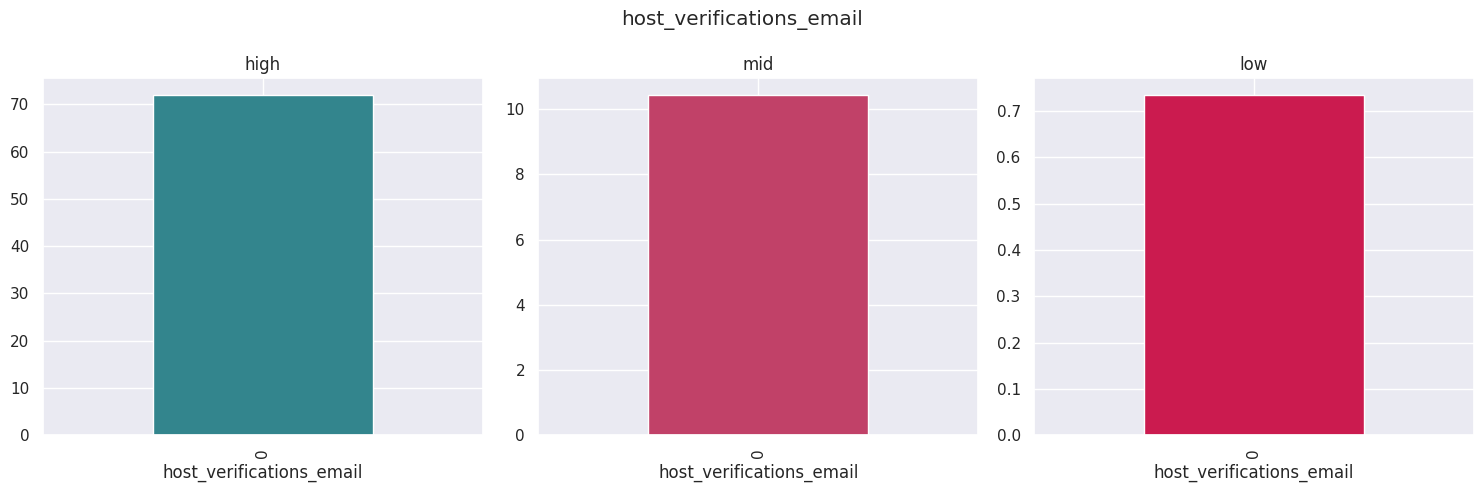

---------------------------------------------------------------------------------------------------------------------


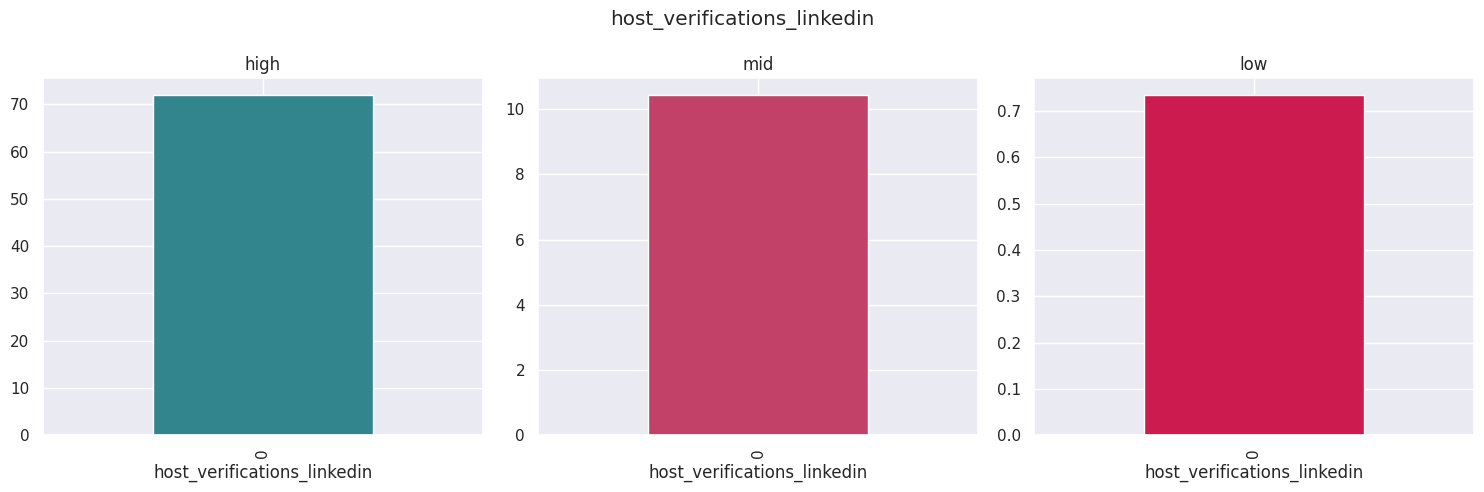

---------------------------------------------------------------------------------------------------------------------


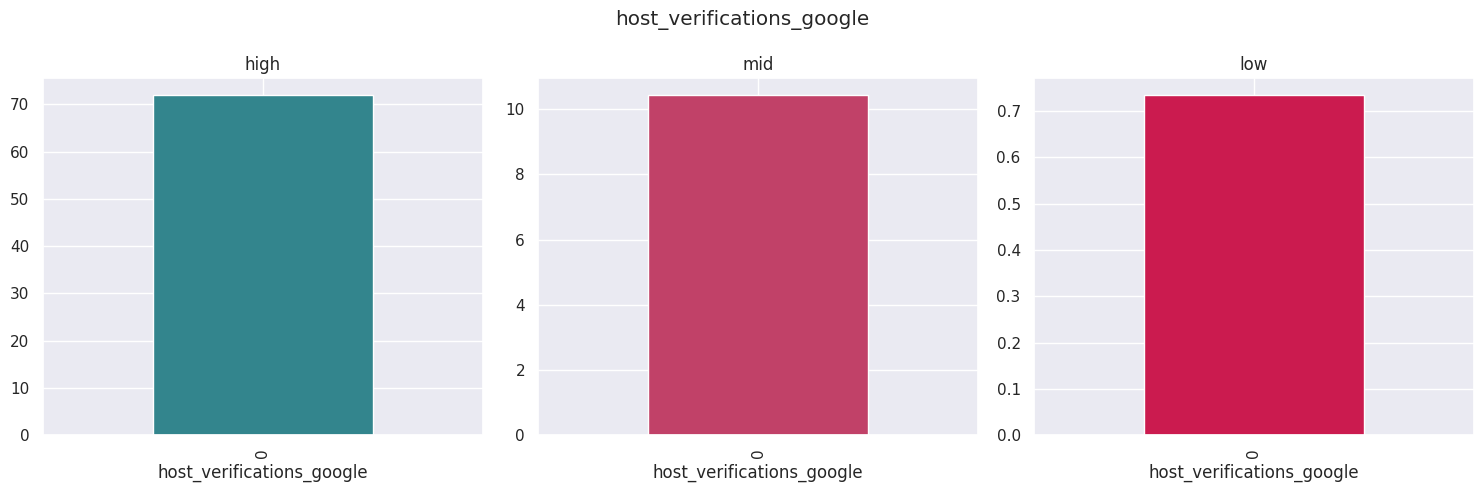

---------------------------------------------------------------------------------------------------------------------


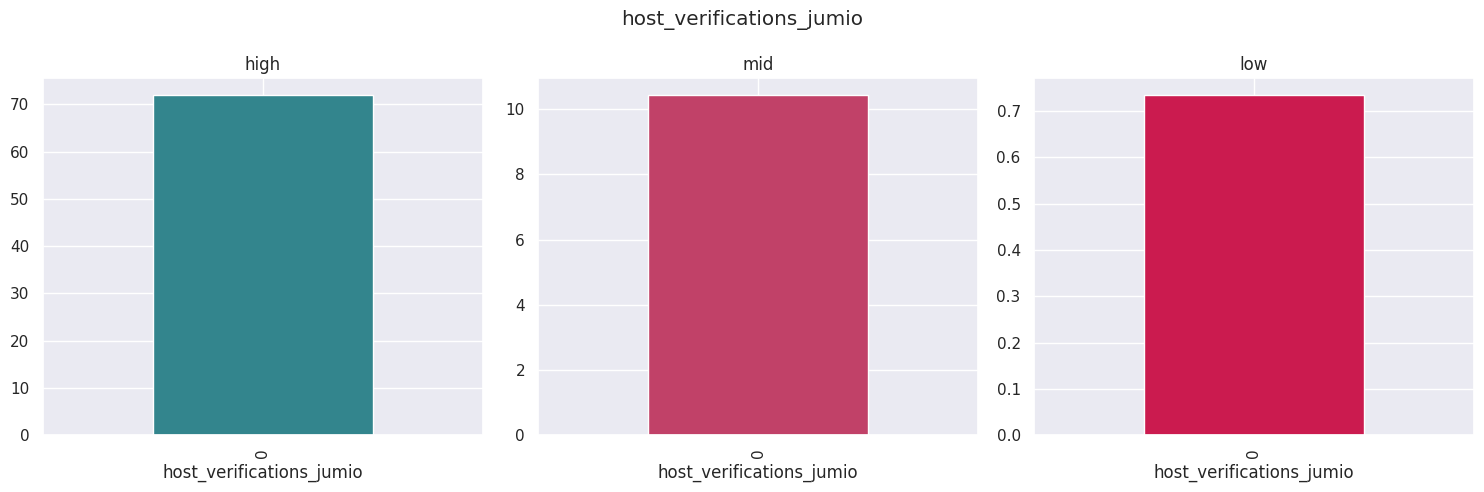

---------------------------------------------------------------------------------------------------------------------


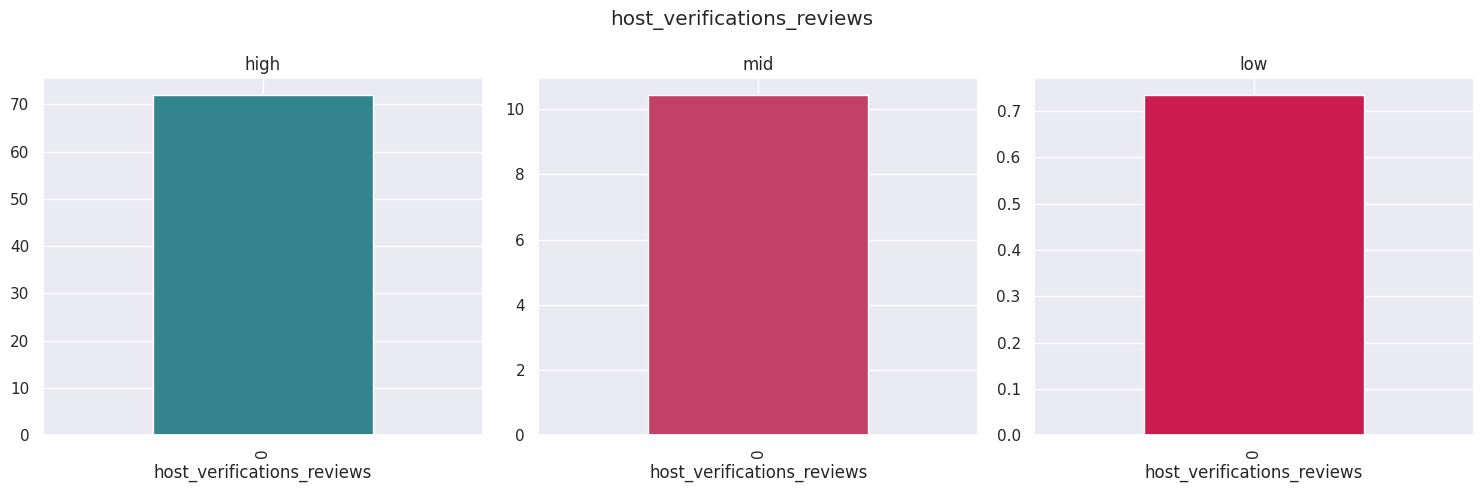

---------------------------------------------------------------------------------------------------------------------


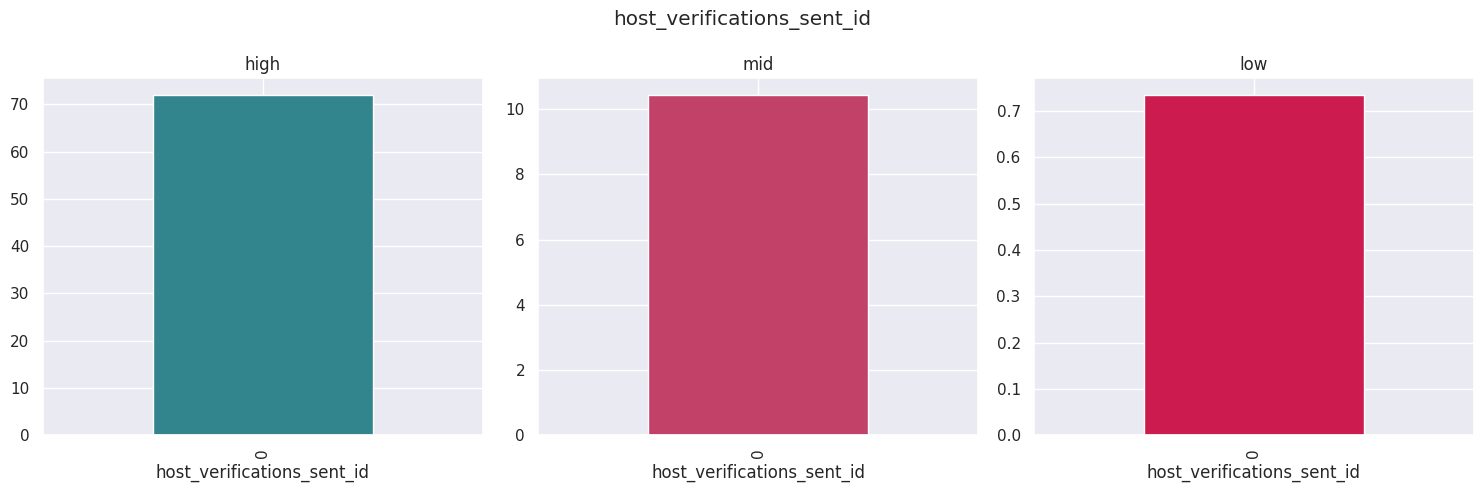

---------------------------------------------------------------------------------------------------------------------


In [ ]:
high_review_scores = df_analysis3[df_analysis3['review_scores_rating'] >= 90]
mid_review_scores = df_analysis3[(df_analysis3['review_scores_rating'] >= 70) & (df_analysis3['review_scores_rating'] < 90)]
low_review_scores = df_analysis3[df_analysis3['review_scores_rating'] < 70]

for cols in allcols:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(cols)

    #high
    data_high = ((high_review_scores.groupby(cols)['review_scores_rating'].count()) / df_analysis3.shape[0]) * 100
    if not data_high.empty:
        colors_high = sns.color_palette("crest", len(data_high))
        data_high.sort_values(ascending=False).plot.bar(ax=axs[0], title='high', color=colors_high)

    # mid
    data_mid = ((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / df_analysis3.shape[0]) * 100
    if not data_mid.empty:
        colors_mid = sns.color_palette("flare", len(data_mid))
        data_mid.sort_values(ascending=False).plot.bar(ax=axs[1], title='mid', color=colors_mid)

    # low
    data_low = ((low_review_scores.groupby(cols)['review_scores_rating'].count()) / df_analysis3.shape[0]) * 100
    if not data_low.empty:
        colors_low = sns.color_palette("rocket", len(data_low))
        data_low.sort_values(ascending=False).plot.bar(ax=axs[2], title='low', color=colors_low)

    plt.tight_layout()
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')

/tmp/ipython-input-110-913758689.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


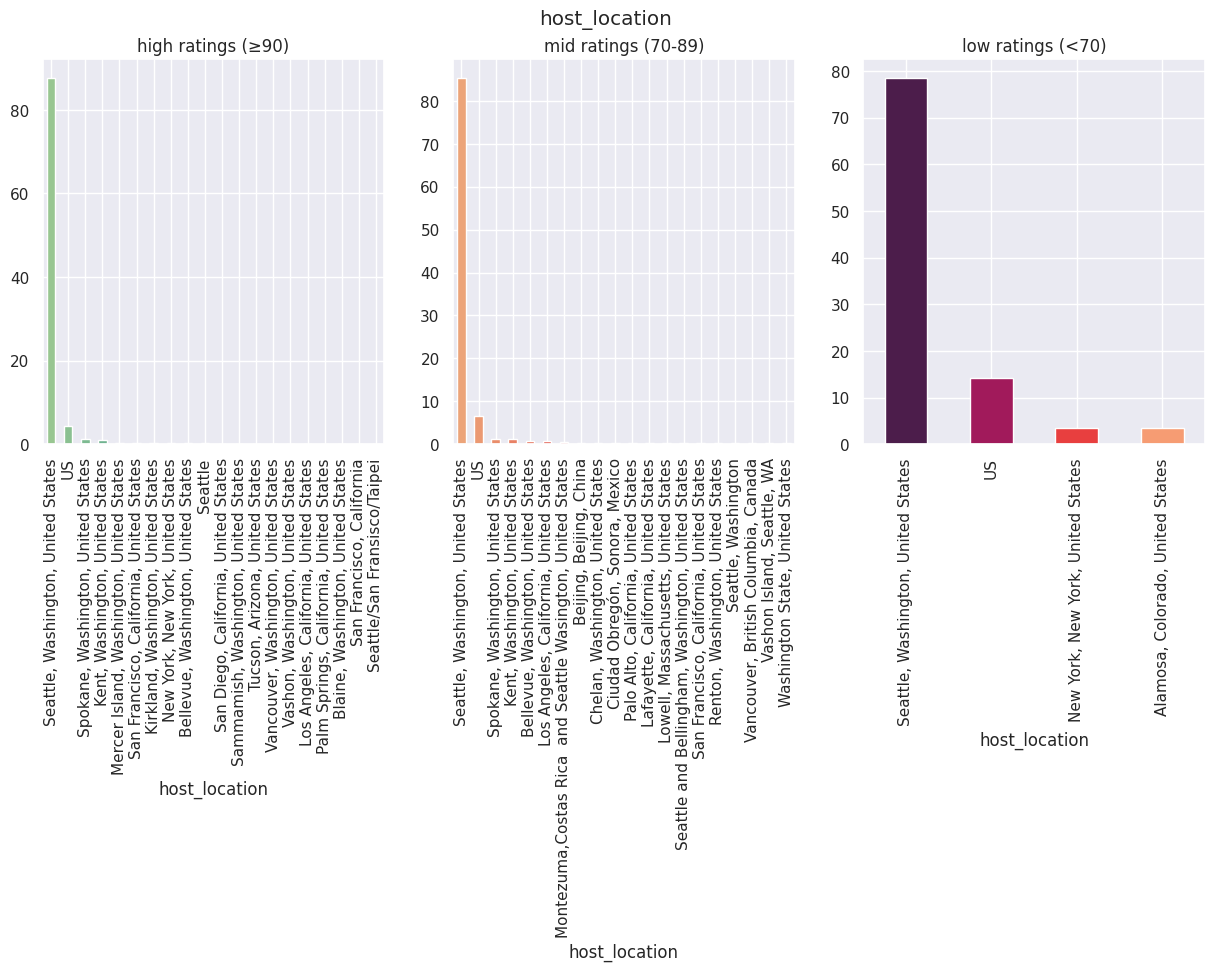

---------------------------------------------------------------------------------------------------------------------



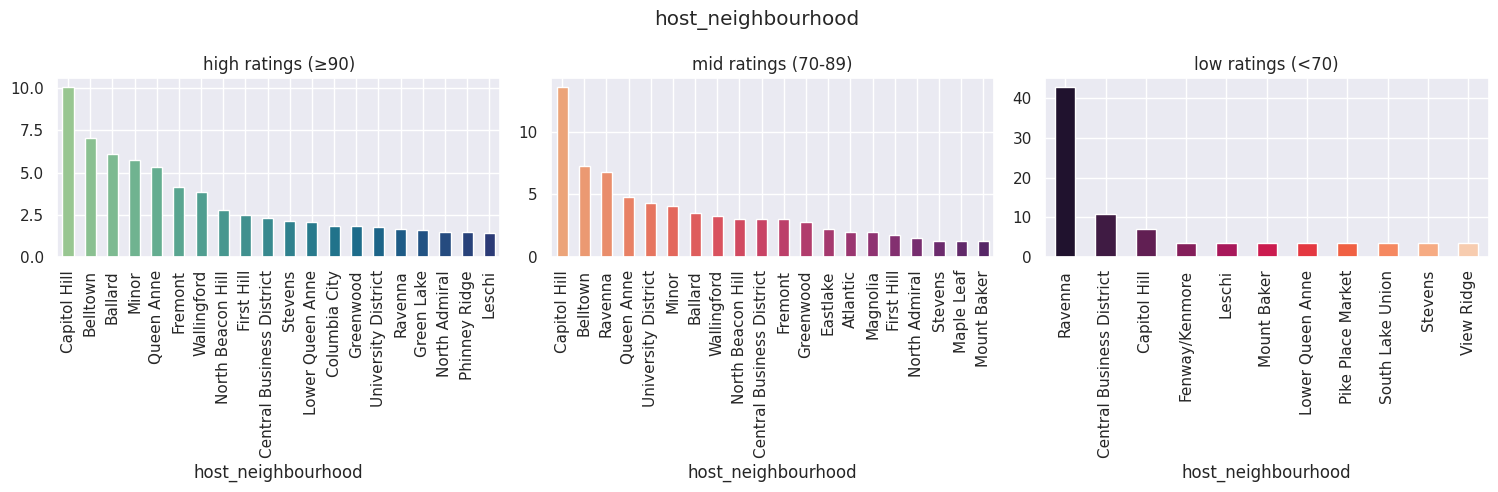

---------------------------------------------------------------------------------------------------------------------



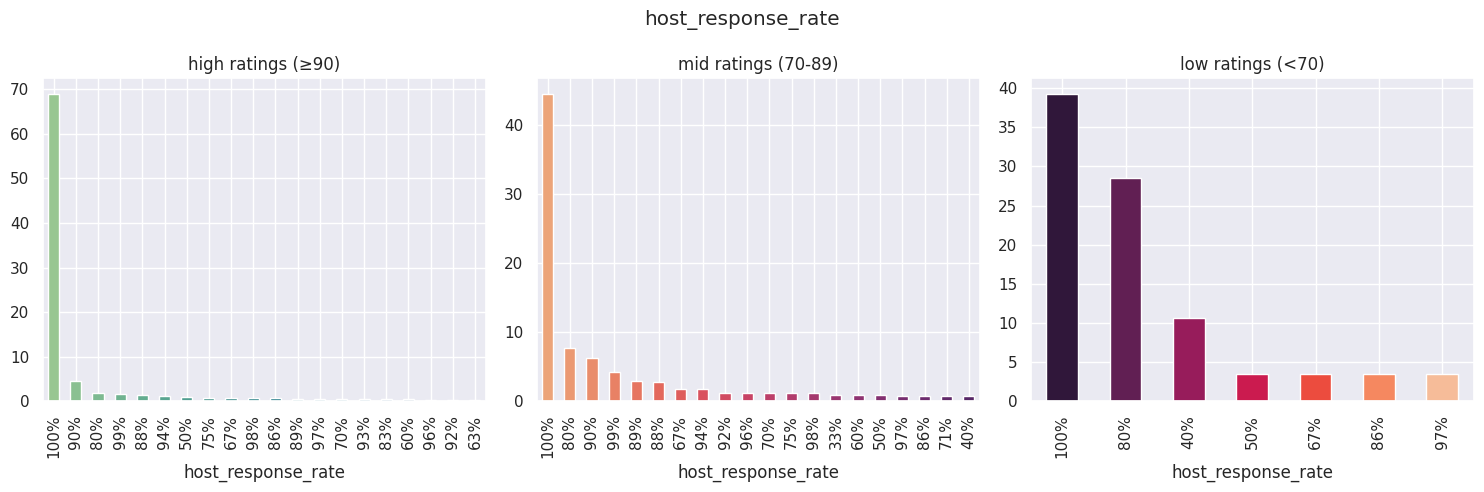

---------------------------------------------------------------------------------------------------------------------



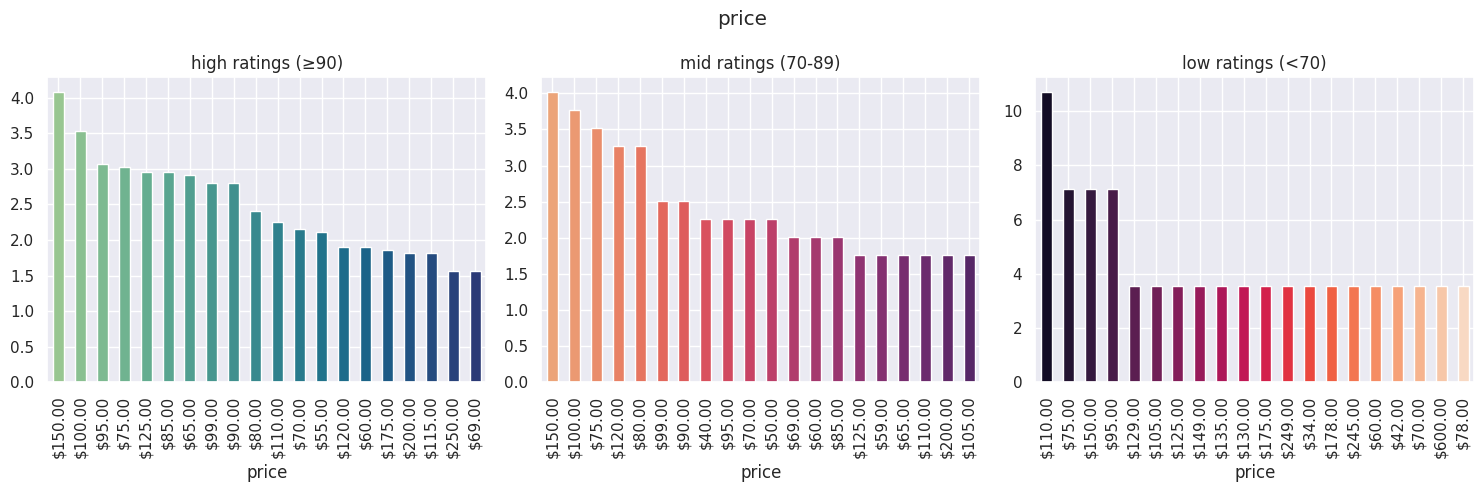

---------------------------------------------------------------------------------------------------------------------



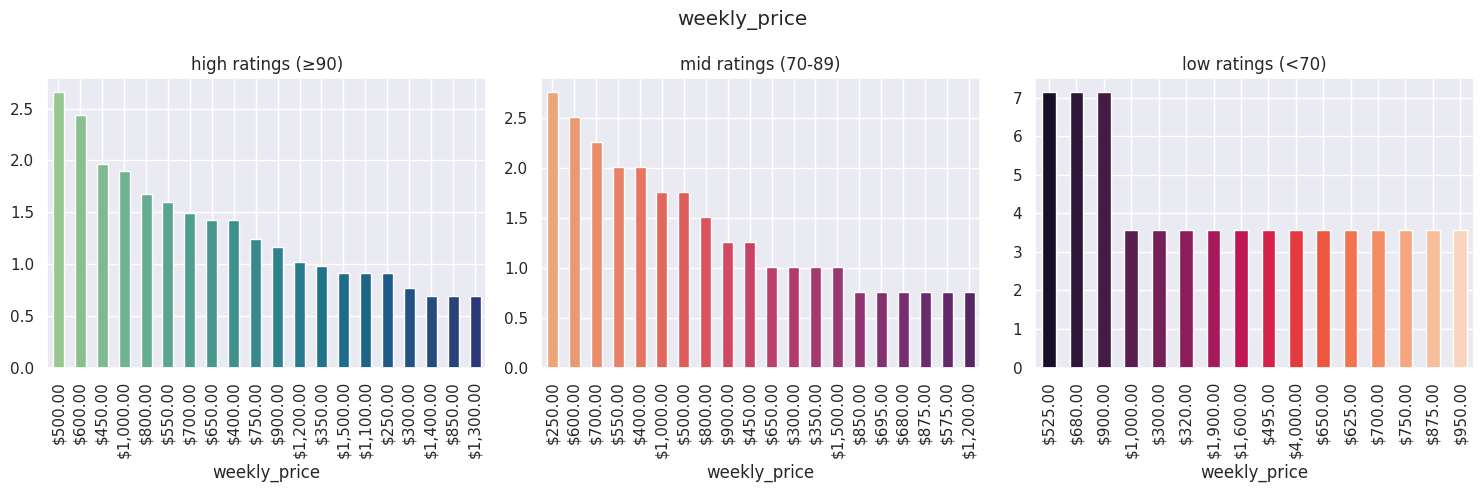

---------------------------------------------------------------------------------------------------------------------



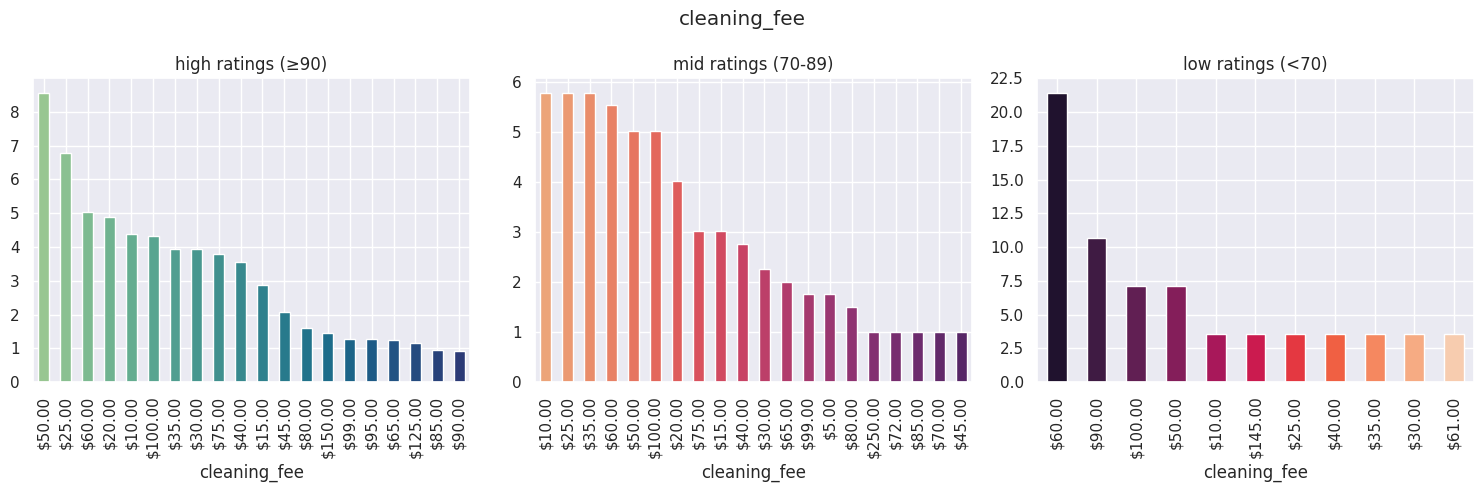

---------------------------------------------------------------------------------------------------------------------



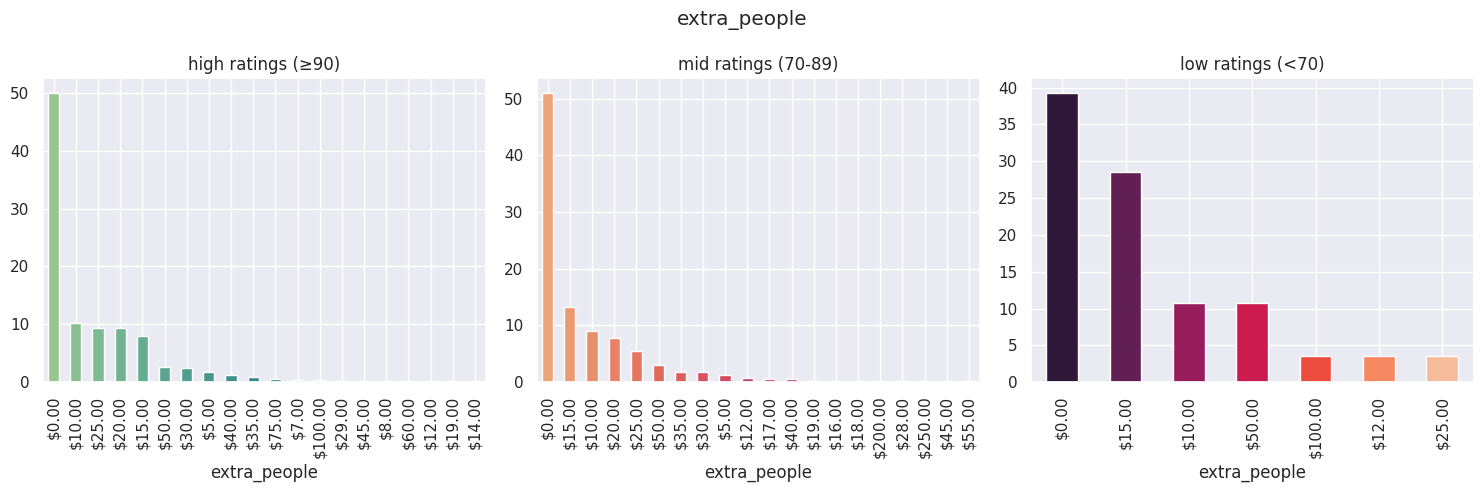

---------------------------------------------------------------------------------------------------------------------



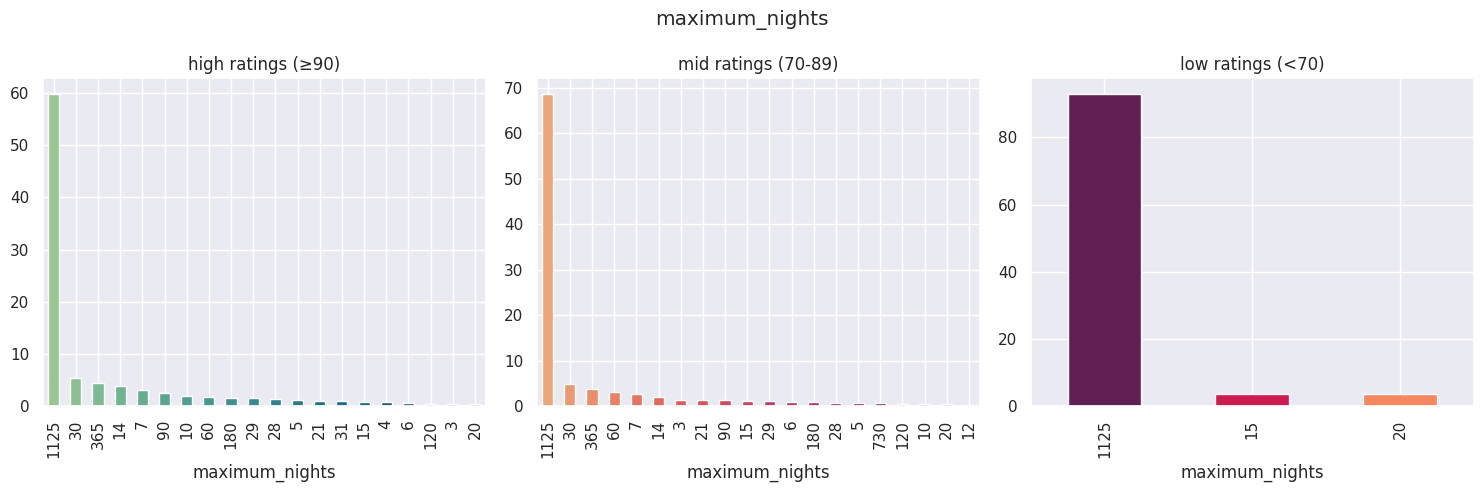

---------------------------------------------------------------------------------------------------------------------



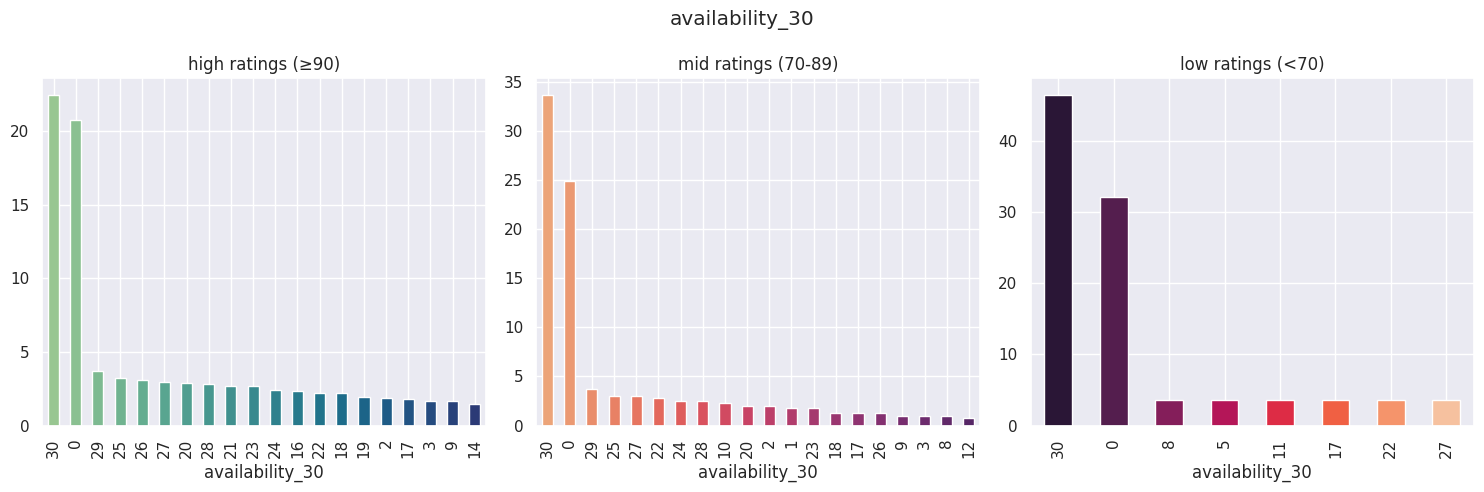

---------------------------------------------------------------------------------------------------------------------



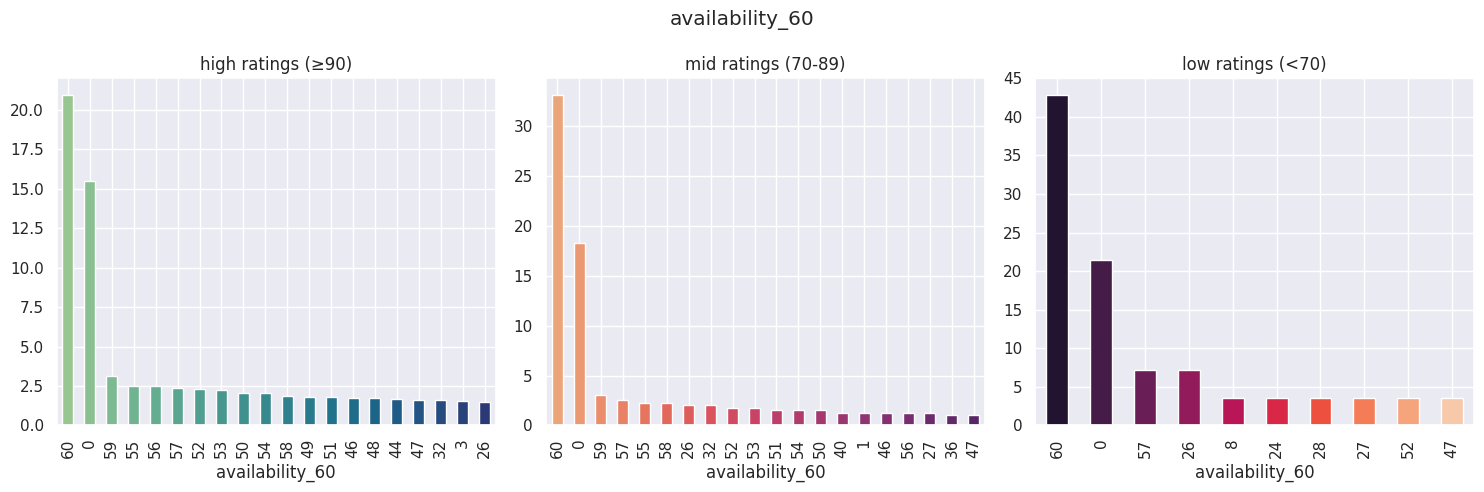

---------------------------------------------------------------------------------------------------------------------



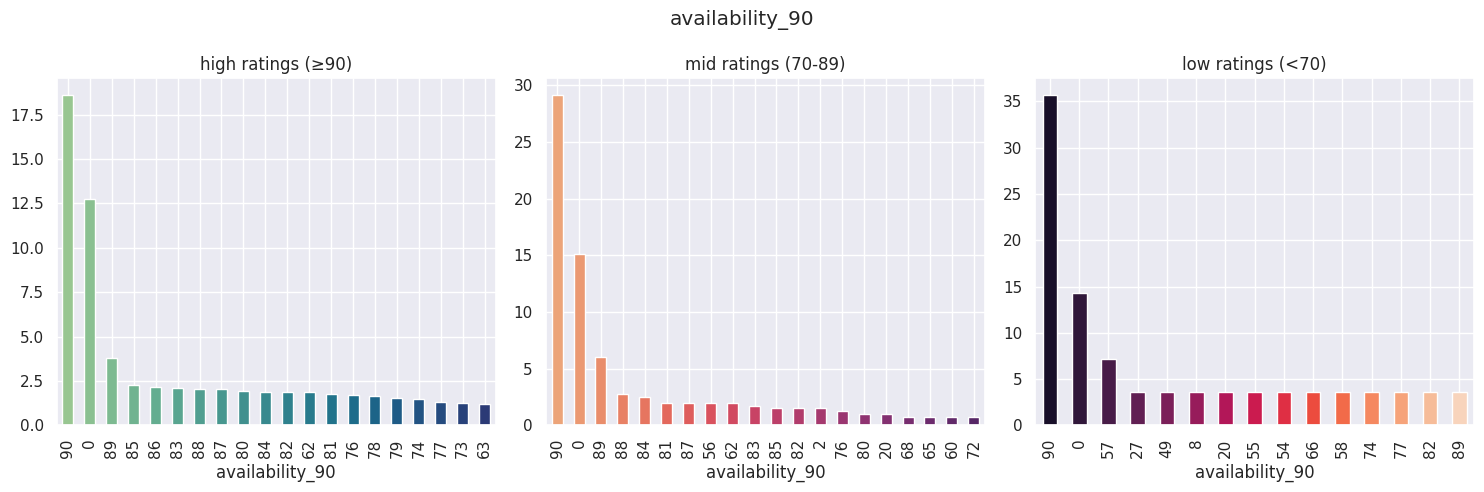

---------------------------------------------------------------------------------------------------------------------



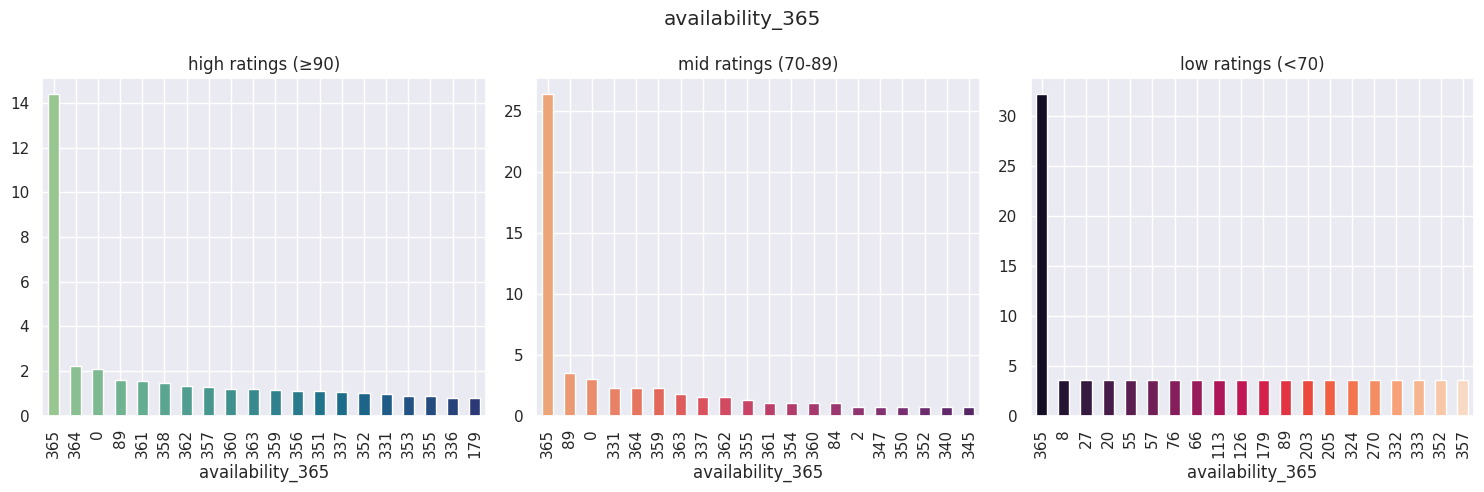

---------------------------------------------------------------------------------------------------------------------



In [ ]:
## creating a separate dataframe for features with messy graphs.
analylis2 = df_analysis.copy(deep=True)
analylis2a = analylis2[[   'host_location',
    'host_neighbourhood',
    'host_response_rate',
    'price',
    'weekly_price',
    'cleaning_fee',
    'extra_people',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]]

analylis2a_cols = analylis2a.columns

for cols in analylis2a_cols:
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle(cols)

    # high ratings
    high_data = (((high_review_scores.groupby(cols)['review_scores_rating'].count()) / high_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    high_colors = sns.color_palette("crest", len(high_data))
    high_data.plot.bar(ax=axs[0], color=high_colors)
    axs[0].set_title('high ratings (≥90)')

    # mid ratings
    mid_data = (((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / mid_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    mid_colors = sns.color_palette("flare", len(mid_data))
    mid_data.plot.bar(ax=axs[1], color=mid_colors)
    axs[1].set_title('mid ratings (70-89)')

    # low ratings
    low_data = (((low_review_scores.groupby(cols)['review_scores_rating'].count()) / low_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    low_colors = sns.color_palette("rocket", len(low_data))
    low_data.plot.bar(ax=axs[2], color=low_colors)
    axs[2].set_title('low ratings (<70)')

    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')
    print()

### Evaluation and analysis of the graphs of the important characterstics and trends found in the dataset


We divided the data into three categories based on their review score categories:

**high_review_scores:** Consisted of data points which had a rating of 90 and above.  
**mid_review_scores:** Consisted of data points which had a rating between 70 and 90.  
**low_review_scores:** Consisted of data points which had a rating below 70.  

**The intention is to determine how the trends within the features vary between each categories. It would allow us to understand which features play a determining role in emabling the airBnB to get a higher rating.**


**host_response_time:**  
While the trends largely remain same within all the three datasets, we find that the majority of data points with high_review_scores not only responded within an hour but also the incidence of data points which responded 'within a few hours' and 'within a day' is far lesser when compared to datapoints having a average and lower rating score.

**host_is_superhost:**  
The only category that consisted of a sizable number pf superhosts(~25%) were that of high_review_scores. The remaining datasets and a neglible number of superhosts. This shows that if a host falls within the superhost category, it has a chance of getting a high review score in compariesion to other hosts.

We can built on this observation and determine what are the characterstics that differenciate between superhosts and hosts.

**host_identity_verified:**  
The dataset of high_review_scores had a far greater number of hosts with verified identies and a much lower incidence of hosts with unverified ids in comparision to other datasets which had a far greater percentage of unverified hosts.

This allows us to conclude that a verified identification contributes to a higher score rating.


**neighbourhood_group_cleansed:**  
AirBnBs with a higher score rating were found within the 'Downtown neighbourhood' followed by 'Capital Hill'. We find that average_review_scores consisted of both these neighbourhoods in their top two categories.

This shows that the ideal neighbourhood for the AirBnB to be located in is Downtown followed by Capital Hill.

**is_location_exact:**  
A lower percentage(< 10%) of high_review_scores had inexact locations in comparision to other categories.

Hosts should therefore focus on ensuring that their location mentioned is exact to increase the likelihood of getting a better rating.

**property_type:**  
AirBnBs with the highest score ratings were largely 'Houses' followed by 'Apartments', while the remaings AirBnBs with a lower scores were laregly Apartments followed by Houses.

A property type admittidly does play a role in score rating however its role isn't of much signifance as long as the property type is either a 'House or Apartment. Having other types of properties such as a Townhouse, Loft, Dorm has a far greater chance of contributing to a lower rating score.

**room_type:**  
The trends between all the three datasets are largely the same however they do show that an Entire home/apt is favoured greatly by renters in comparision to other types of rooms.

Host should therefore consider renting out entire homes and apartments rather than opting to rent out a private room or worse - a shared room.

**accommodates:**  
Rooms should ideally accomdate 2 - 4 people. This would enable the airBnB to have a higher score rating.

**Other considerations:**  
- bedtype should be a real bed.
- guests_included: Average of 1 -2 guests can be included.
- review_scores_cleanliness: Clean BnBs play a contributing role in higher scores.
- review_scores_communication: Good communication is impertive to obtain a higher rating.
- review_scores_location: Location as mentioed earlier plays a significant role in a higher rating.
- minimum_nights: The AirBnBs with a higher score rating largely offered a minimum number of 2 nights(~42%) followed by a single night. Hosts should consider keeping this feature in mind when they are booking AirBnBs.


### amenities characteristics

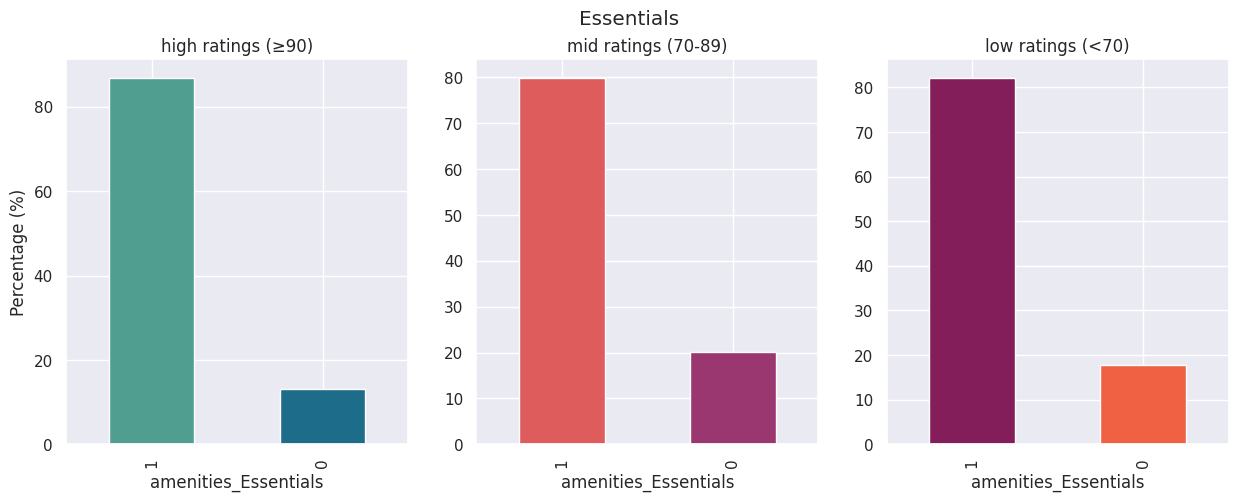

---------------------------------------------------------------------------------------------------------------------



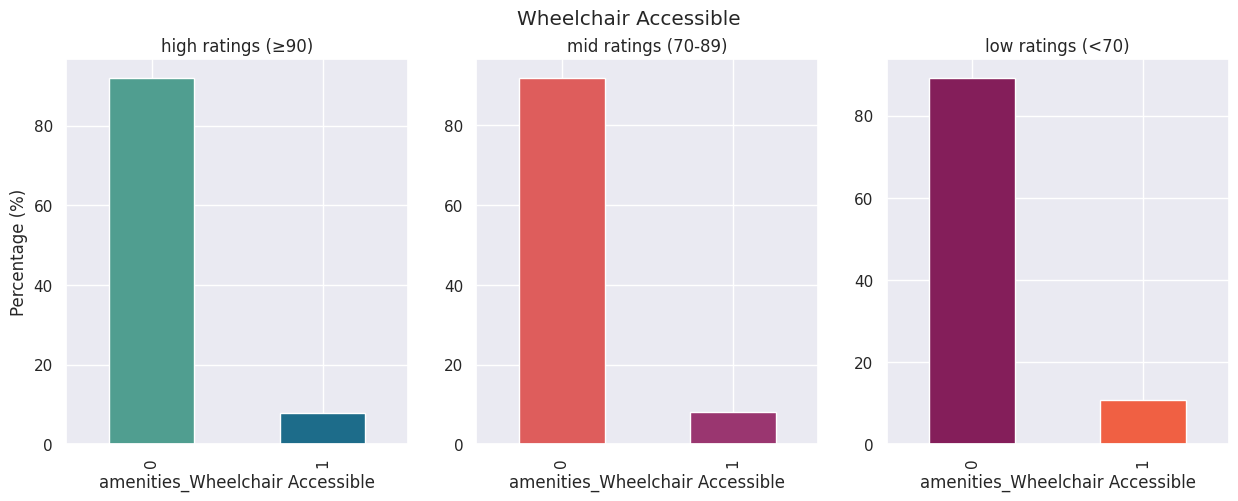

---------------------------------------------------------------------------------------------------------------------



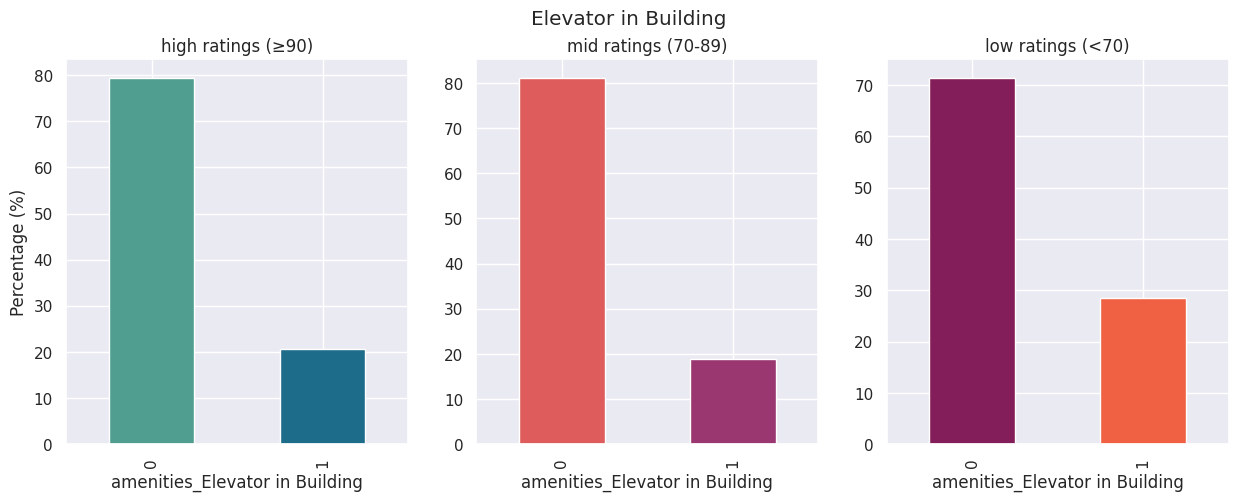

---------------------------------------------------------------------------------------------------------------------



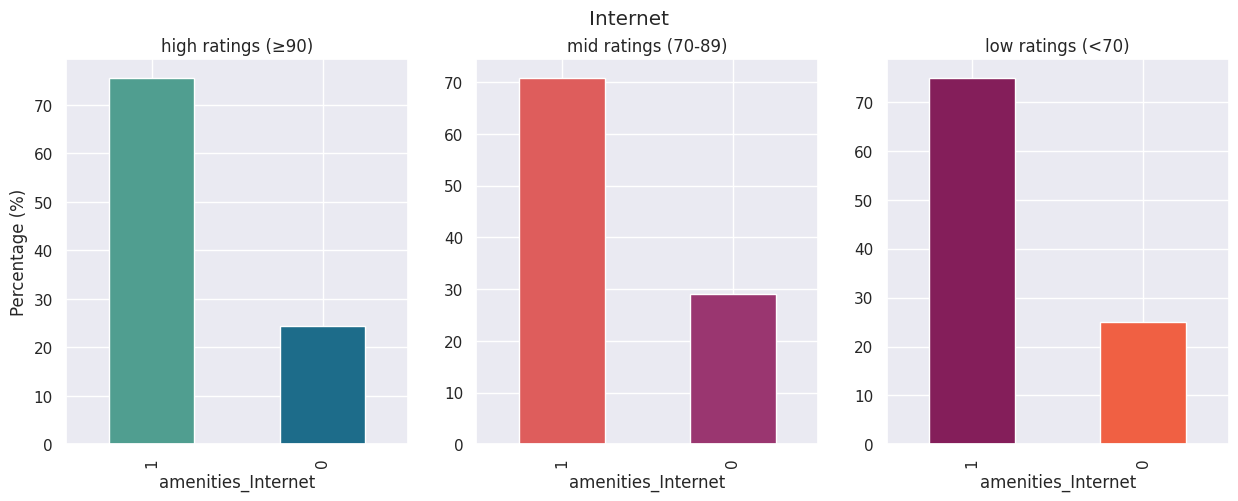

---------------------------------------------------------------------------------------------------------------------



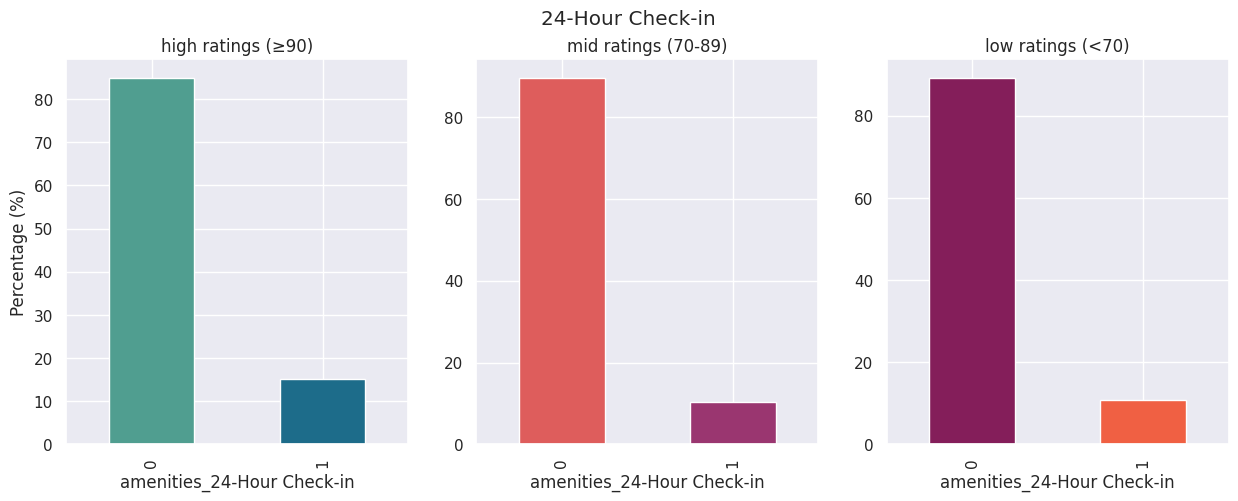

---------------------------------------------------------------------------------------------------------------------



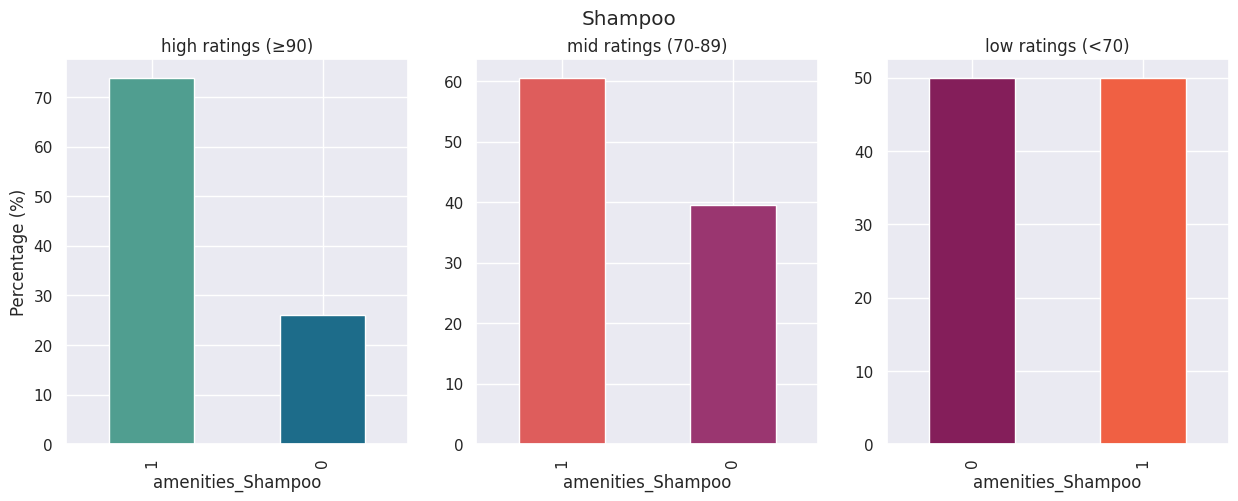

---------------------------------------------------------------------------------------------------------------------



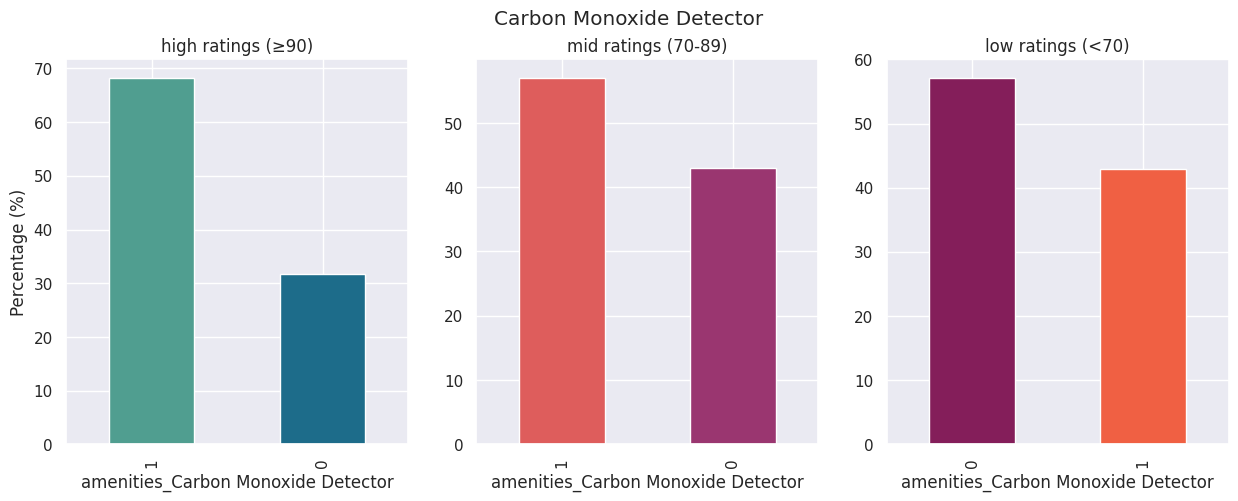

---------------------------------------------------------------------------------------------------------------------



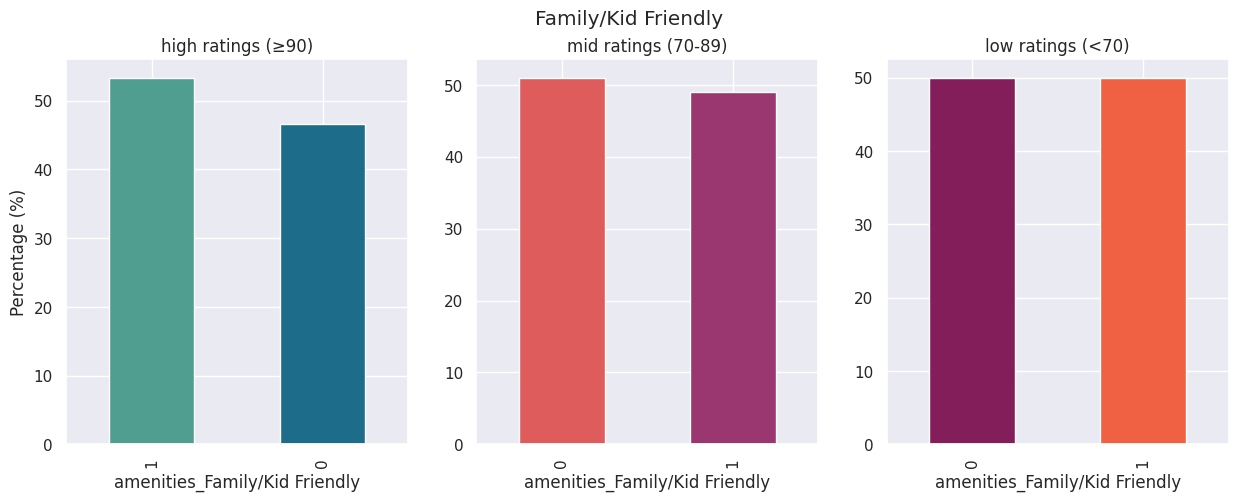

---------------------------------------------------------------------------------------------------------------------



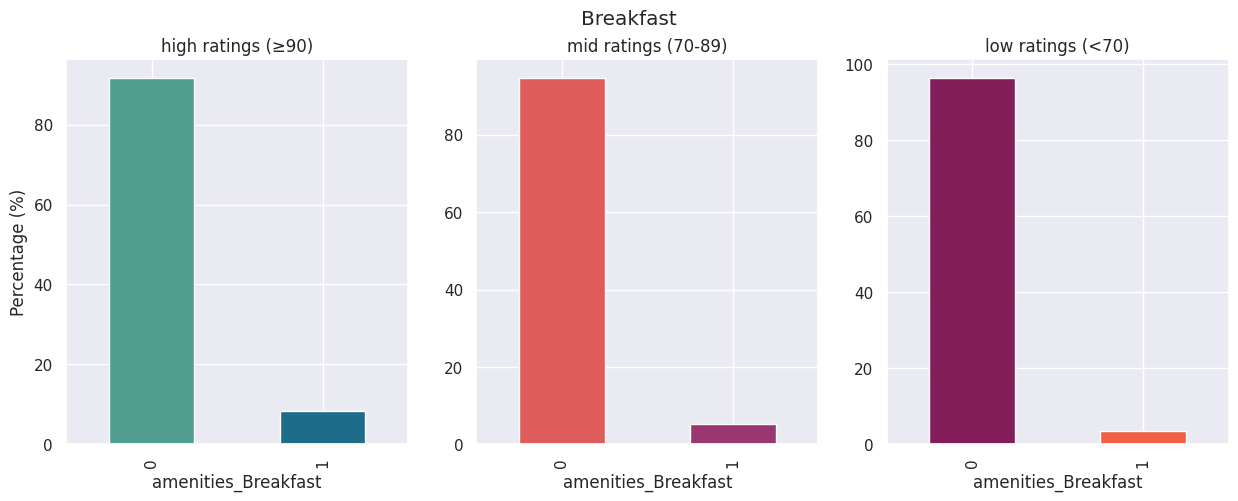

---------------------------------------------------------------------------------------------------------------------



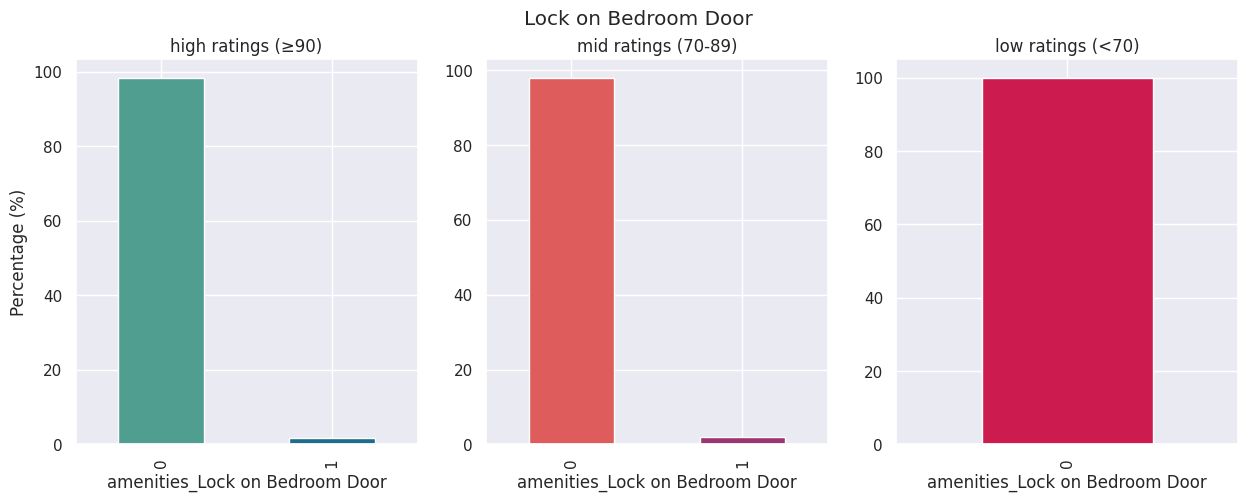

---------------------------------------------------------------------------------------------------------------------



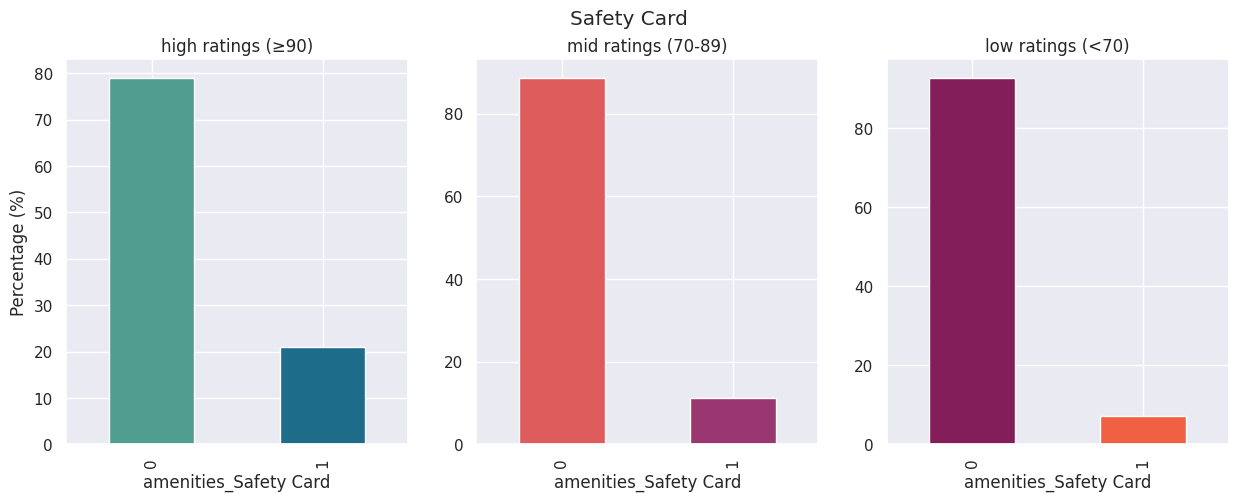

---------------------------------------------------------------------------------------------------------------------



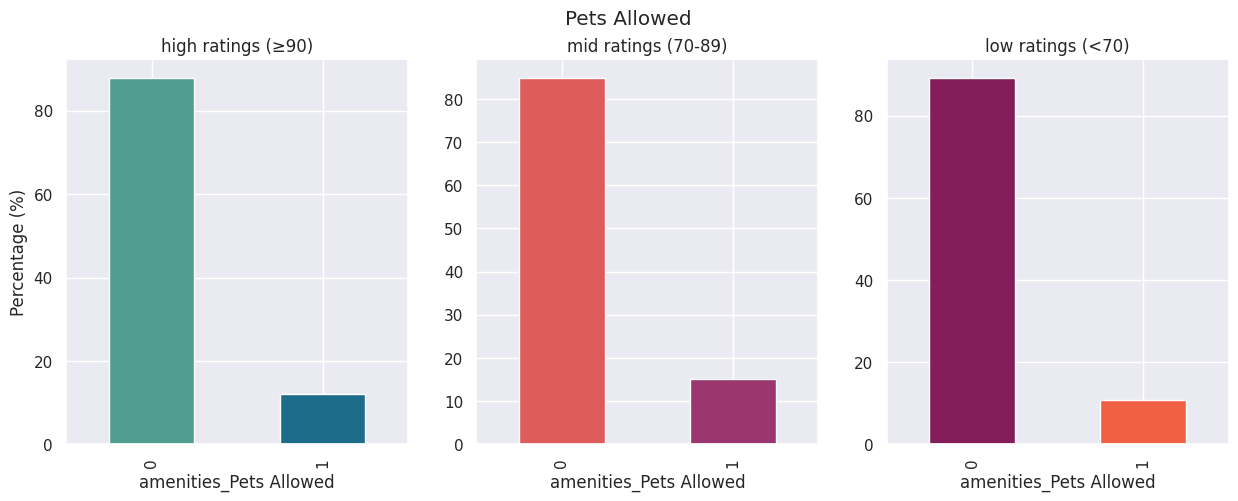

---------------------------------------------------------------------------------------------------------------------



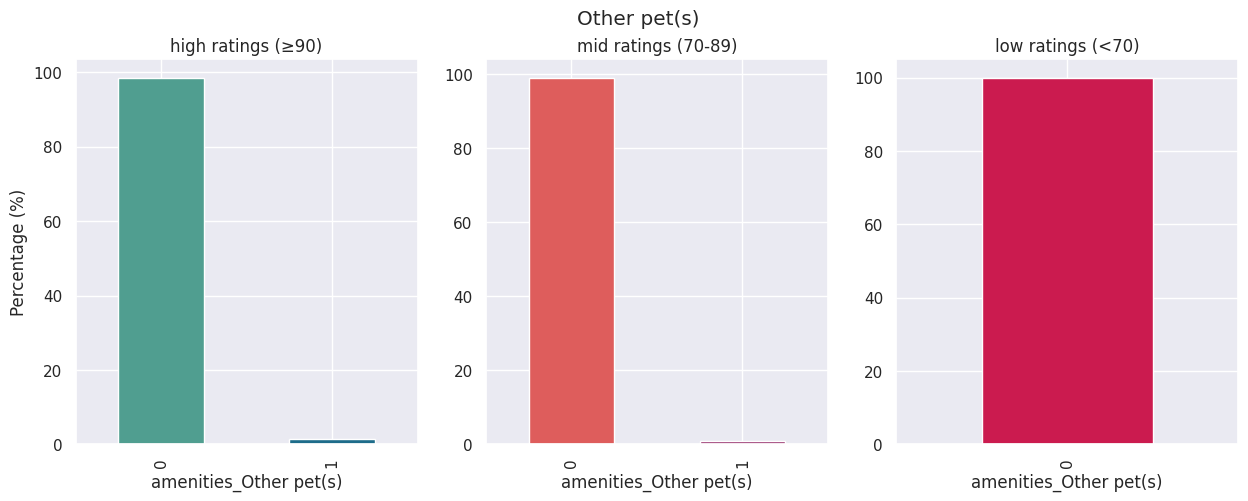

---------------------------------------------------------------------------------------------------------------------



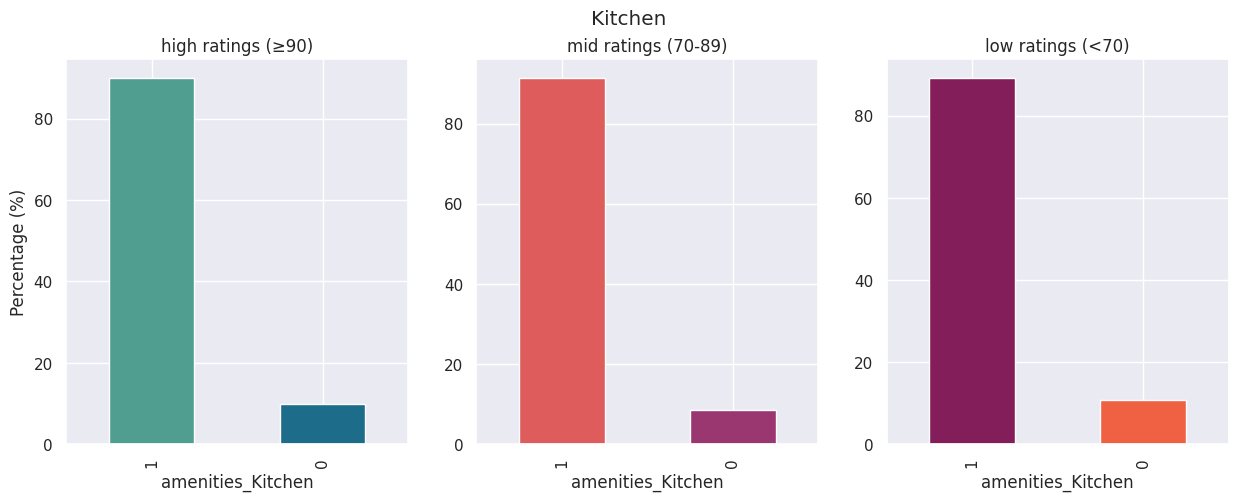

---------------------------------------------------------------------------------------------------------------------



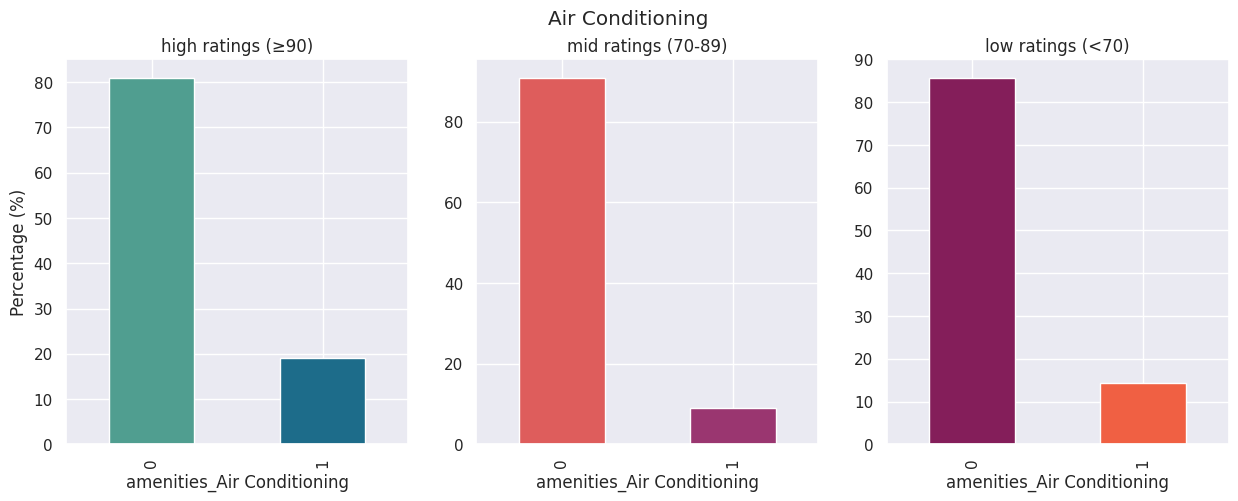

---------------------------------------------------------------------------------------------------------------------



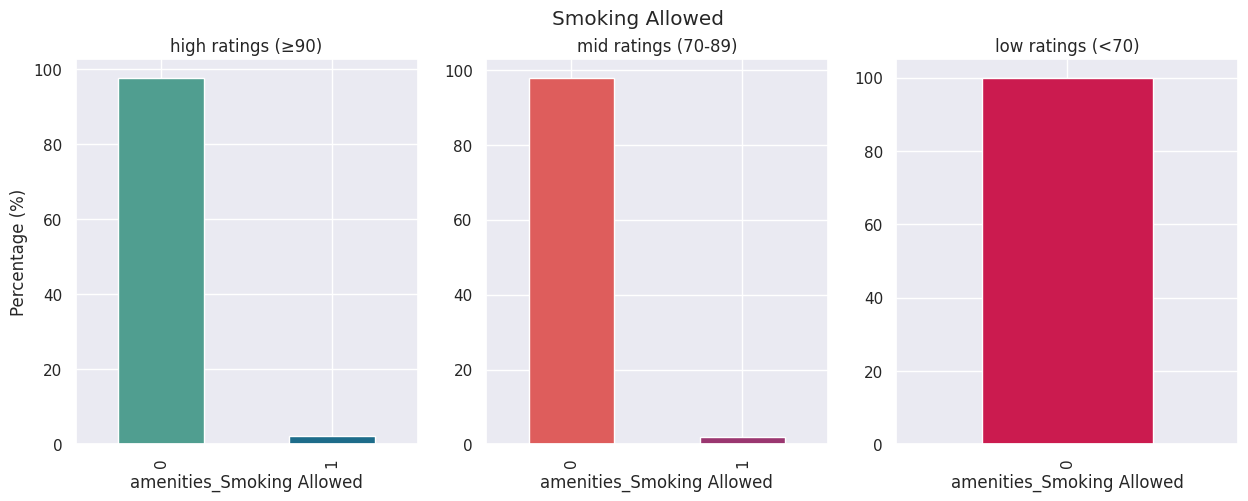

---------------------------------------------------------------------------------------------------------------------



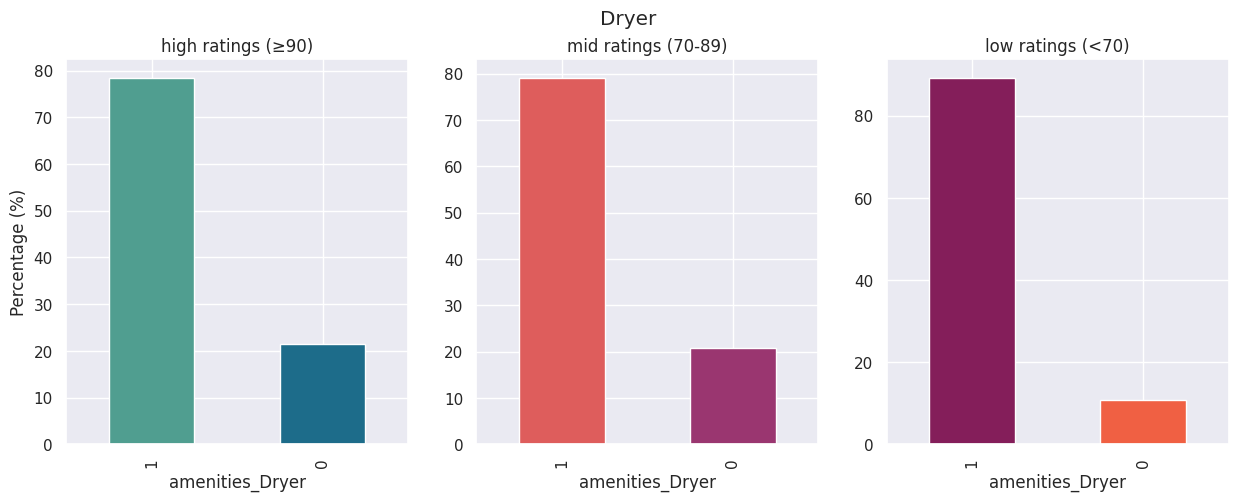

---------------------------------------------------------------------------------------------------------------------



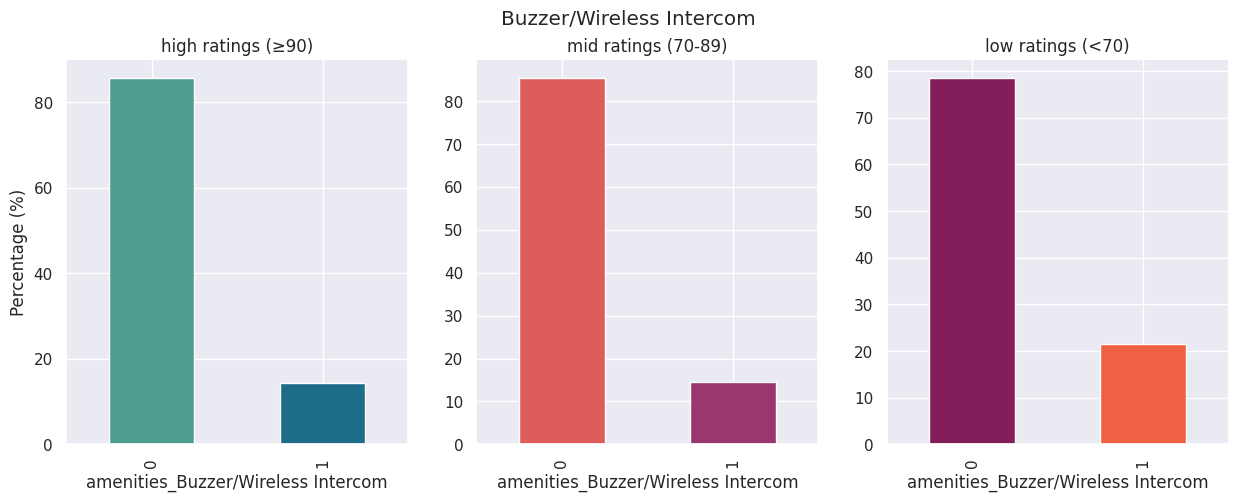

---------------------------------------------------------------------------------------------------------------------



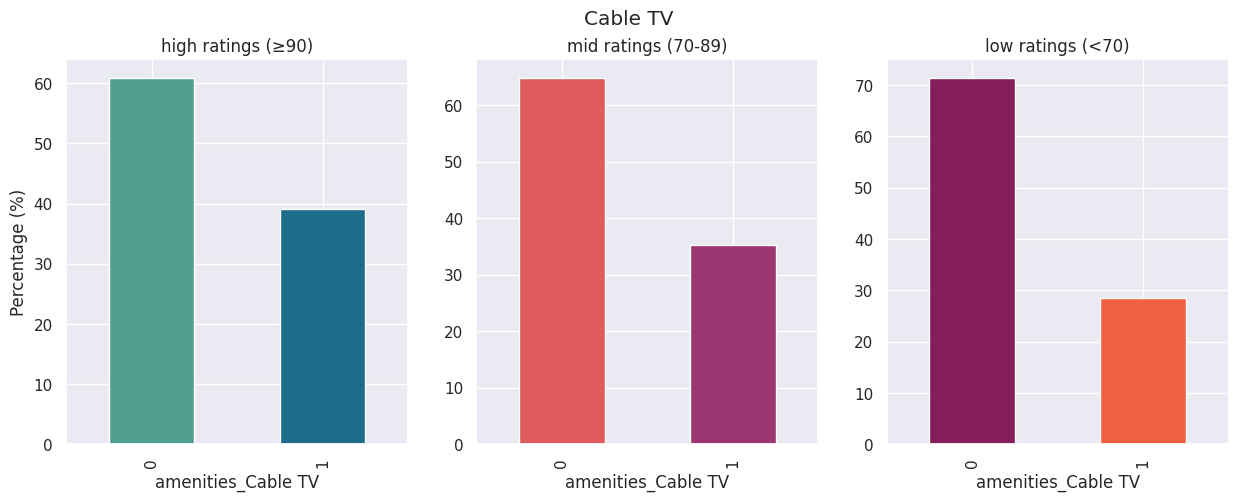

---------------------------------------------------------------------------------------------------------------------



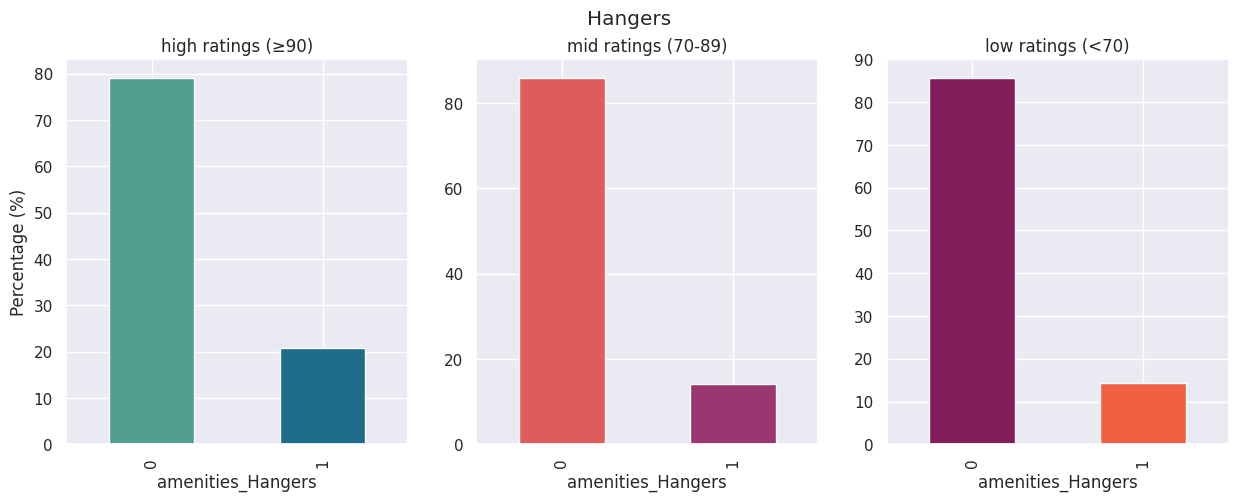

---------------------------------------------------------------------------------------------------------------------



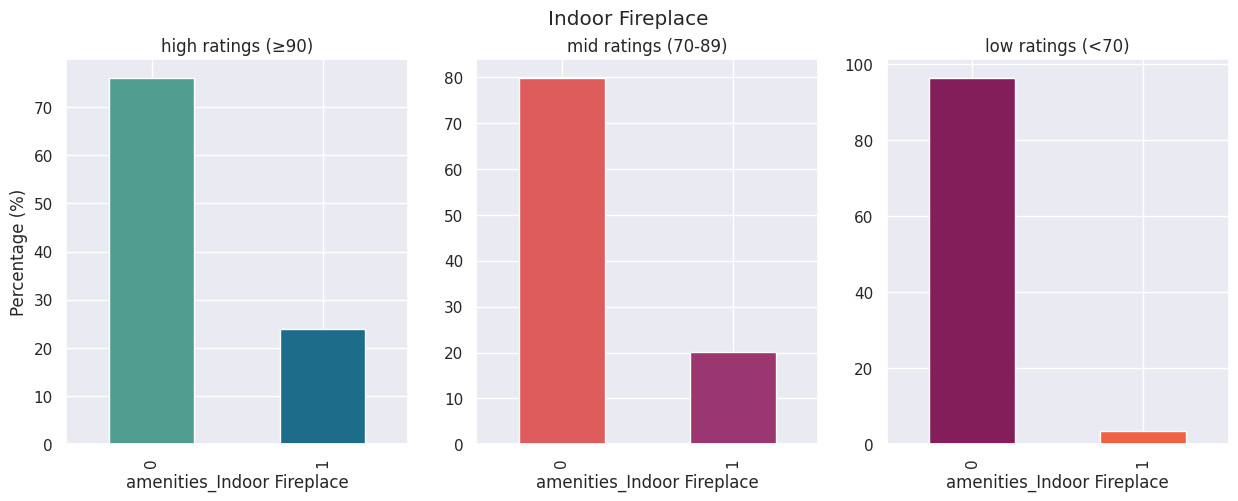

---------------------------------------------------------------------------------------------------------------------



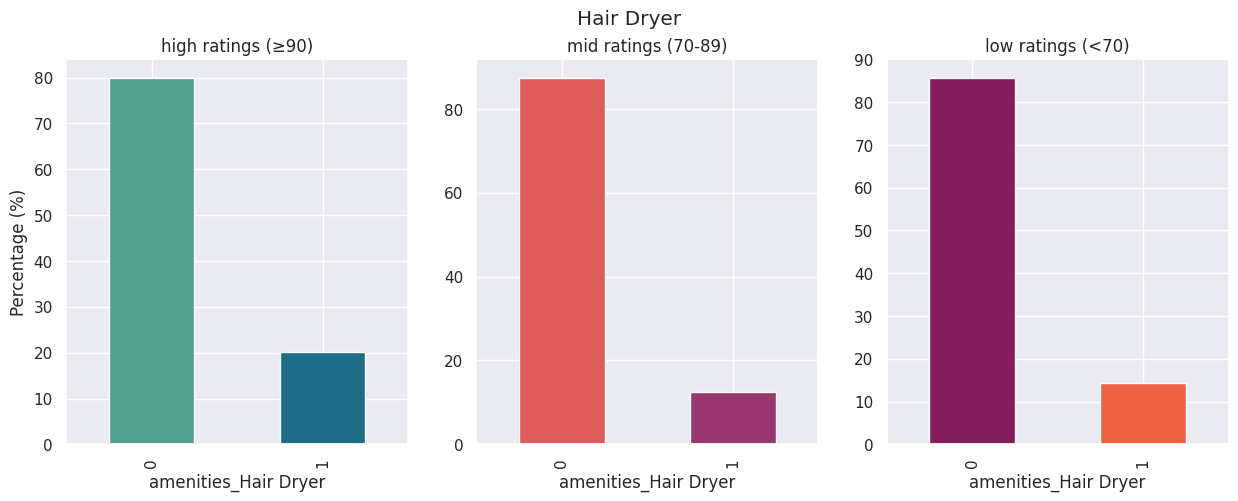

---------------------------------------------------------------------------------------------------------------------



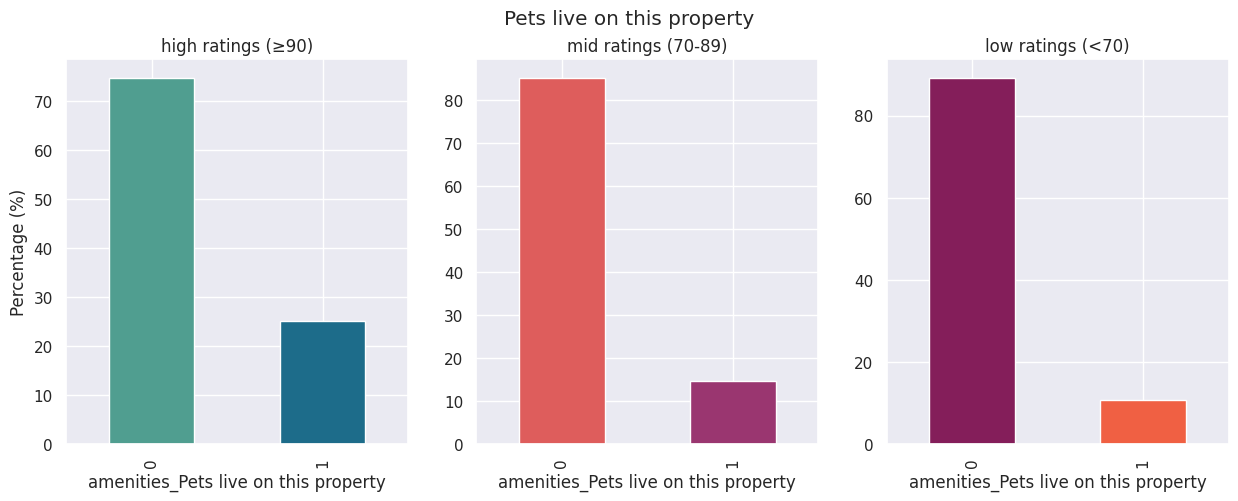

---------------------------------------------------------------------------------------------------------------------



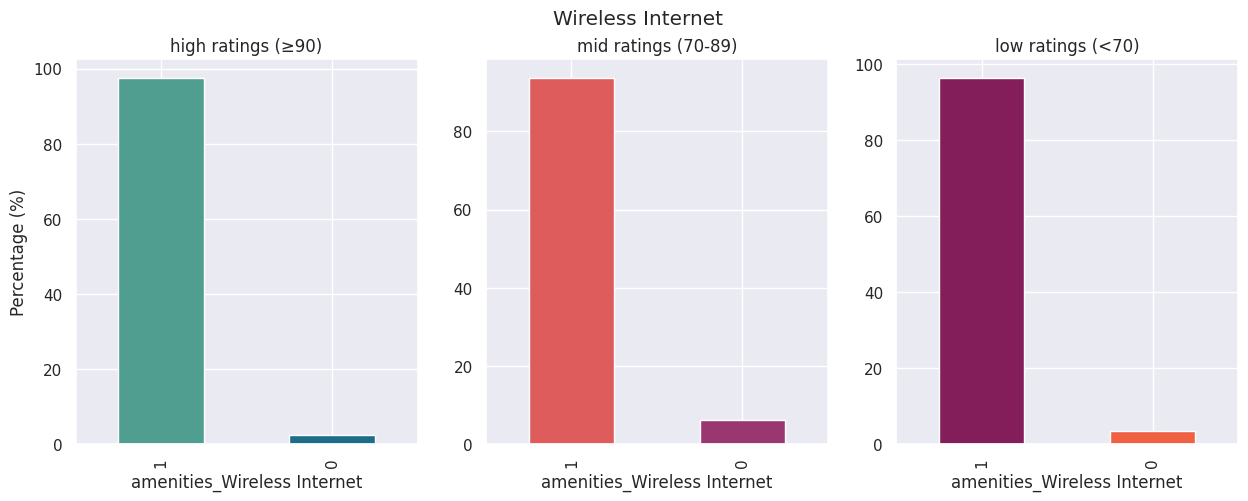

---------------------------------------------------------------------------------------------------------------------



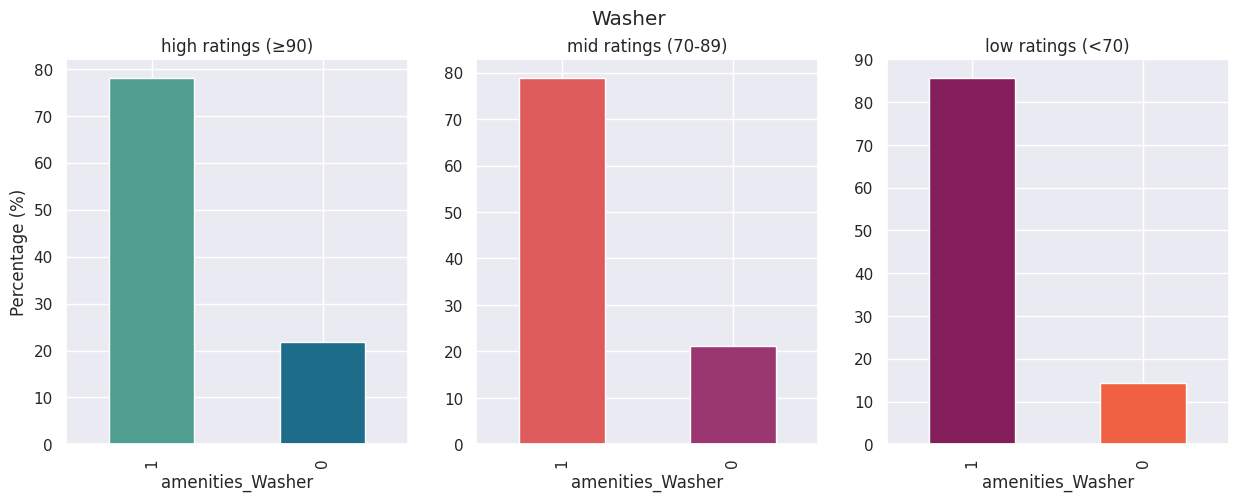

---------------------------------------------------------------------------------------------------------------------



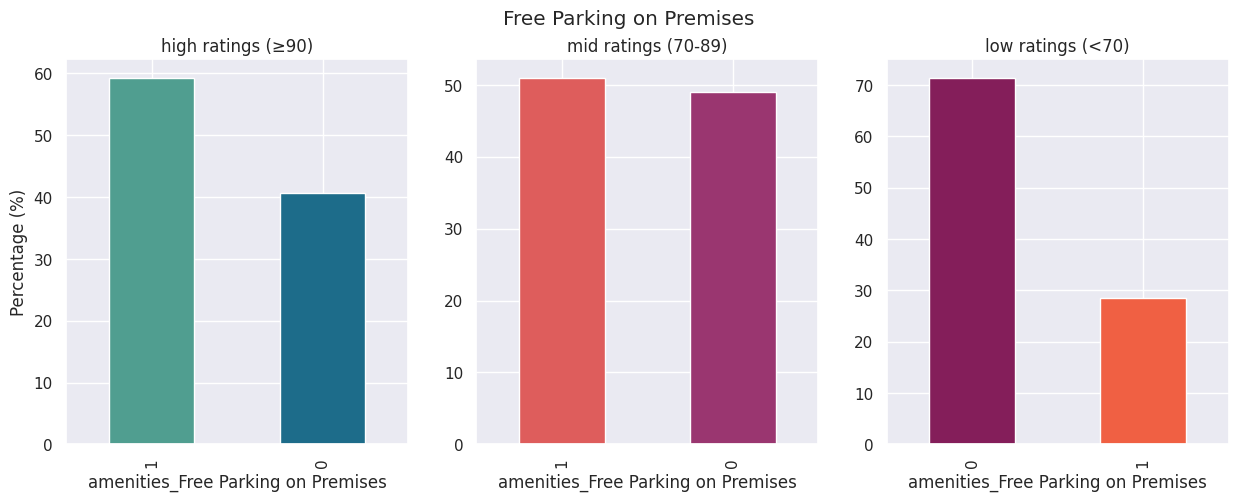

---------------------------------------------------------------------------------------------------------------------



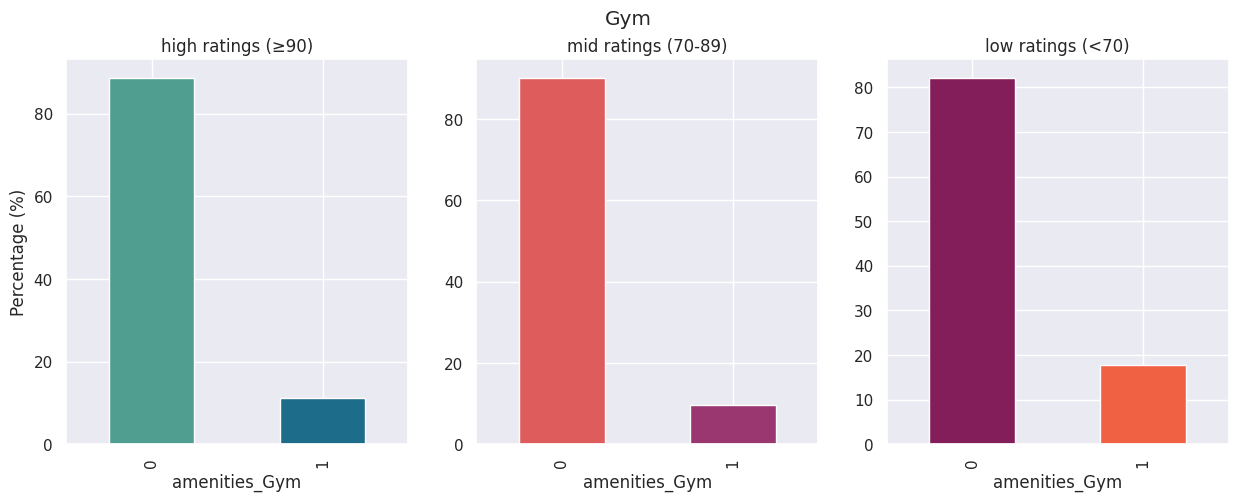

---------------------------------------------------------------------------------------------------------------------



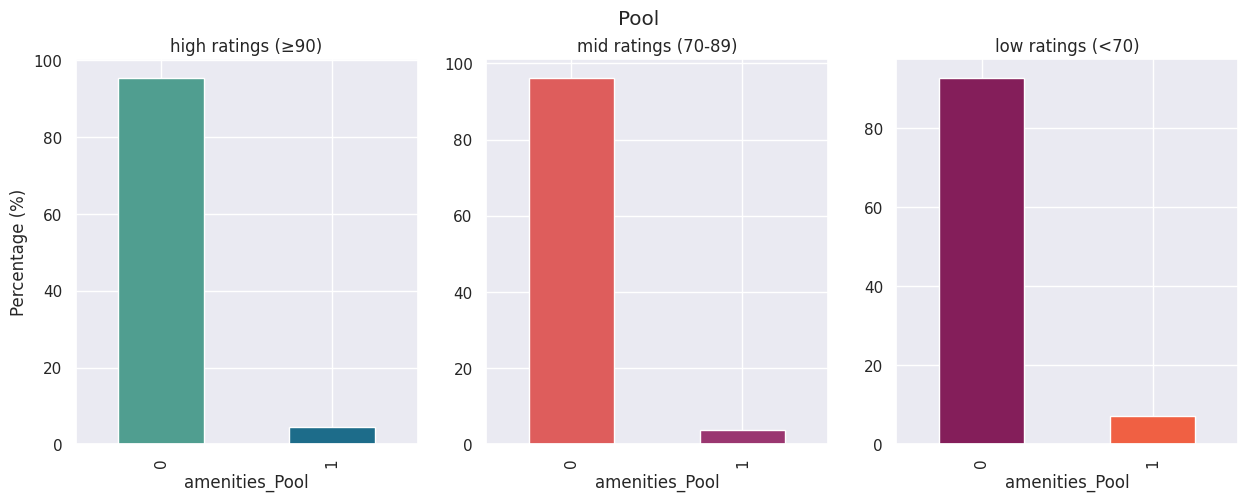

---------------------------------------------------------------------------------------------------------------------



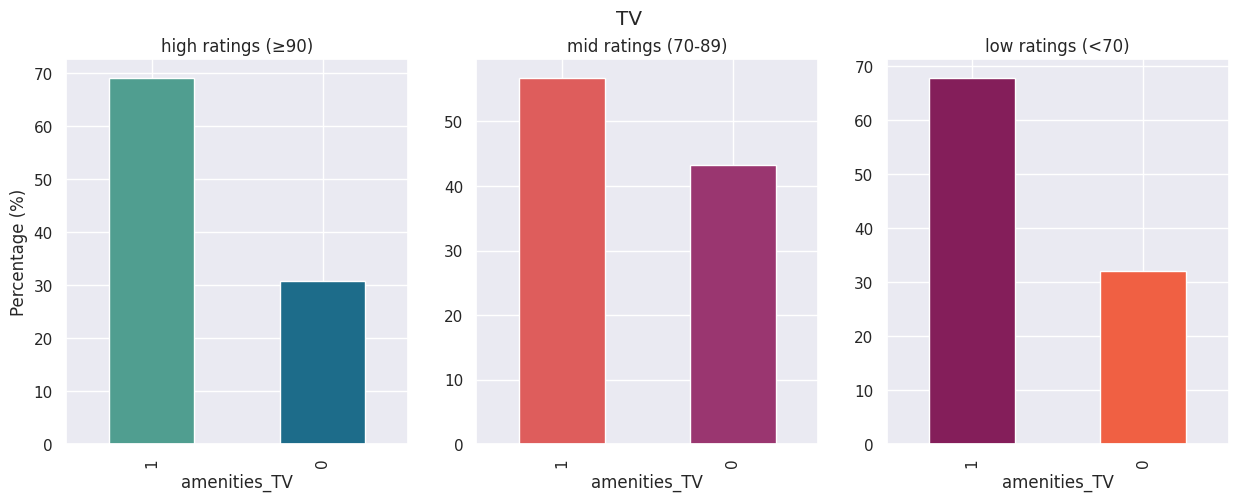

---------------------------------------------------------------------------------------------------------------------



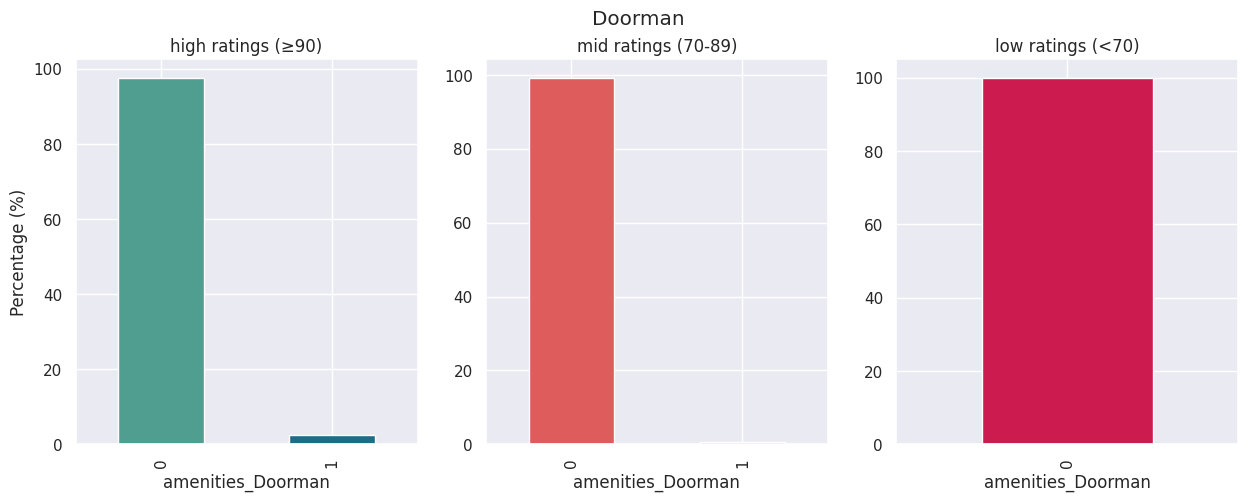

---------------------------------------------------------------------------------------------------------------------



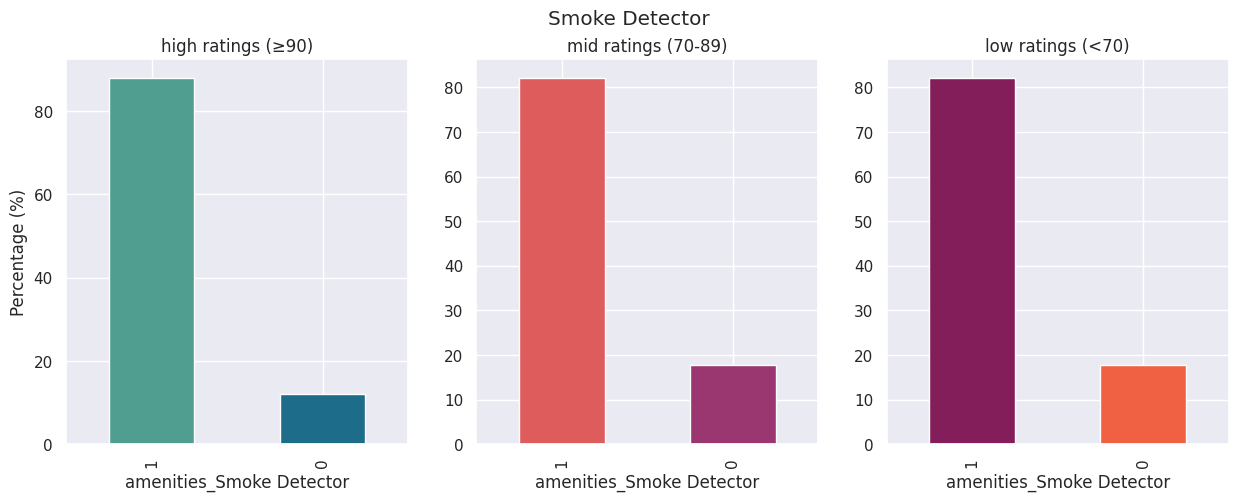

---------------------------------------------------------------------------------------------------------------------



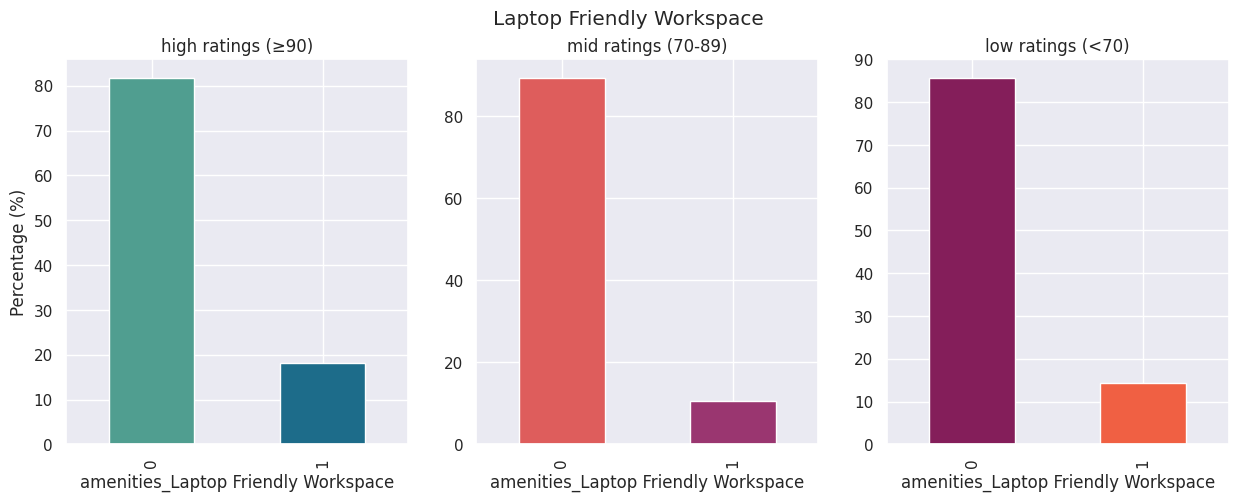

---------------------------------------------------------------------------------------------------------------------



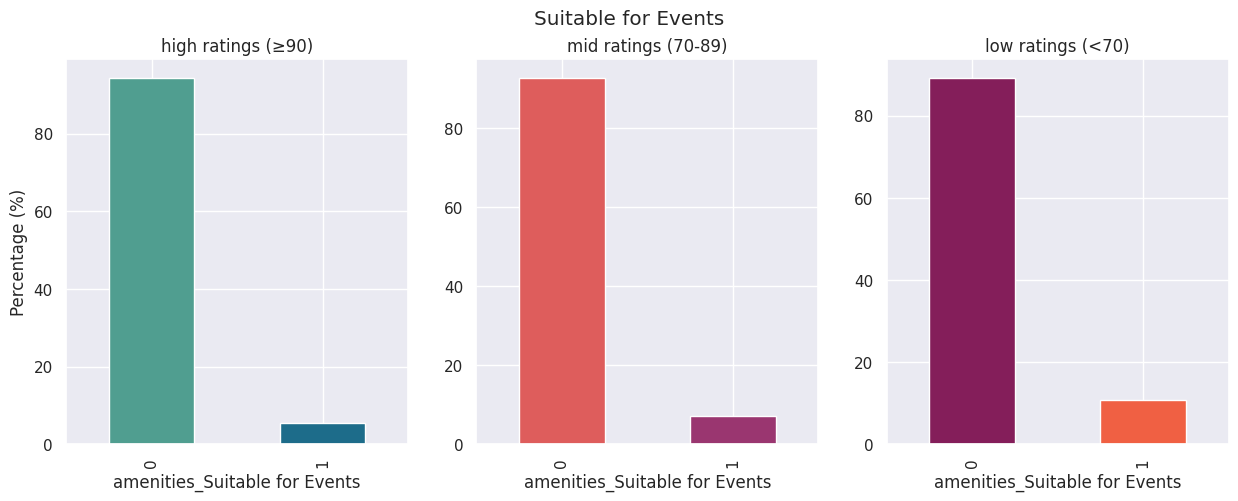

---------------------------------------------------------------------------------------------------------------------



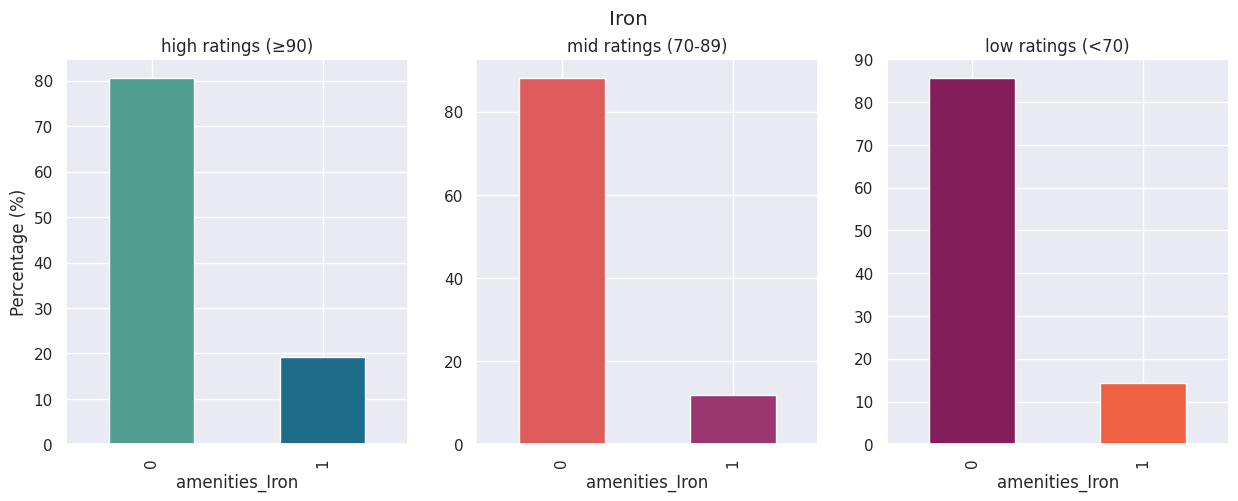

---------------------------------------------------------------------------------------------------------------------



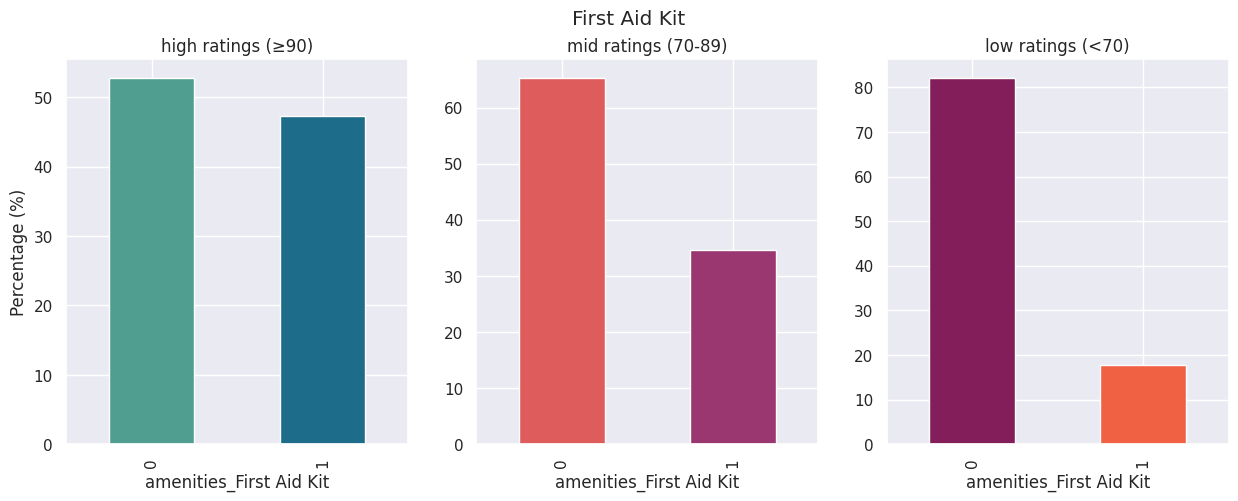

---------------------------------------------------------------------------------------------------------------------



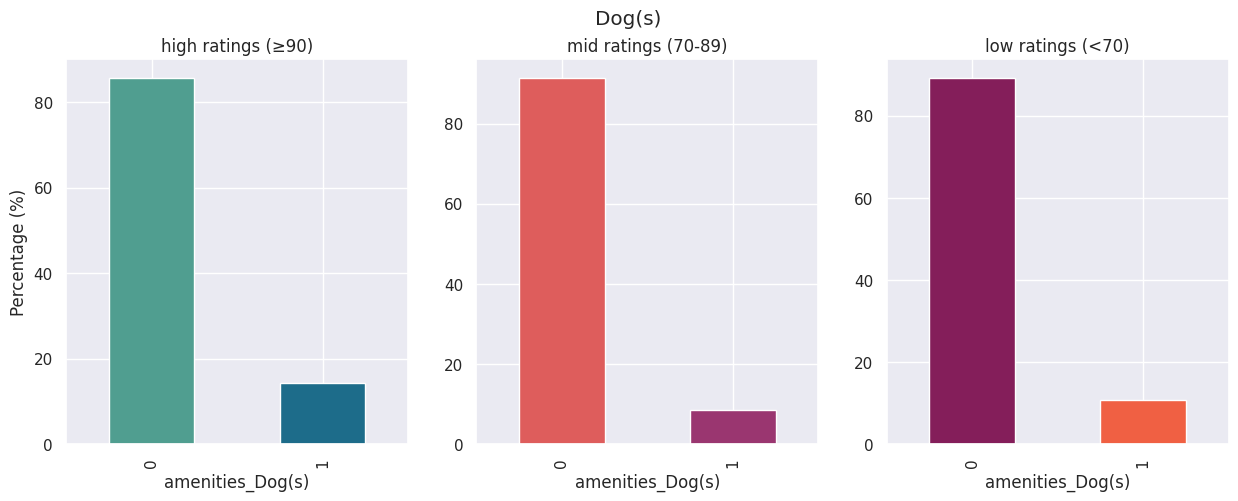

---------------------------------------------------------------------------------------------------------------------



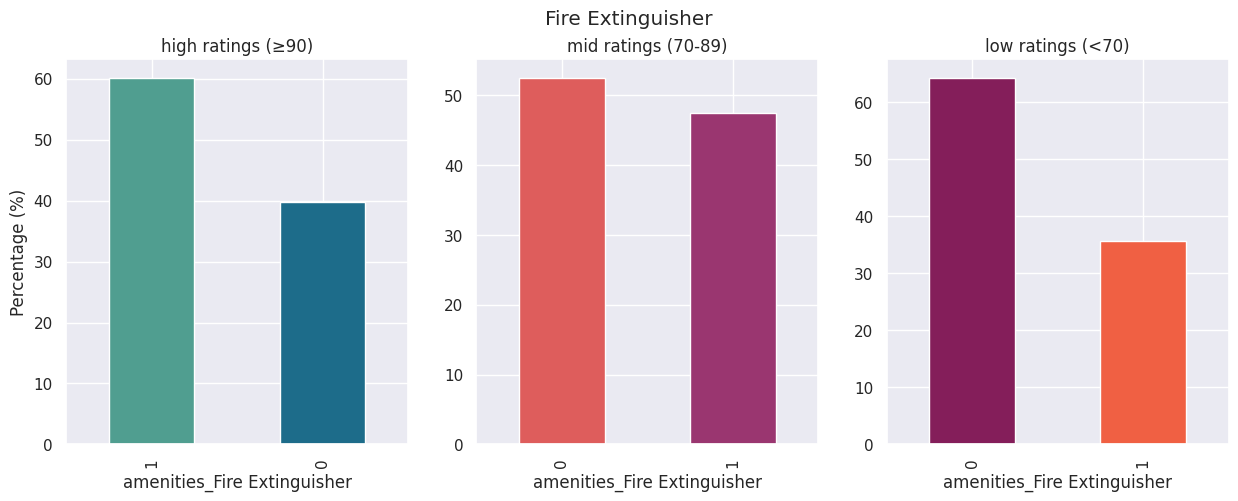

---------------------------------------------------------------------------------------------------------------------



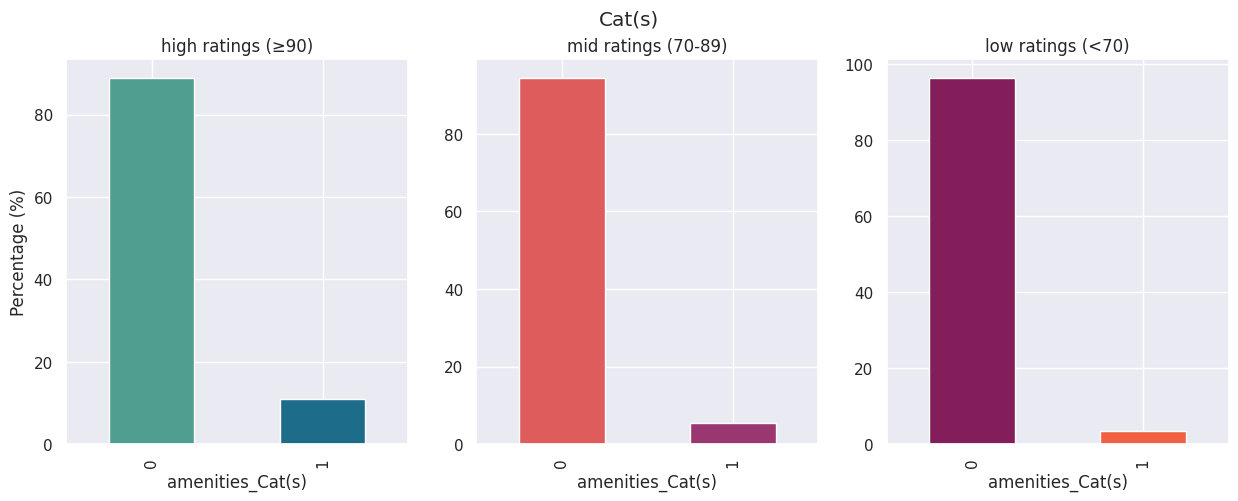

---------------------------------------------------------------------------------------------------------------------



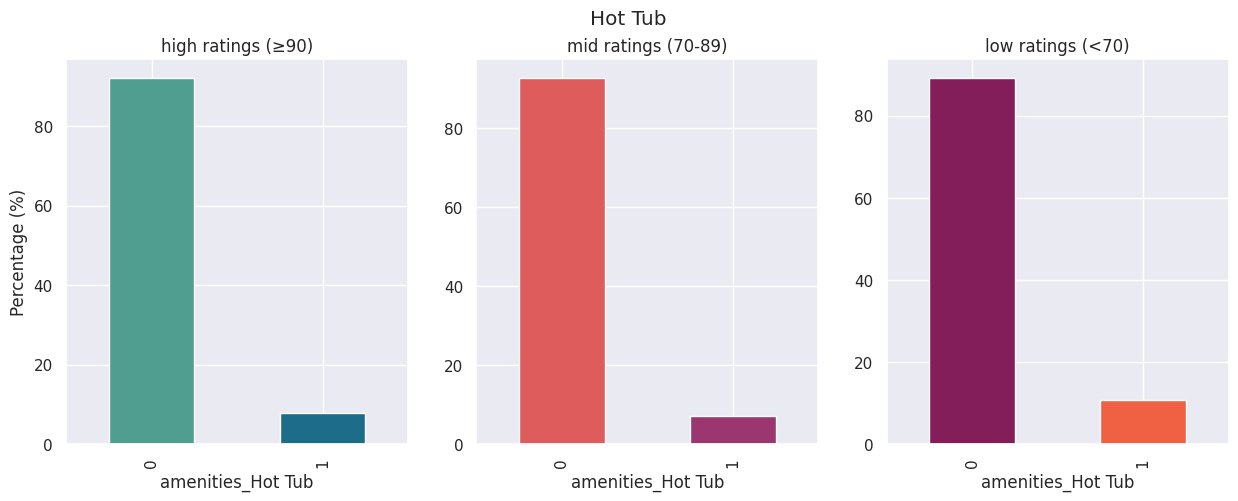

---------------------------------------------------------------------------------------------------------------------



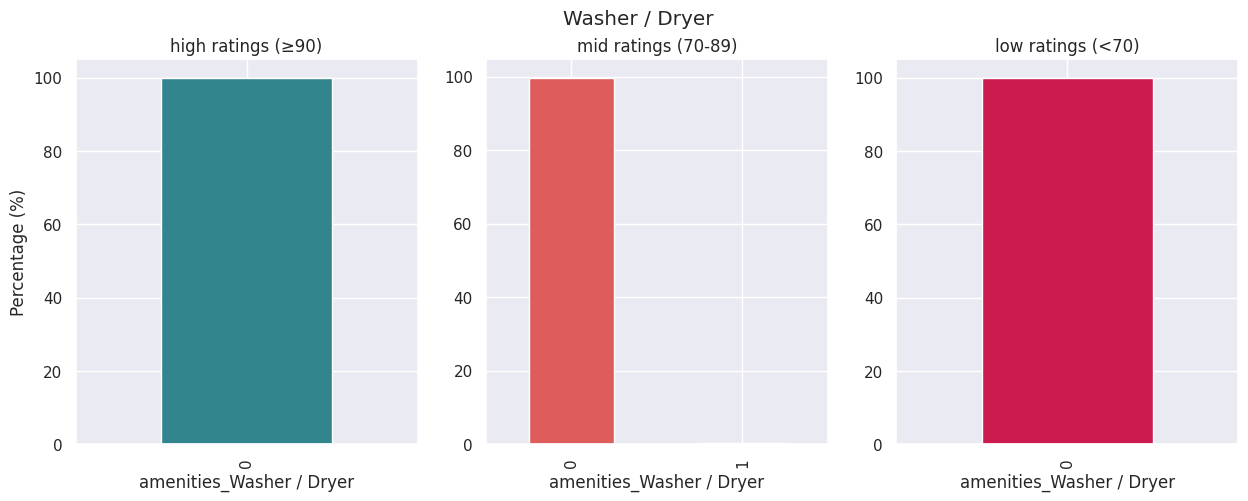

---------------------------------------------------------------------------------------------------------------------



In [ ]:
amenities_column = ['amenities_Essentials', 'amenities_Wheelchair Accessible', 'amenities_Elevator in Building',
 'amenities_Internet',
 'amenities_24-Hour Check-in',
 'amenities_Shampoo',
 'amenities_Carbon Monoxide Detector',
 'amenities_Family/Kid Friendly',
 'amenities_Breakfast',
 'amenities_Lock on Bedroom Door',
 'amenities_Safety Card',
 'amenities_Pets Allowed',
 'amenities_Other pet(s)',
 'amenities_Kitchen',
 'amenities_Air Conditioning',
 'amenities_Smoking Allowed',
 'amenities_Dryer',
 'amenities_Buzzer/Wireless Intercom',
 'amenities_Cable TV',
 'amenities_Hangers',
 'amenities_Indoor Fireplace',
 'amenities_Hair Dryer',
 'amenities_Pets live on this property',
 'amenities_Wireless Internet',
 'amenities_Washer',
 'amenities_Free Parking on Premises',
 'amenities_Gym',
 'amenities_Pool',
 'amenities_TV',
 'amenities_Doorman',
 'amenities_Smoke Detector',
 'amenities_Laptop Friendly Workspace',
 'amenities_Suitable for Events',
 'amenities_Iron',
 'amenities_First Aid Kit',
 'amenities_Dog(s)',
 'amenities_Fire Extinguisher',
 'amenities_Cat(s)',
 'amenities_Hot Tub',
 'amenities_Washer / Dryer']

for cols in amenities_column:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(cols.replace('amenities_', ''))

    # high ratings
    high_data = (((high_review_scores.groupby(cols)['review_scores_rating'].count()) / high_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    high_colors = sns.color_palette("crest", len(high_data))
    high_data.plot.bar(ax=axs[0], color=high_colors)
    axs[0].set_title('high ratings (≥90)')
    axs[0].set_ylabel('Percentage (%)')

    # mid ratings
    mid_data = (((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / mid_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    mid_colors = sns.color_palette("flare", len(mid_data))
    mid_data.plot.bar(ax=axs[1], color=mid_colors)
    axs[1].set_title('mid ratings (70-89)')
    axs[1].set_ylabel('')

    # low ratings
    low_data = (((low_review_scores.groupby(cols)['review_scores_rating'].count()) / low_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    low_colors = sns.color_palette("rocket", len(low_data))
    low_data.plot.bar(ax=axs[2], color=low_colors)
    axs[2].set_title('low ratings (<70)')
    axs[2].set_ylabel('')

    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')
    print()

### Evaluation of which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Correlations also discussed:

**Play a higher role in a higher rating:**  
- First Aid kit
- Shampoo
- Wireless Internet
- TV (incidences of AirBnBs without TV were far lower than those with a lower rating)
- Internet (incidences of AirBnBs without Internet were far lower than those with a lower rating)
- Free Parking on Premises

**Play a contributing role in a higher rating:**  
- Safety Card (20%)
- Hair dryer
- Carbon Monoxide detecter
- Smoke Detector( incidences of AirBnBs without Smole dector were far lower than those with a lower rating)
- Fire extinguisher
- Oets living on property
- Google host verified

**Play a negliable role in a higher rating:**  
- Washer / Dryer
- 24 hour check in
- Buzzer / Intercom
- Dogs
- Laptop Friendly Workspace
- Family/ kid frendly
- Cable TV
- Hangers
- Iron
- Fireplace Indoor
- Host verified facebook
- Host verification_Kba

**Following amentities were found in all categories:**  
- Dryer
- Kitchen
- Washer
- Heating
- Host verifications phone
- Host verifications email


### host characteristics

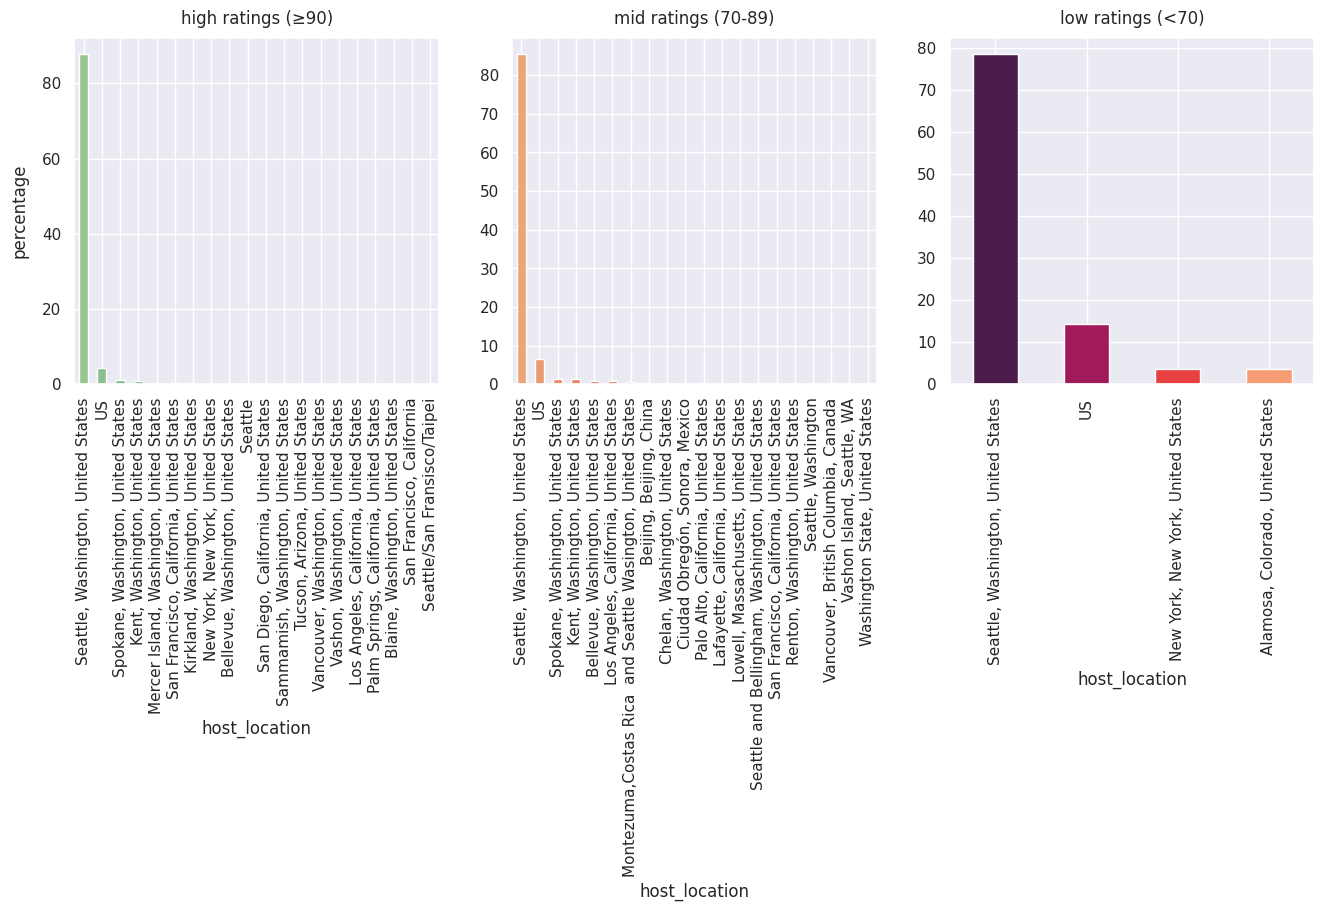

---------------------------------------------------------------------------------------------------------------------



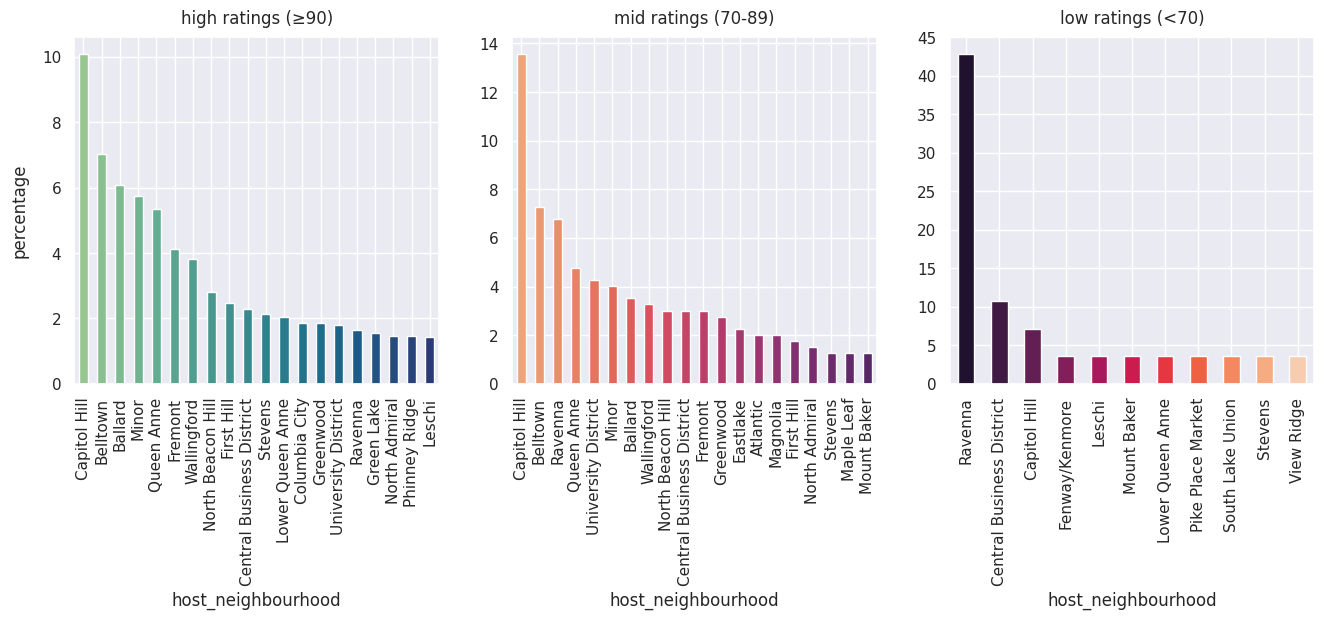

---------------------------------------------------------------------------------------------------------------------



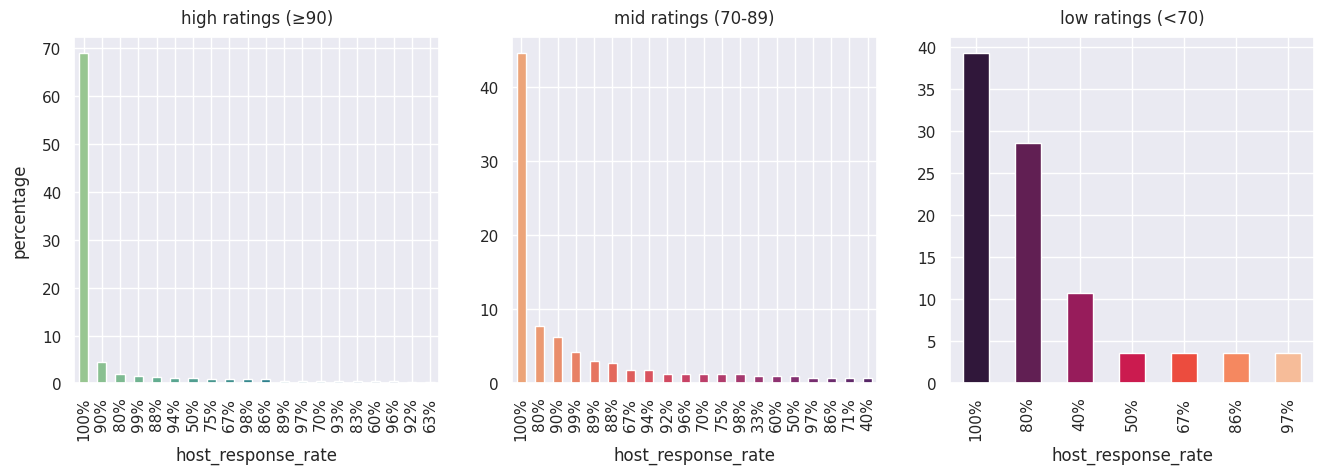

---------------------------------------------------------------------------------------------------------------------



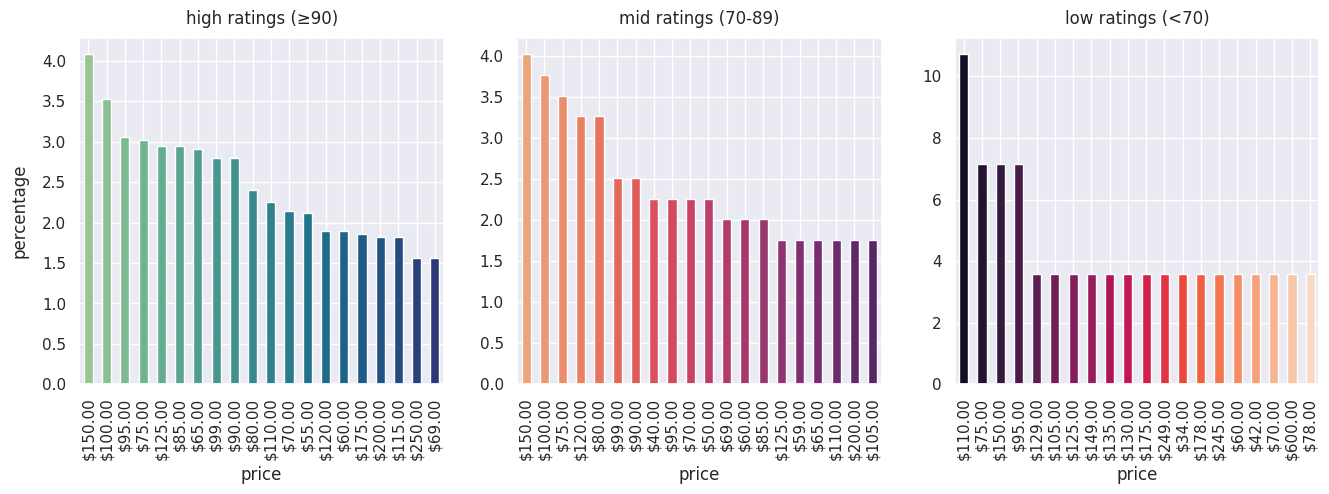

---------------------------------------------------------------------------------------------------------------------



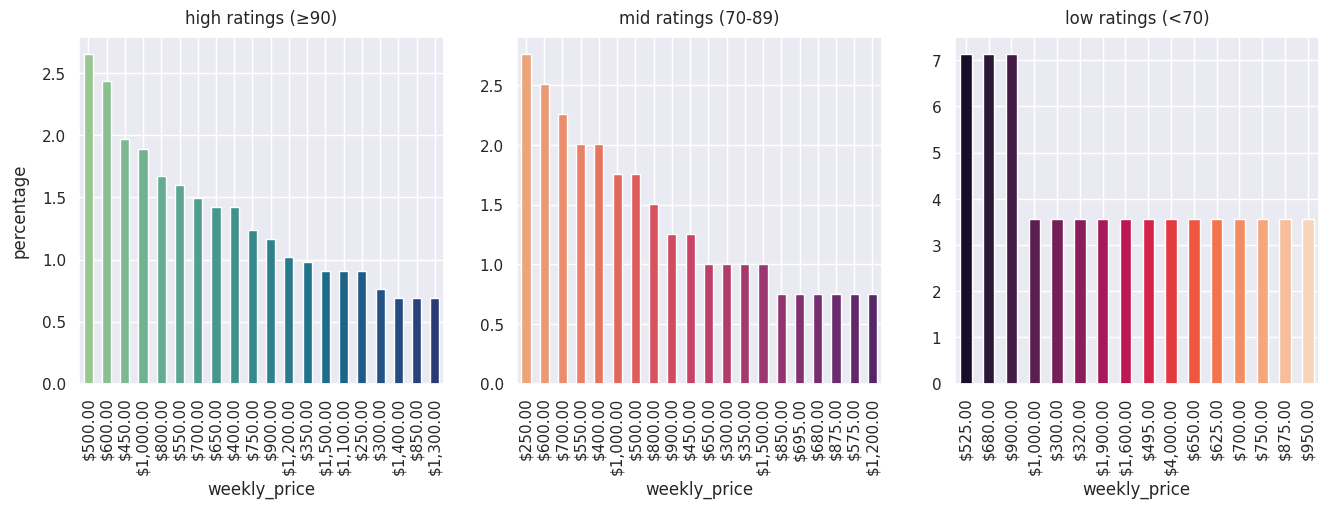

---------------------------------------------------------------------------------------------------------------------



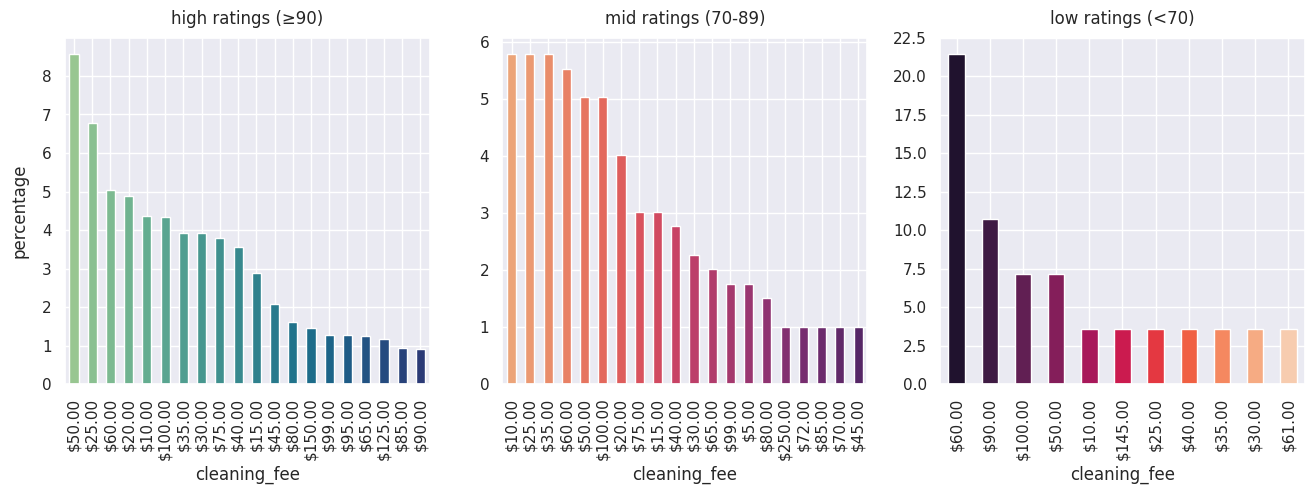

---------------------------------------------------------------------------------------------------------------------



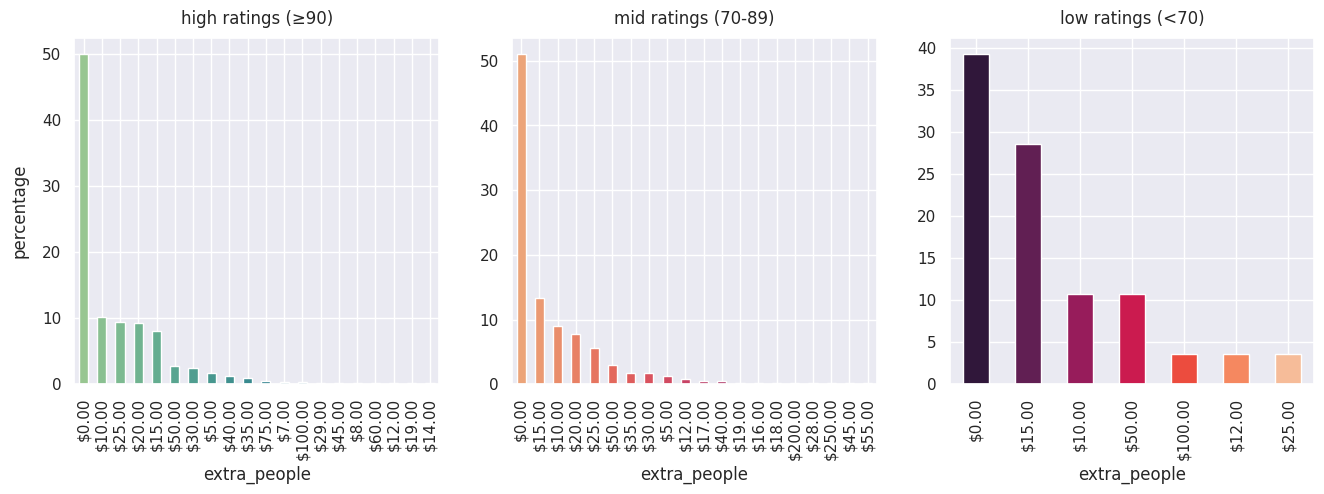

---------------------------------------------------------------------------------------------------------------------



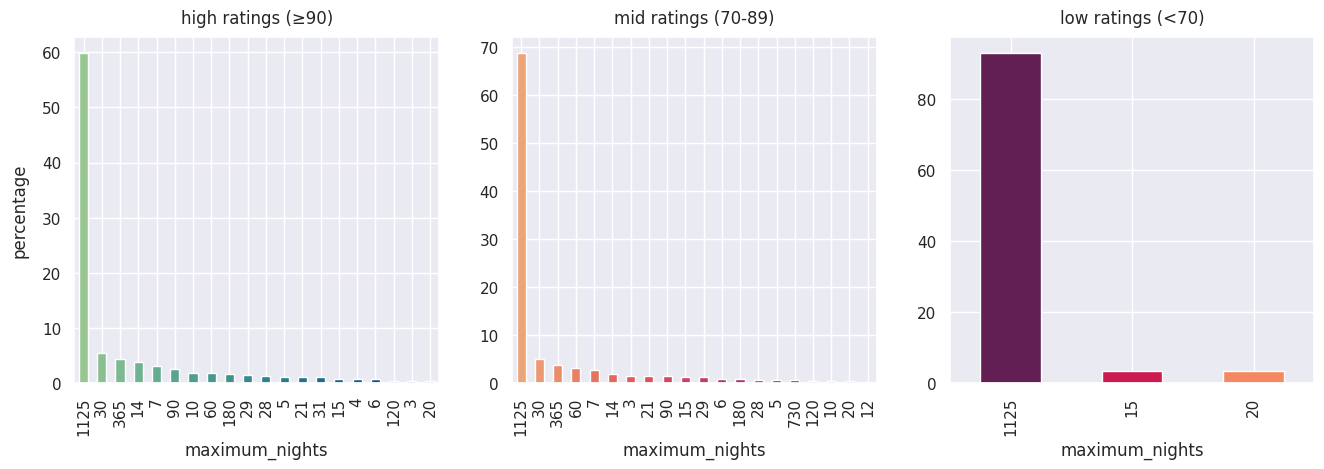

---------------------------------------------------------------------------------------------------------------------



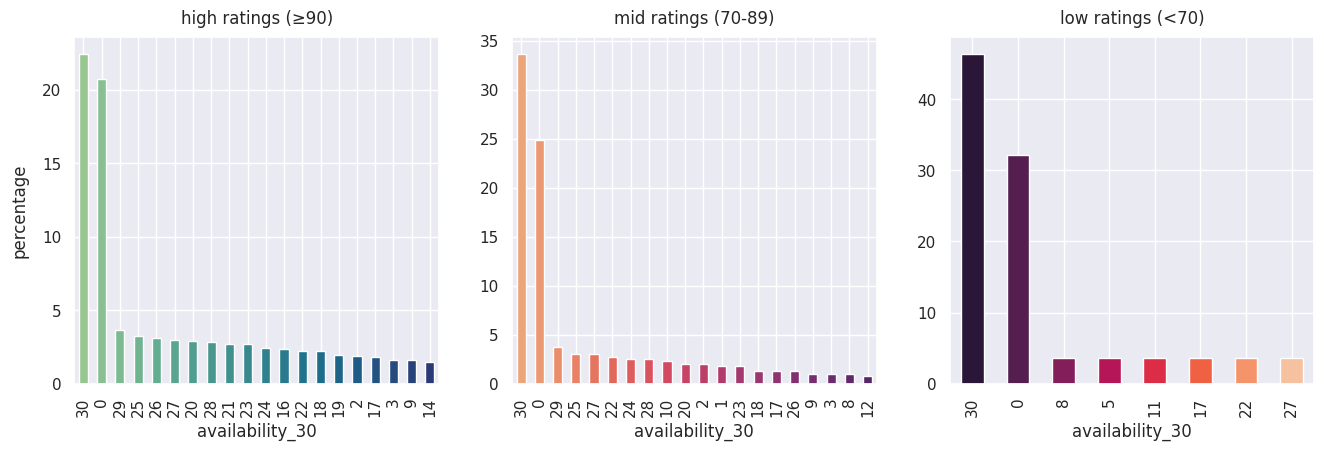

---------------------------------------------------------------------------------------------------------------------



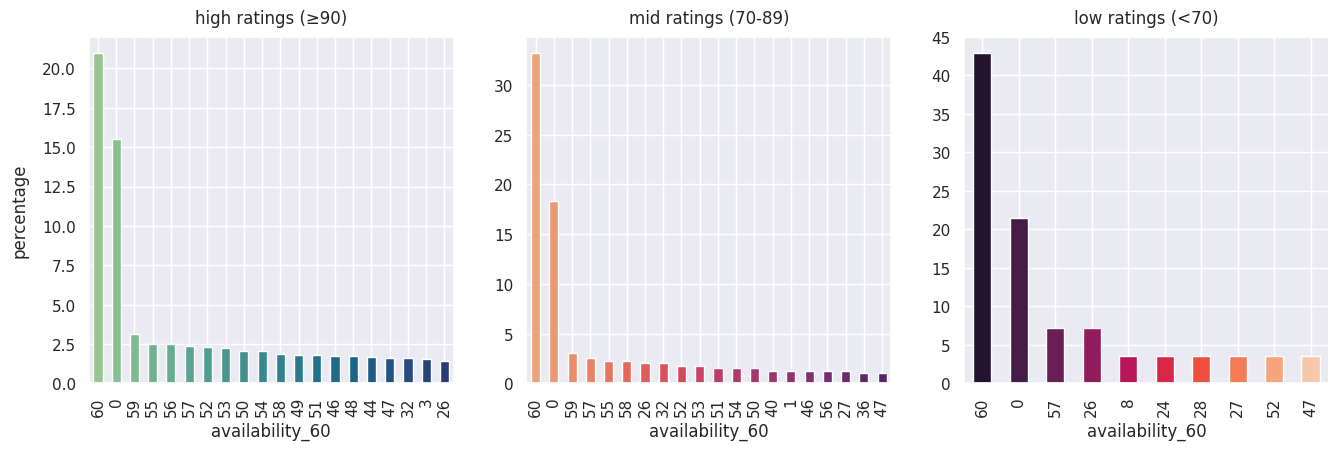

---------------------------------------------------------------------------------------------------------------------



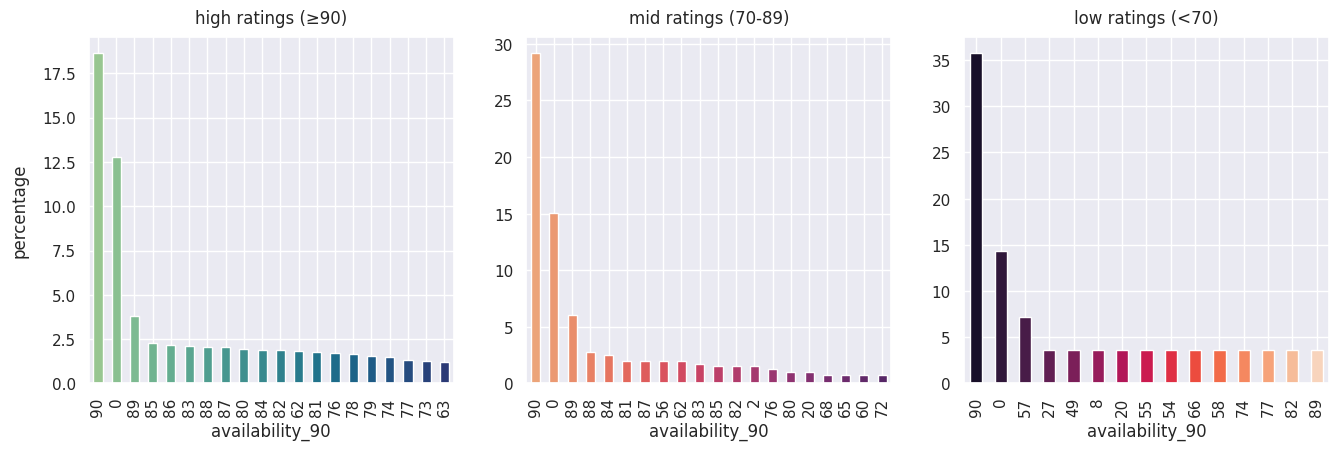

---------------------------------------------------------------------------------------------------------------------



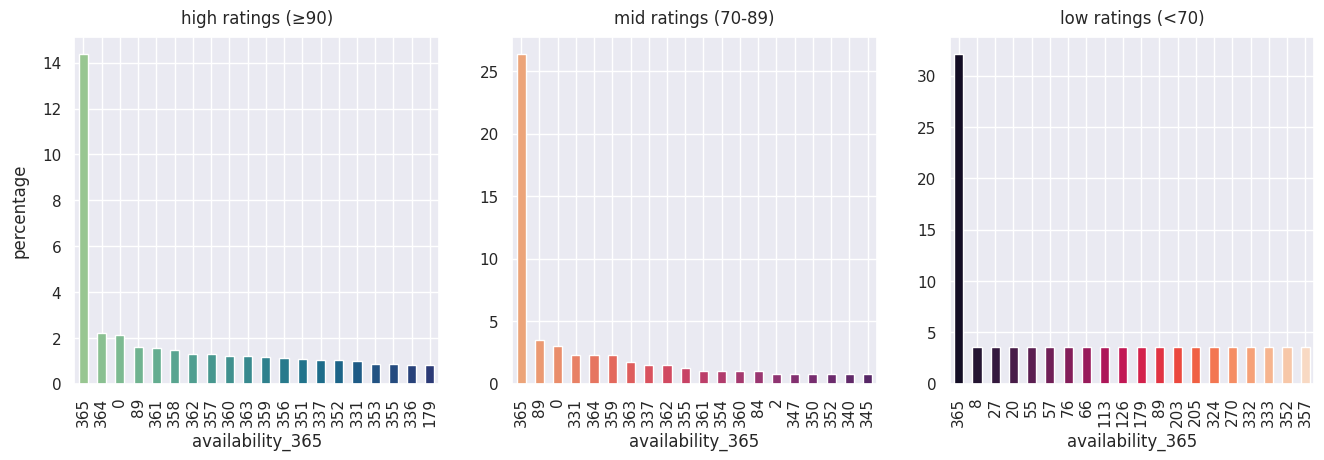

---------------------------------------------------------------------------------------------------------------------



In [ ]:
## Creating a separate dataframe for features with messy graphs.
analylis2 = df_analysis.copy(deep=True)
analylis2a = analylis2[[   'host_location',
    'host_neighbourhood',
    'host_response_rate',
    'price',
    'weekly_price',
    'cleaning_fee',
    'extra_people',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]]

analylis2a_cols = analylis2a.columns

for cols in analylis2a_cols:
    fig, axs = plt.subplots(1, 3, figsize=(16, 4.5))

    # high ratings
    high_data = (((high_review_scores.groupby(cols)['review_scores_rating'].count()) / high_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    high_colors = sns.color_palette("crest", len(high_data))
    high_data.plot.bar(ax=axs[0], color=high_colors)
    axs[0].set_title('high ratings (≥90)', pad=10)
    axs[0].set_ylabel('percentage', labelpad=10)

    # mid ratings
    mid_data = (((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / mid_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    mid_colors = sns.color_palette("flare", len(mid_data))
    mid_data.plot.bar(ax=axs[1], color=mid_colors)
    axs[1].set_title('mid ratings (70-89)', pad=10)
    axs[1].set_ylabel('')

    # low ratings
    low_data = (((low_review_scores.groupby(cols)['review_scores_rating'].count()) / low_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]
    low_colors = sns.color_palette("rocket", len(low_data))
    low_data.plot.bar(ax=axs[2], color=low_colors)
    axs[2].set_title('low ratings (<70)', pad=10)
    axs[2].set_ylabel('')

    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')
    print()

### Evaluation of Host Characterstics

**host_neighbourhood**:
The most successful hosts were found in capital hill and Beltown. While the hosts with lower ratings were found(with a higher margin) in the Ravenna neighbourhood district. Further analysis may need to be done or other datasets to find why this trend has been observerd within these particular neighbourhoods.


**host_response_rate:**
The response rate of the highest rating airBnBs was 70% for 100% of responses in comparisionto ~50% and ~37% for the remaining airBnBs.

This reveals an important characterstics of hosts with the highest rated airBnBs which is that they are very responsive.


**extra_people:**  

50% The most popular airBnBs didn't charge for extra people which the remaing charged less than 10$. In comaprision to the other airBnBs which charged a higher slightly higher rate.

**avaliablity(30,60,90, 365 ):**  

Accoridng to the airBnB website, avalaiblity refers to

#### "Your availability is when and how often you offer your experience, and it impacts how easily potential guests find your experience on Airbnb. Those settings are of course entirely up to you, and we hope the following tips on availability will provide some inspiration to help you reach your hosting goals."

Therefore it is understood that a host ought to have greater avaliablity slots so that his airBnB becomes popular. The results reinfornce this assumption as the number of airBnB that are unavaliable(i.e 0 days) for 30, 60, 90 and 365 days are lesser than that of airBnBs with average and lower ratings.

Therefore the less avaliable slots a host offers, the less likely it is for him to get a good rating.


#### 3. How do the prices and the number of bookings fluctuate with regards to time. What are the trends observed within the airBnBs of the three different categories.

#### No of booking availablities' variation with time

In [163]:
df_calendar = pd.read_csv('calendar.csv')
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

<Axes: xlabel='date'>

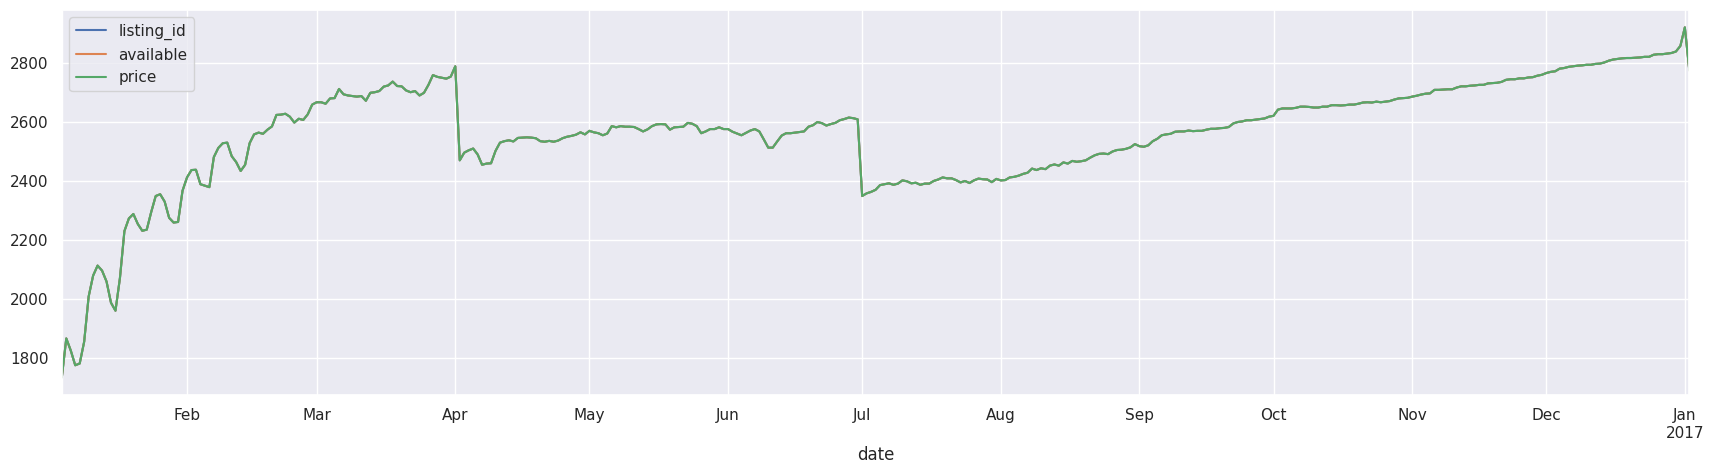

In [164]:
#isolating and extracting the available bookings
df_calendar_available = df_calendar[df_calendar['available'] == 't']
df_cal_a = df_calendar_available.groupby('date').count()
df_cal_a.plot.line(figsize=(21,5))

The time series shows that most of the listings were avaliable towards the end of March. They started increasing from Januwary onwards to March and then experienced a dip in April and remained constant untill end of June after which the avaliablity further decreased in July and which it contunued to gradually increase till January.  


The peak time of bookings therefore is in the month of March and the lowest is in the month of January. However the pontential host should considering doing a comparitive analysis on another dataset during the previous years to ensure that this pattern is consistant with the previous years and therefore reliable.

#### Price variation with time

In [165]:
df_calendar_price = df_calendar.copy(deep=True)
df_calendar_price.dropna(inplace=True)
df_calendar_price['price'] = df_calendar_price.price.replace('[\$,]', '', regex=True).astype(float)

In [166]:
df_cal_b = df_calendar_price.groupby('date')[df_calendar_price.select_dtypes(include='number').columns].mean()
#df_cal_b.drop(columns='listing_id').plot(figsize=(21,8))

In [167]:
df_calendar_price_high = df_calendar_price[df_calendar_price.listing_id.isin(high_review_scores.id)]
df_calendar_price_high = df_calendar_price_high[['date', 'price']]
df_calendar_price_high.dropna(inplace=True)
df_calendar_price_high['price'] = df_calendar_price_high.price.replace('[\$,]', '', regex=True).astype(float)
df_calendar_price_high = df_calendar_price_high.groupby('date')[df_calendar_price_high.select_dtypes(include='number').columns].mean()
# df_calendar_price_high.plot.line(figsize=(21,5))
# df_calendar_price_high.head(1)

In [168]:
df_calendar_price_mid = df_calendar_price[df_calendar_price.listing_id.isin(mid_review_scores.id)]
df_calendar_price_mid = df_calendar_price_mid[['date', 'price']]
df_calendar_price_mid.dropna(inplace=True)
df_calendar_price_mid['price'] = df_calendar_price_mid.price.replace('[\$,]', '', regex=True).astype(float)
df_calendar_price_mid = df_calendar_price_mid.groupby('date')[df_calendar_price_mid.select_dtypes(include='number').columns].mean()
# df_calendar_price_mid.plot.line(figsize=(21,5))
# df_calendar_price_mid.head(1)

In [169]:
df_calendar_price_low = df_calendar_price[df_calendar_price.listing_id.isin(low_review_scores.id)]
df_calendar_price_low = df_calendar_price_low[['date', 'price']]
df_calendar_price_low.dropna(inplace=True)
df_calendar_price_low['price'] = df_calendar_price_low.price.replace('[\$,]', '', regex=True).astype(float)
df_calendar_price_low = df_calendar_price_low.groupby('date')[df_calendar_price_low.select_dtypes(include='number').columns].mean()
# df_calendar_price_low.plot.line(figsize=(21,5))
# df_calendar_price_low.head(1)

In [170]:
price_var_time = pd.merge(pd.merge(df_calendar_price_high, df_calendar_price_mid, on='date'), df_calendar_price_low, on='date')
price_var_time.rename(columns={"price_x": "high", "price_y": "mid", "price": "low"}, inplace=True)

<Axes: xlabel='date'>

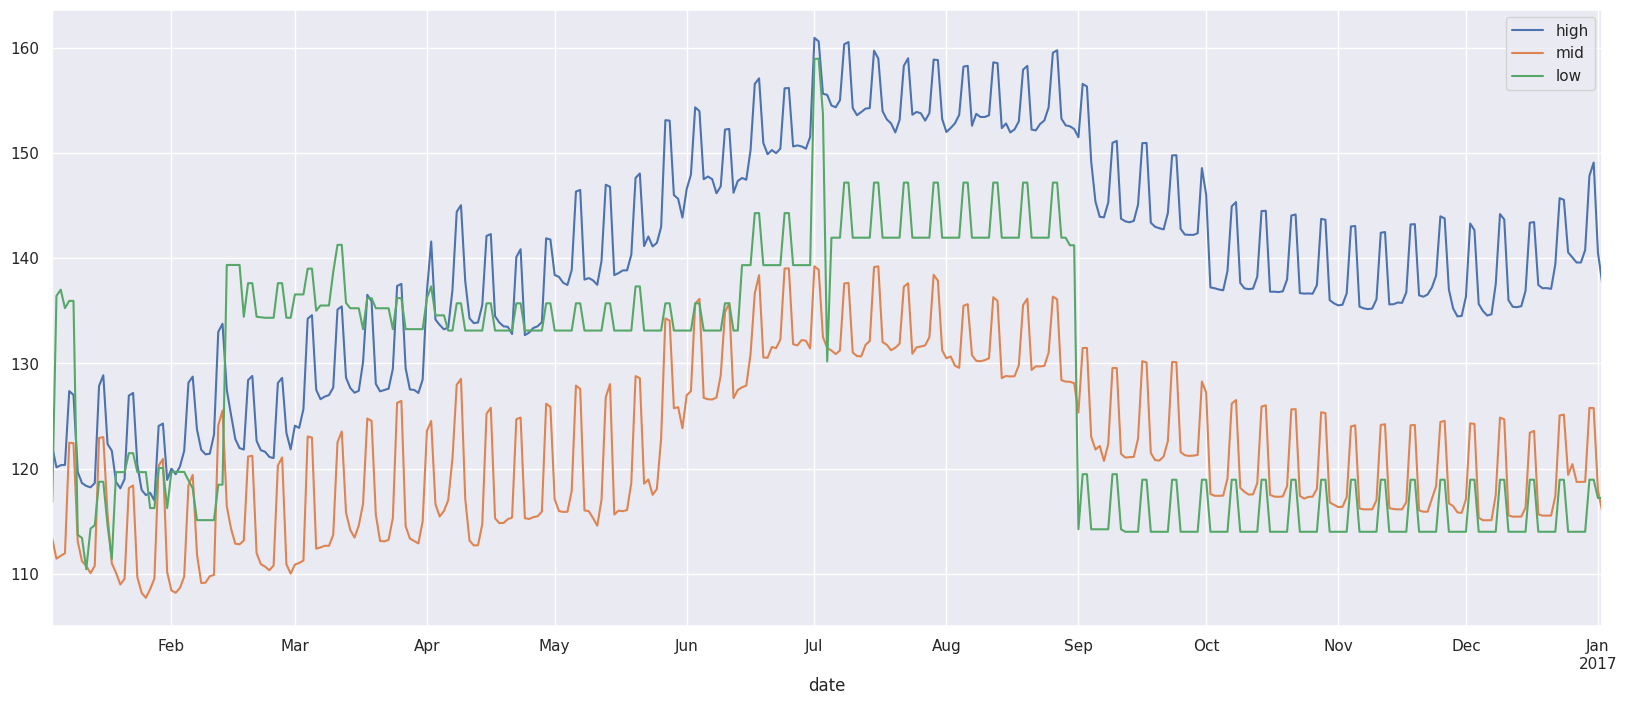

In [171]:
price_var_time.plot(figsize=(20, 8))

### Evaluation of how price and bookings fluctuate with time:

The above graph shows the pattern of the changes in price for each category over the year.

The results show that for the airbnbs with the lowest ratings, the prices change rapidly and then stay constant, they are also on average higher than that of the airbnbs with average rating. It is notable that the prices of these airbnbs are the highest in the beginning of the year when compared to the other two categories and the lowest in the 2nd half of the year.

The airbnbs with the highest rating show a steady and gradual increase as the year begins till the months of June and July, after which they slowly start decreasing. The prices fluctuate and change gradually with very little rapid changes.

The airbnbs with the average rating follow a similar trend as of the the airbnbs with the higher ratings however on average the price range is lower than that of the higher rated airbnbs

The results show that it is best if:
1. The prices change gradually with little fluctuations.
2. The ideal time to earn the highest revenue is during the months of May - July while the beginning of the year has the lowest prices.
3. In order to stay competitive as well as earn profit, is it imperitive that the above mentioned trends/variations in prices are kept in mind. It would ensure that the airbnbs remain competitive providing a lucrative offer to prospective host.